<a href="https://colab.research.google.com/github/KB1629/Data-analysis---project-/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Performing a Exploratory Data Analysis on a loan application dataset.

### Importing the required libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import math

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/application_data.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

###Understanding structure of the Data

In [ ]:
df.shape

(307511, 122)

In [ ]:
#Getting columns information
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
#statistical details of the dataset
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

###  Data cleaning

### 3.1 Percentage of missing values for columns and rows

In [ ]:
# checking column-wise null percentages
cols = pd.DataFrame(df.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'])
print(cols)

                              precentage_missing_value
SK_ID_CURR                                        0.00
HOUR_APPR_PROCESS_START                           0.00
REG_REGION_NOT_WORK_REGION                        0.00
LIVE_REGION_NOT_WORK_REGION                       0.00
REG_CITY_NOT_LIVE_CITY                            0.00
REG_CITY_NOT_WORK_CITY                            0.00
LIVE_CITY_NOT_WORK_CITY                           0.00
ORGANIZATION_TYPE                                 0.00
FLAG_DOCUMENT_21                                  0.00
FLAG_DOCUMENT_20                                  0.00
FLAG_DOCUMENT_19                                  0.00
FLAG_DOCUMENT_18                                  0.00
FLAG_DOCUMENT_17                                  0.00
FLAG_DOCUMENT_16                                  0.00
WEEKDAY_APPR_PROCESS_START                        0.00
FLAG_DOCUMENT_15                                  0.00
FLAG_DOCUMENT_13                                  0.00
FLAG_DOCUM

In [ ]:
# checking row-wise null percentages
row_null= pd.DataFrame(df.isnull().sum(axis=1), columns=['num_missing_value'])
row_null

num_missing_value
0                       1
1                       2
2                      48
3                      56
4                      50
...                   ...
307506                  8
307507                 10
307508                  4
307509                 30
307510                 17

[307511 rows x 1 columns]

In [ ]:
#another way to look at missing values , drawing a barplot for missing values percentage
missing_percentage = df.isnull().sum().sort_values(ascending = False)/len(df)
missing_percentage

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

Text(0.5, 1.0, 'Missig percentage of null values')

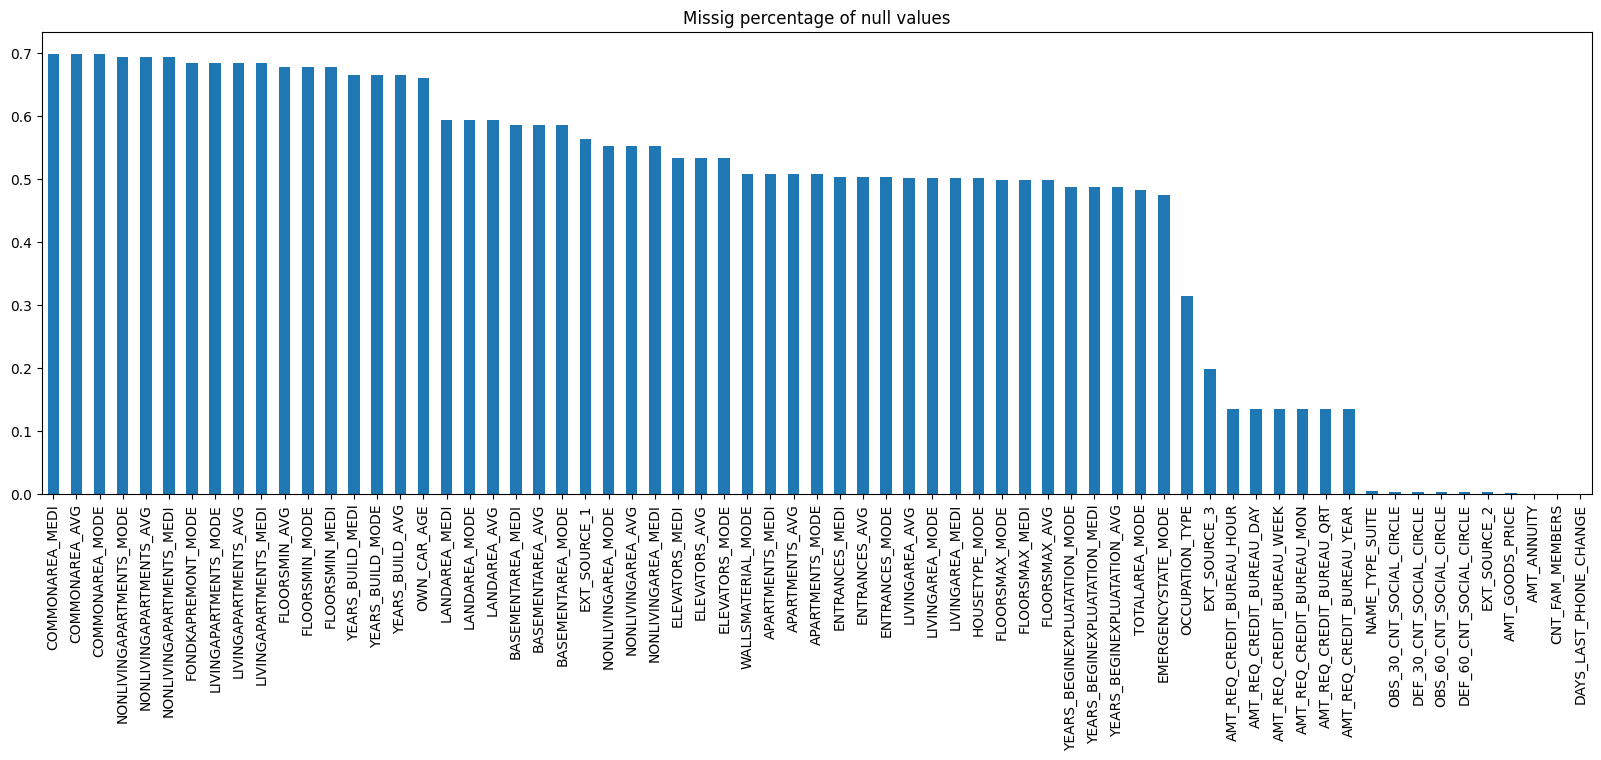

In [ ]:
missing_percentage = missing_percentage[missing_percentage != 0] # Only the missing data
plt.rcParams['figure.figsize'] = (20,6)
missing_percentage.plot(kind = 'bar')
plt.title("Missig percentage of null values")

### Removing the columns with high percentage of missing values(>50%)

In [ ]:
#Droping columns having more than 50 % of null values
df = df.drop(df.columns[df.apply(lambda col: (col.isnull().sum()/len(df)*100) > 50)], axis=1)
print (df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [ ]:
# Checking datset after dropping columns
df.shape

(307511, 81)

In [ ]:
#checking columns if it has any more missing values
round(100.0* df.isnull().sum()/len(df), 2).sort_values()

SK_ID_CURR                       0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_17                 0.00
REGION_RATING_CLIENT_W_CITY      0.00
FLAG_DOCUMENT_16                 0.00
FLAG_DOCUMENT_14                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMEN

###  Analayzing and understanding the dataset for clearing more null values


#### The  columns
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR

these columns have same missing values and it might have same rows missing


In [ ]:
focus_columns = ['AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
df[focus_columns].dtypes

AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

#### AMT_REQ_CREDIT_BUREAU_MON

<Axes: >

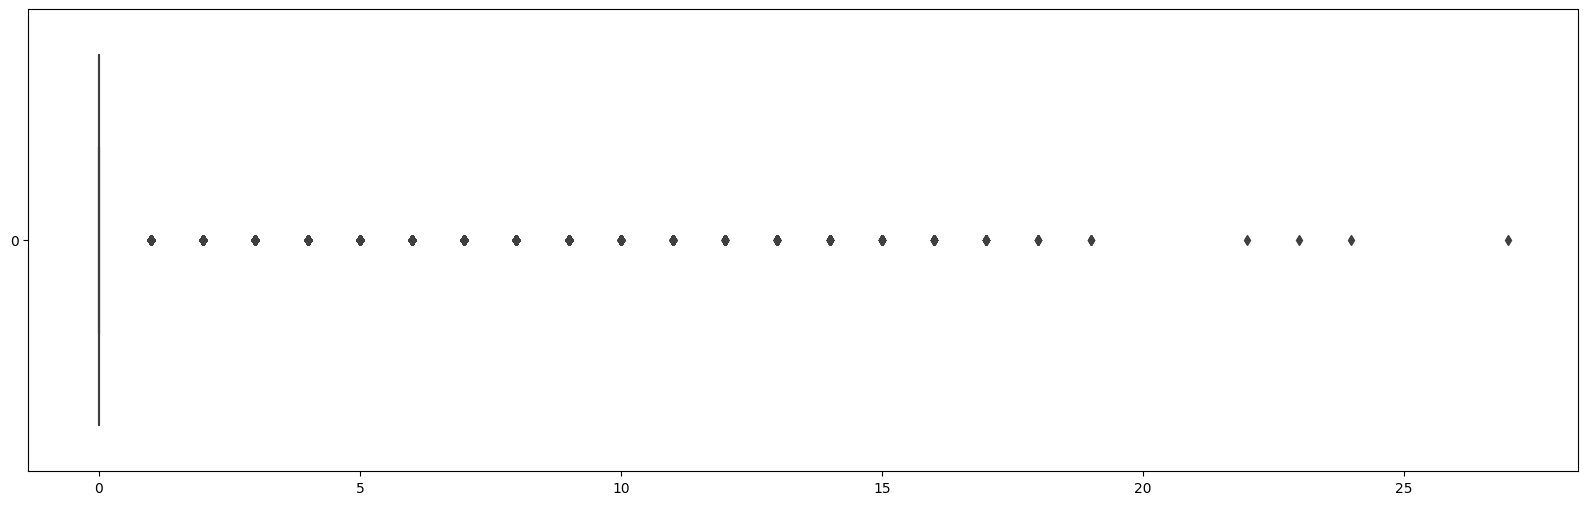

In [ ]:
#boxplot best for finding outliers
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_MON'],orient='horizontal')

In [ ]:
#Understanding various records in the columns AMT_REQ_CREDIT_BUREAU_MON
df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [ ]:
#Majority of the columns has 0 as value
df['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41519

In [ ]:
# Calculating percentage of each record
df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)*100

0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
23.0     0.000376
27.0     0.000376
22.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [ ]:
# Checking statistics of the column
df['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

##### The statistical summary of the column shows there are only few records with value greater than 0.

 For this  column AMT_REQ_CREDIT_BUREAU_MON, we can either  exclude missing values or fill the missing values with the value '0' which is present in more than 83% of the rows.

### hence we come to a solution of replacing the null value with mode '0'

####  Technique for AMT_REQ_CREDIT_BUREAU_WEEK

<Axes: >

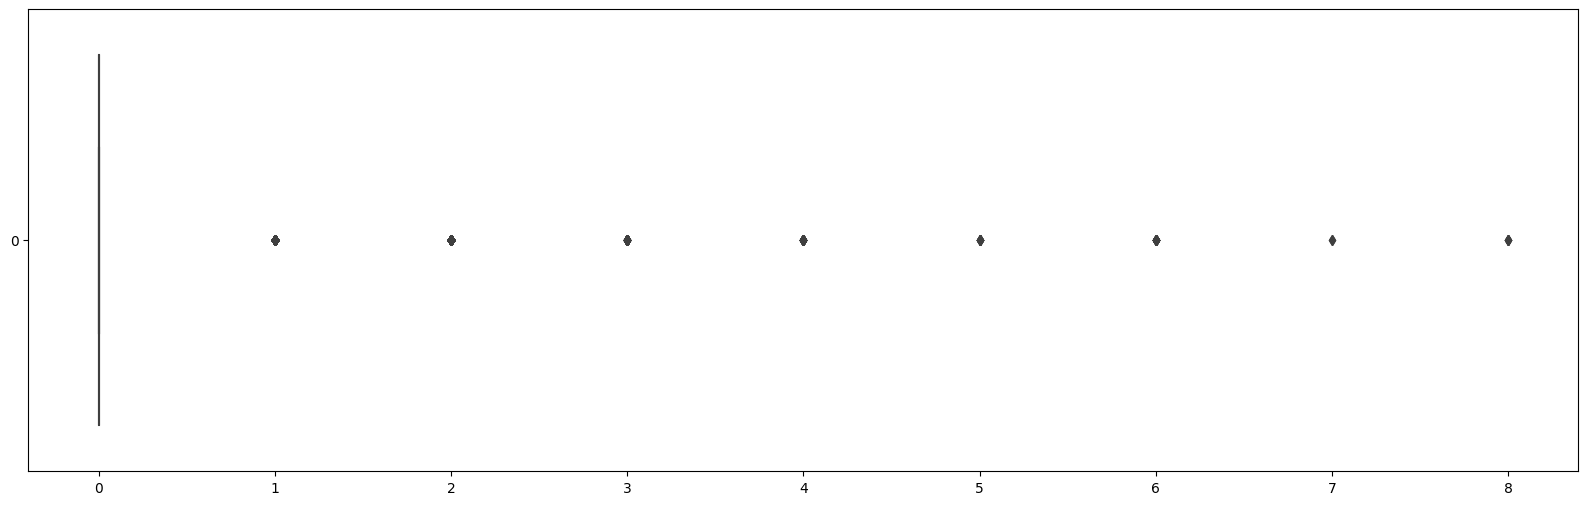

In [ ]:
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_WEEK'],orient='horizontal')

In [ ]:
#Understanding various records
df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

#### Majority of the columns has 0 as value

In [ ]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK
df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41519

In [ ]:
# Calculating percentage of each record in the dataframe
df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

####  The recommended  technique techinique too replace the null values is by  replacing null by the mode which is 0 , since the  value '0' is 96% present in this column

####  Technique for AMT_REQ_CREDIT_BUREAU_DAY

<Axes: >

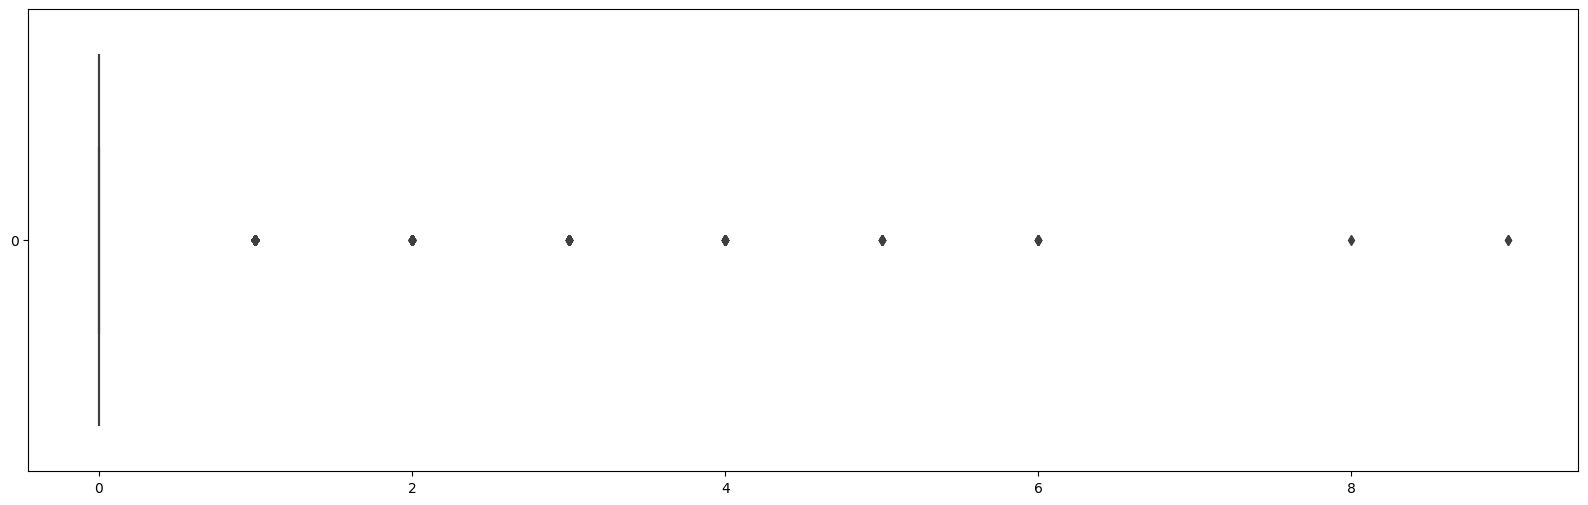

In [ ]:
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_DAY'],orient='horizontal')

In [ ]:
#Understanding various records
df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

##### Majority of the columns has 0 as value

In [ ]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_DAY
df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

41519

In [ ]:
# Calculating percentage of each record
df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

####  The recommended  technique techinique too replace the null values is by  replacing null by the mode which is 0 , since the  value '0' is 99% present in this column

### Technique for AMT_REQ_CREDIT_BUREAU_HOUR

<Axes: >

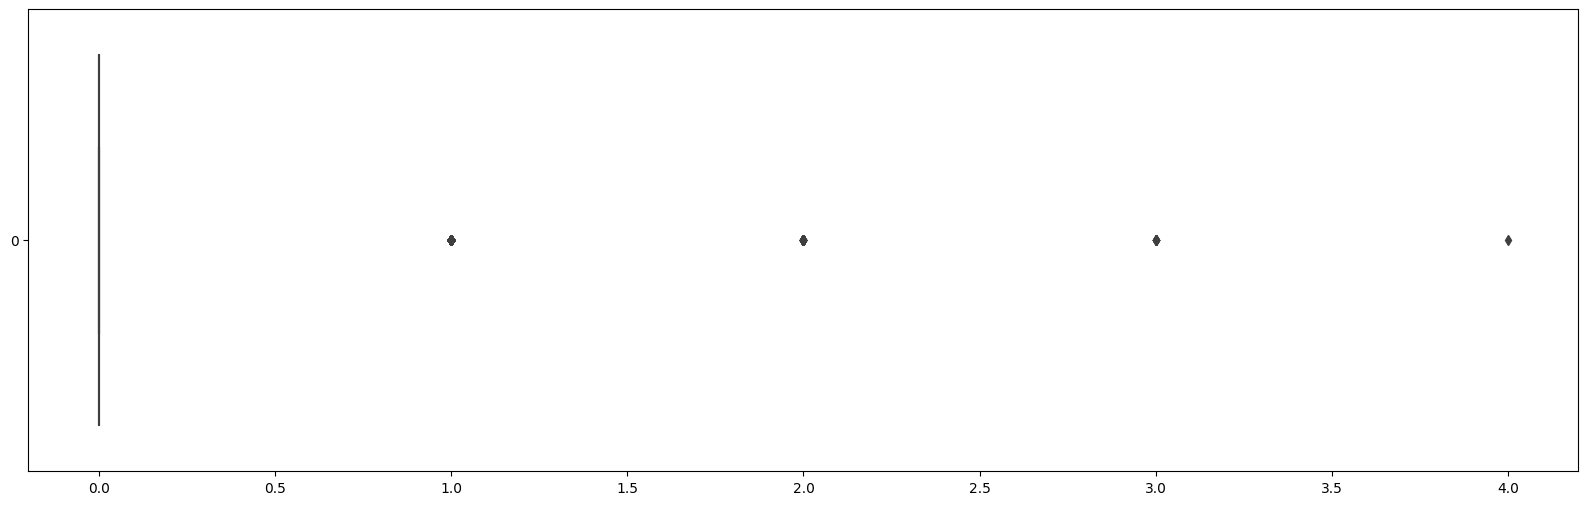

In [ ]:
#1. Finding if the column has Outliers or not
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_HOUR'],orient='horizontal')

In [ ]:
#Understanding various records
df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

#### Majority of the columns has 0 as value

In [ ]:
#Number of missing values
df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [ ]:
# Calculating percentage of each record
df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

#### The recommended  technique techinique too replace the null values is by  replacing null by the mode which is 0 , since the  value '0' is 99% present in this column

#### Technique for AMT_REQ_CREDIT_BUREAU_QRT

<Axes: >

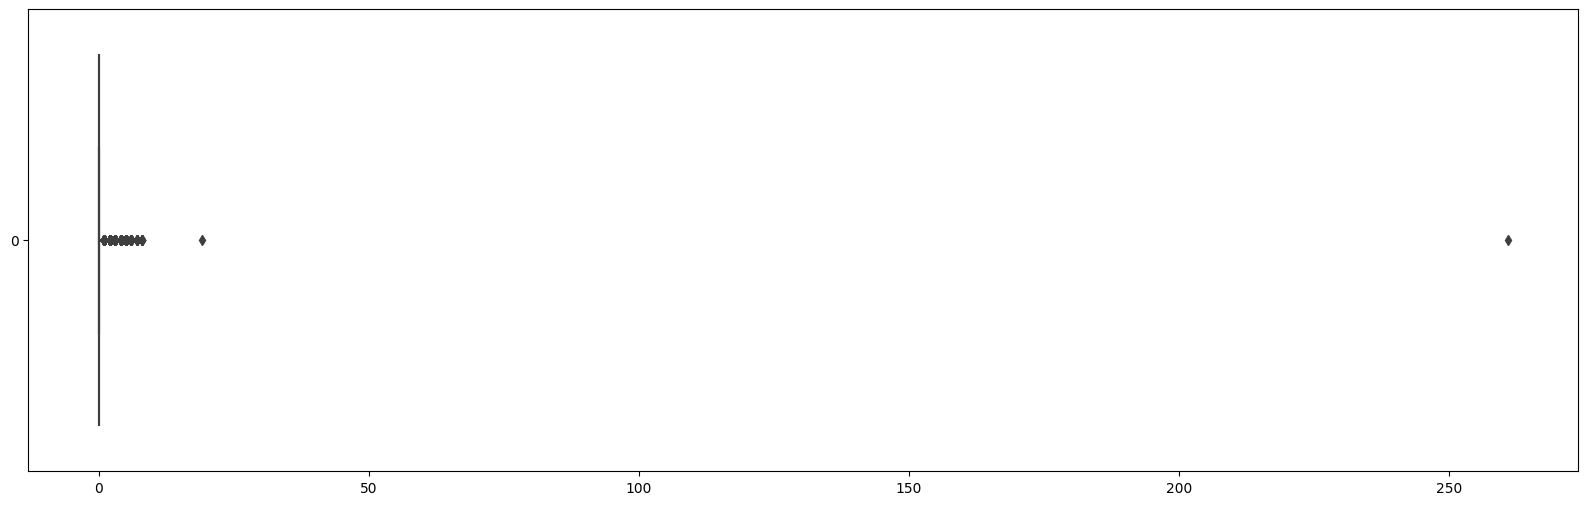

In [ ]:
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_QRT'],orient='horizontal')

In [ ]:
#Understanding various records
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

#### Majority of the columns has 0 as value

In [ ]:
#Number of missing values
df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

41519

In [ ]:
# Calculating percentage of each record
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)*100

0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
261.0     0.000376
19.0      0.000376
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

#### The recommended  technique techinique too replace the null values is by  replacing null by the mode which is 0 , since the  value '0' is 80% present in this column

#### Technique for AMT_REQ_CREDIT_BUREAU_YEAR

<Axes: >

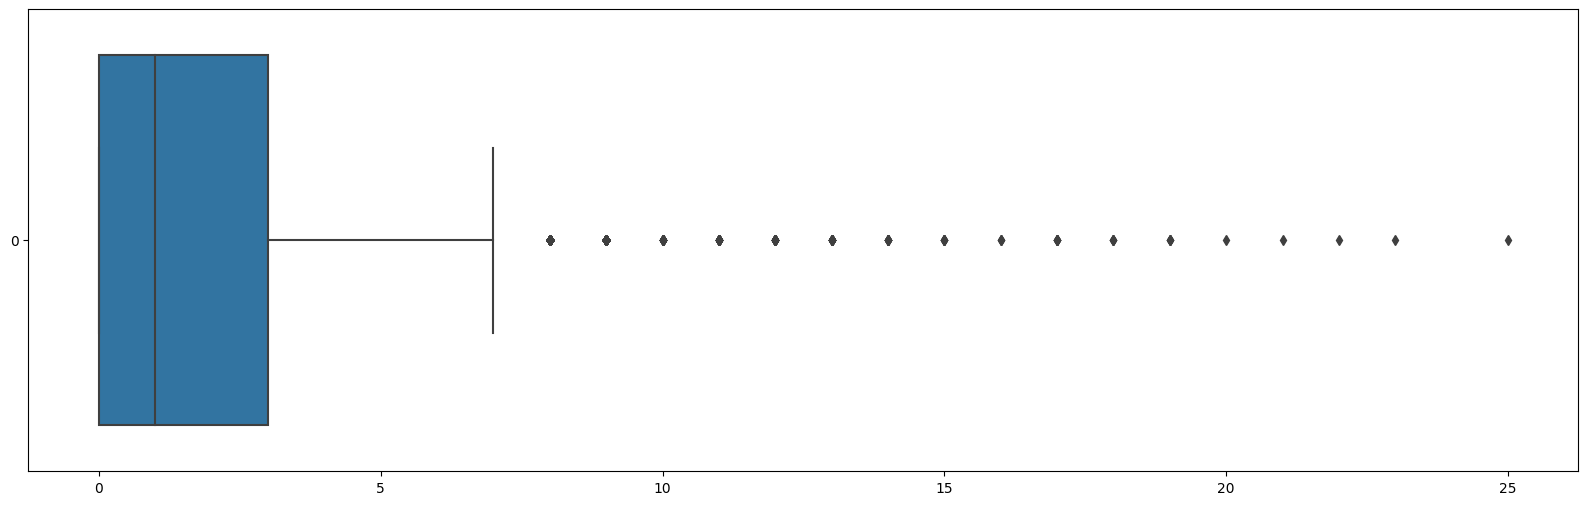

In [ ]:
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_YEAR'],orient='horizontal')

#### There are outliers in the data.

In [ ]:
#Understanding various records
df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [ ]:
#Number of missing values
df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

41519

In [ ]:
# Calculating percentage of each record
df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)*100

0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
25.0     0.000376
23.0     0.000376
22.0     0.000376
21.0     0.000376
20.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [ ]:
# Checking statistics of the column
df['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

### Values - 0,1,2,3 are present in a significant number. so the best solution would be to remove the null values


## Checking the data type of columns and fixing the incorrect data types

In [ ]:

df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


#### No column with incorrect data types.

In [ ]:
# changing the negative values of these columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE, & DAYS_ID_PUBLISH to number of years for easy understanding.
df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE' ]].div(365).round(2).abs()
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       25.92   
1       House / apartment                    0.003541       45.93   
2       House / apartment                    0.010032       52.18   
3       House / apartment                    0.008019       52.07   
4       House / apartment                    0.028663       54.61   
...                   ...                         ...         ...   
307506       With parents                    0.032561       25.55   
307507  House / apartment       

### finding  Outliers for Numerical columns

In [ ]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


# For the outlier analysis of numerical columns, we will focus on
- AMT_GOODS_PRICE - price of goods associated with the loan
- AMT_INCOME_TOTAL - income total of the loan applier
- AMT_CREDIT - value of the loan amount given
- AMT_ANNUITY - the amount to be paid by the loan receiver monthly
- FLOORSMAX_AVG - no.of floors of the house plays a role in determining the loan amount

so these rows with numerical value must not have outliers.

####  Outlier analysis for AMT_GOODS_PRICE

<Axes: >

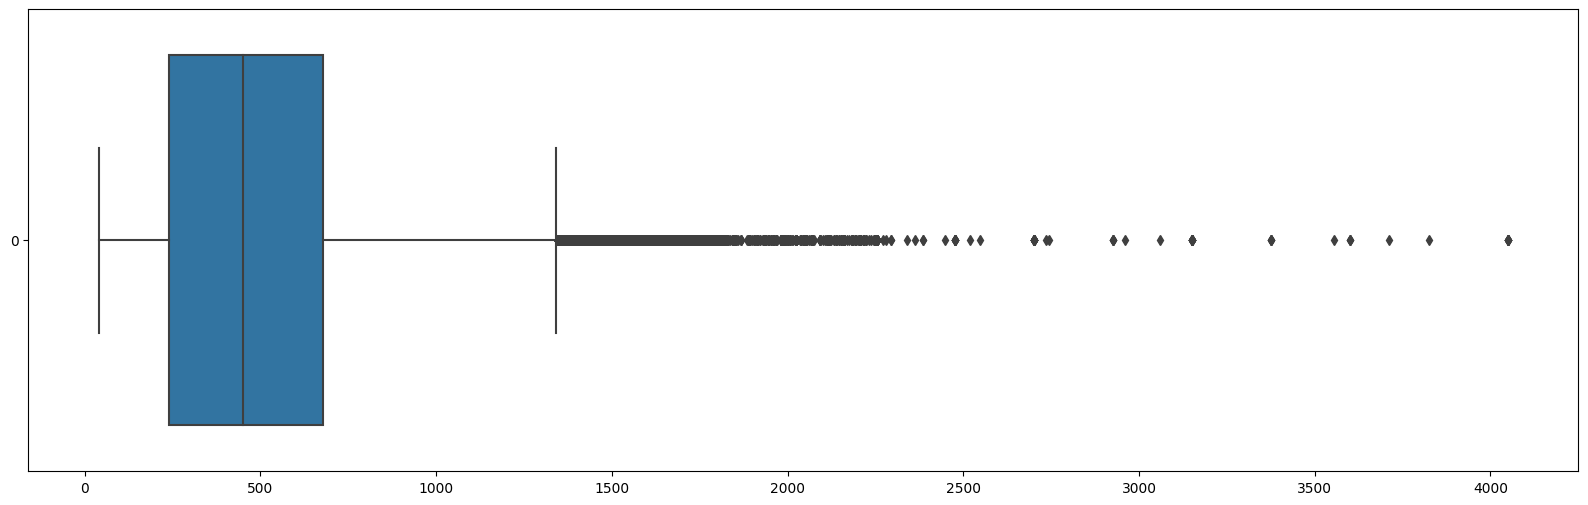

In [ ]:
# dividing by 1000 for our convinience
sns.boxplot(df['AMT_GOODS_PRICE']/1000.0,orient='horizontal')

In [ ]:
# checking column statistics
(df['AMT_GOODS_PRICE']/1000).describe()

count    307233.000000
mean        538.396207
std         369.446461
min          40.500000
25%         238.500000
50%         450.000000
75%         679.500000
max        4050.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
# finding the inter quartile range for the maximum value
IQR_AMT_GOODS_PRICE = (df['AMT_GOODS_PRICE']/1000).quantile(0.75) - (df['AMT_GOODS_PRICE']/1000).quantile(0.25)
Upper_limit_IQR_AMT_GOODS_PRICE = (df['AMT_GOODS_PRICE']/1000).quantile(0.75) + IQR_AMT_GOODS_PRICE*1.5
Upper_limit_IQR_AMT_GOODS_PRICE

1341.0

In [ ]:
# percentage of outliers in AMT_GOODS_PRICE
round(100.0 * len(df[(df['AMT_GOODS_PRICE']/1000)>Upper_limit_IQR_AMT_GOODS_PRICE])/len(df), 2)

4.79

#### From the boxplot, we can see there are outliers in AMT_GOODS_PRICE. The percentage of outliers stands at 4.79%

####  Outlier analysis for AMT_INCOME_TOTAL

<Axes: >

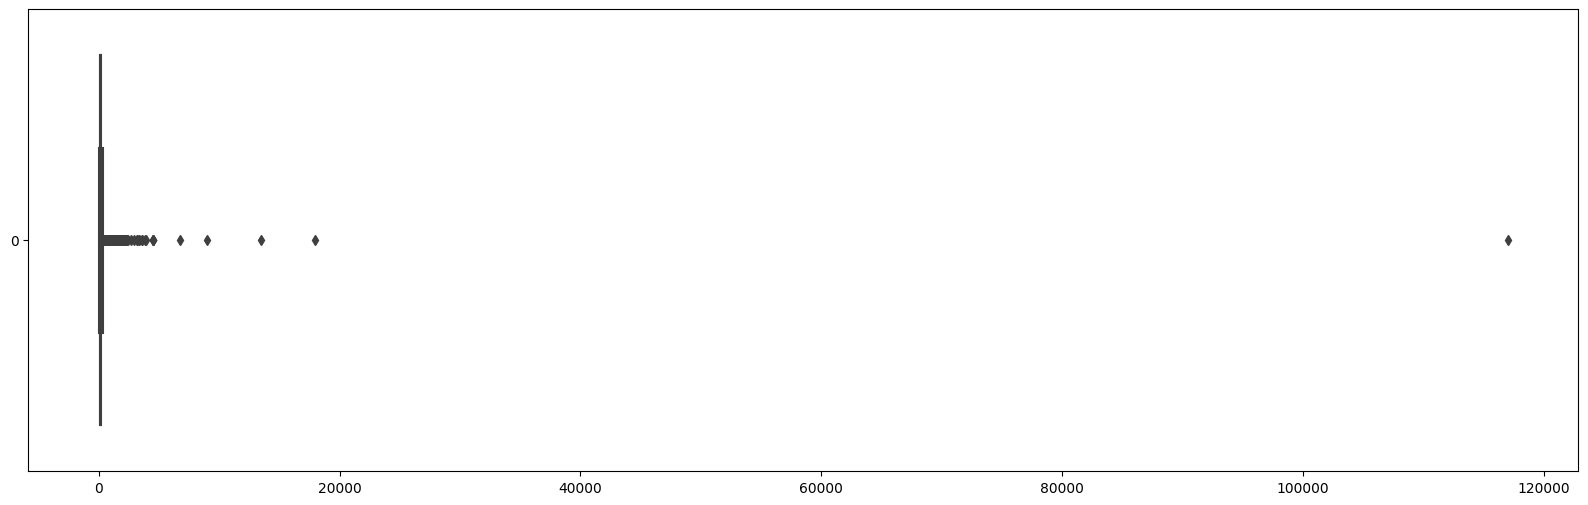

In [ ]:
# dividing by 1000 for the ease of read
sns.boxplot(df['AMT_INCOME_TOTAL']/1000,orient='horizontal')

In [ ]:
# checking column statistics
(df['AMT_INCOME_TOTAL']/1000).describe()

count    307511.000000
mean        168.797919
std         237.123146
min          25.650000
25%         112.500000
50%         147.150000
75%         202.500000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
# Maximum value for boxplot
IQR_AMT_INCOME_TOTAL = (df['AMT_INCOME_TOTAL']/1000).quantile(0.75) - (df['AMT_INCOME_TOTAL']/1000).quantile(0.25)
Upper_limit_AMT_INCOME_TOTAL = (df['AMT_INCOME_TOTAL']/1000).quantile(0.75) + IQR_AMT_INCOME_TOTAL*1.5
Upper_limit_AMT_INCOME_TOTAL

337.5

In [ ]:
# percentage of outliers in AMT_INCOME_TOTAL
round(100.0 * len(df[(df['AMT_INCOME_TOTAL']/1000)>Upper_limit_AMT_INCOME_TOTAL])/len(df), 2)

4.56

#### From the boxplot, we can see there are outliers in AMT_INCOME_TOTAL. The percentage of outliers stands at 4.56%


#### 3.5.3 Outlier analysis for AMT_CREDIT

<Axes: >

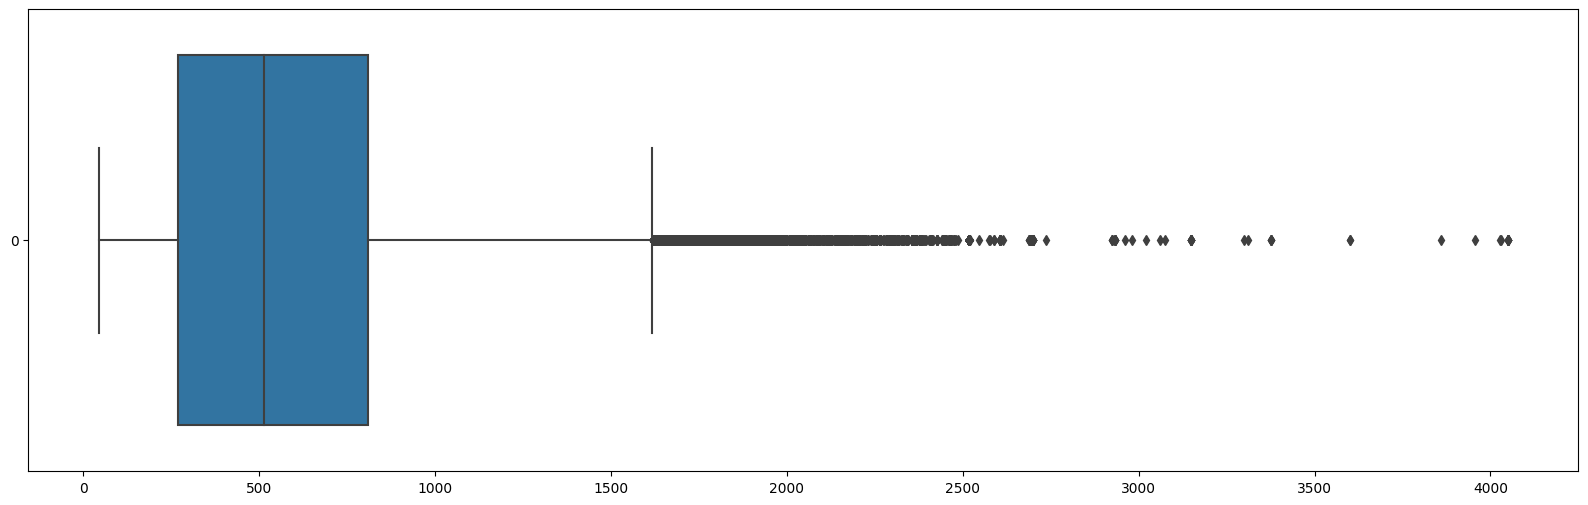

In [ ]:
# dividing by 1000 for our convinience
sns.boxplot(df['AMT_CREDIT']/1000.0,orient='horizontal')

In [ ]:
# checking column statistics
(df['AMT_CREDIT']/1000).describe()

count    307511.000000
mean        599.026000
std         402.490777
min          45.000000
25%         270.000000
50%         513.531000
75%         808.650000
max        4050.000000
Name: AMT_CREDIT, dtype: float64

In [ ]:
# finding the inter quartile range for the maximum value
IQR_AMT_CREDIT = (df['AMT_CREDIT']/1000).quantile(0.75) - (df['AMT_CREDIT']/1000).quantile(0.25)
Upper_limit_AMT_CREDIT = (df['AMT_CREDIT']/1000).quantile(0.75) + IQR_AMT_CREDIT*1.5
Upper_limit_AMT_CREDIT

1616.625

In [ ]:
# percentage of outliers in AMT_CREDIT
round(100.0 * len(df[(df['AMT_CREDIT']/1000)>Upper_limit_AMT_CREDIT])/len(df), 2)

2.13

#### From the boxplot, we can see there are outliers in AMT_CREDIT. The percentage of outliers stands at 2.13%


####  Outlier analysis for AMT_ANNUITY

<Axes: >

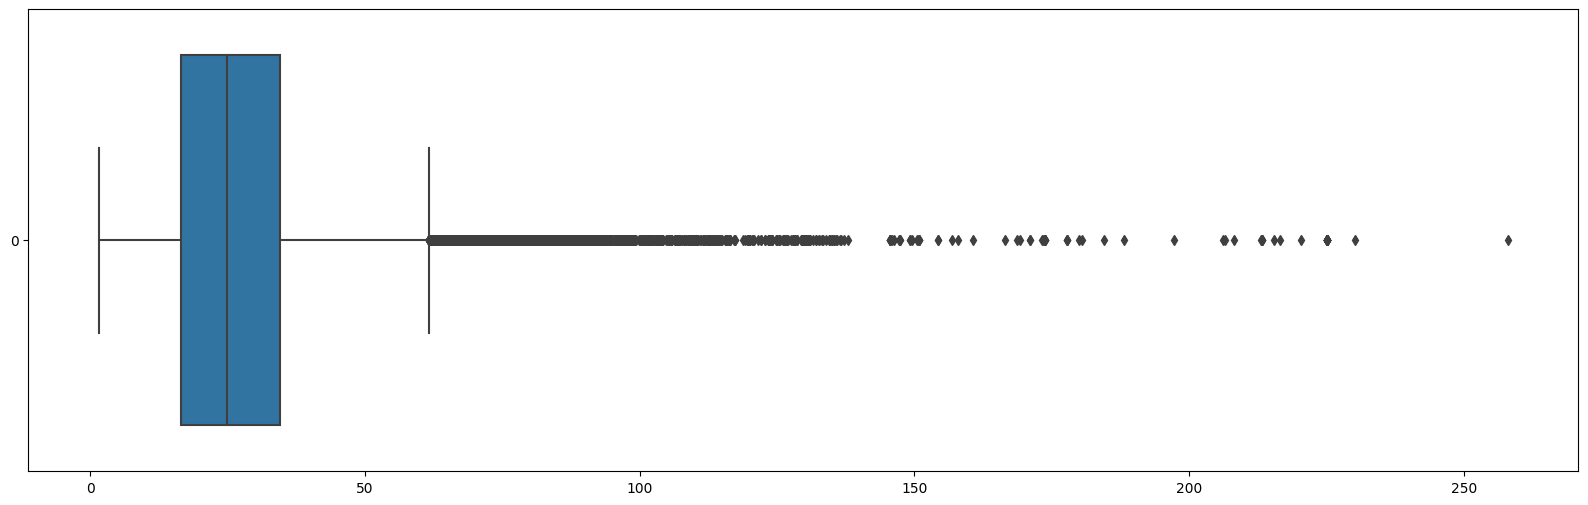

In [ ]:
# dividing by 1000 for our convinience
sns.boxplot(df['AMT_ANNUITY']/1000.0,orient='horizontal')

In [ ]:
# checking column statistics
(df['AMT_ANNUITY']/1000).describe()

count    307499.000000
mean         27.108574
std          14.493737
min           1.615500
25%          16.524000
50%          24.903000
75%          34.596000
max         258.025500
Name: AMT_ANNUITY, dtype: float64

In [ ]:
#finding the inter quartile range for the maximum value
IQR_AMT_ANNUITY = (df['AMT_ANNUITY']/1000).quantile(0.75) - (df['AMT_ANNUITY']/1000).quantile(0.25)
Upper_limit_AMT_ANNUITY = (df['AMT_ANNUITY']/1000).quantile(0.75) + IQR_AMT_ANNUITY*1.5
Upper_limit_AMT_ANNUITY

61.70399999999999

In [ ]:
# percentage of outliers in AMT_ANNUITY
round(100.0 * len(df[(df['AMT_ANNUITY']/1000)>Upper_limit_AMT_ANNUITY])/len(df), 2)

2.44

#### From the boxplot, we can see there are outliers in AMT_ANNUITY. The percentage of outliers stands at 2.44%


#### Outlier analysis for FLOORSMAX_AVG

<Axes: >

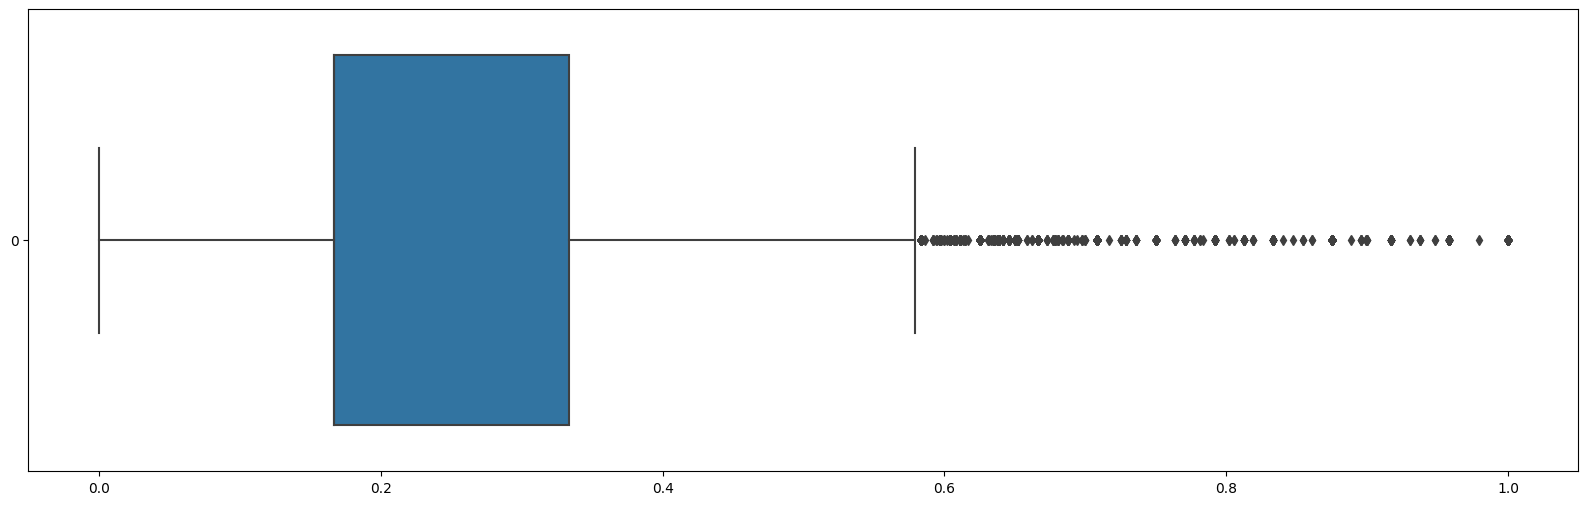

In [ ]:
sns.boxplot(df['FLOORSMAX_AVG'],orient='horizontal')

In [ ]:
(df['FLOORSMAX_AVG']).describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

In [ ]:
#finding the inter quartile range for the maximum value
IQR_FLOORSMAX_AVG = (df['FLOORSMAX_AVG']).quantile(0.75) - (df['FLOORSMAX_AVG']).quantile(0.25)
Upper_limit_FLOORSMAX_AVG = (df['FLOORSMAX_AVG']).quantile(0.75) + IQR_FLOORSMAX_AVG*1.5
Upper_limit_FLOORSMAX_AVG

0.5831999999999999

In [ ]:
# percentage of outliers in FLOORSMAX_AVG
round(100.0 * len(df[(df['FLOORSMAX_AVG'])>Upper_limit_FLOORSMAX_AVG])/len(df), 2)

1.7

#### From the boxplot, we can see there are outliers in FLOORSMAX_AVG. The percentage of outliers stands at 1.7%


###  Binning of continuous Variable

binning means dividing the data into smaller intervals known as bins.


#### For the binning, we will use following columns
- AGE_GROUP
- AMT_CATEGORY

In [ ]:
#DAYS_BIRTH column can be binned 0-10,10-20,20-30,30-40, 40-50 and so on
df['AGE_GROUP'] = pd.cut(x=df.DAYS_BIRTH, bins=[0,19,29, 39, 49, 59,69,79,89], labels=['10s','20s', '30s', '40s' ,'50s', '60s','70s', '80s'])
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       25.92           1.75               9.99   
1                    0.003541       45.93           3.25               3.25   
2                    0.010032       52.18           0.62              11.67   
3                    0.008019       52.07           8.33              26.94   
4                    0.028663       54.61           8.32              11.81   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             5.81           1               1                0   
1             0.80           1               1                0   
2             6.93           1               1                1   
3             6.68           1               1                0   
4             9.47           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [ ]:
# 2. AMT_INCOME_TOTAL column can be binned 'Low','Average', 'Good', 'Best' ,'High', 'Very High'
df['AMT_CATEGORY'] = pd.cut(x=df.AMT_INCOME_TOTAL, bins=[0,100000, 200000, 300000, 400000, 500000, 600000], labels=['Low','Average', 'Good', 'Best' ,'High', 'Very High'])
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       25.92           1.75               9.99   
1                    0.003541       45.93           3.25               3.25   
2                    0.010032       52.18           0.62              11.67   
3                    0.008019       52.07           8.33              26.94   
4                    0.028663       54.61           8.32              11.81   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             5.81           1               1                0   
1             0.80           1               1                0   
2             6.93           1               1                1   
3             6.68           1               1                0   
4             9.47           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

## ANALYSIS

In [ ]:
df.shape

(307511, 81)

### For  analysis, we will remove irrelevant columns and continue analysis with a few selected columns

In [ ]:
# list of columns to be dropped
drop_columns = ['FLAG_CONT_MOBILE',
                'FLAG_MOBIL',
                'FLAG_EMP_PHONE',
                'FLAG_WORK_PHONE',
                'FLAG_PHONE',
                'FLAG_EMAIL',
                'HOUR_APPR_PROCESS_START',
                'WEEKDAY_APPR_PROCESS_START',
                'FLOORSMAX_AVG',
                'EXT_SOURCE_2',
                'EXT_SOURCE_3',
                'FLOORSMAX_AVG',
                'FLOORSMAX_MODE',
                'FLOORSMAX_MEDI',
                'TOTALAREA_MODE',
                'EMERGENCYSTATE_MODE',
                'REGION_POPULATION_RELATIVE',
                'YEARS_BEGINEXPLUATATION_AVG',
                'YEARS_BEGINEXPLUATATION_MEDI',
                'YEARS_BEGINEXPLUATATION_MODE',
                'REG_REGION_NOT_LIVE_REGION',
                'REG_REGION_NOT_WORK_REGION',
                'LIVE_REGION_NOT_WORK_REGION',
                'REG_CITY_NOT_LIVE_CITY',
                'REG_CITY_NOT_WORK_CITY',
                'LIVE_CITY_NOT_WORK_CITY',
                'FLAG_DOCUMENT_2',
                'FLAG_DOCUMENT_3',
                'FLAG_DOCUMENT_4',
                'FLAG_DOCUMENT_5',
                'FLAG_DOCUMENT_6',
                'FLAG_DOCUMENT_7',
                'FLAG_DOCUMENT_8',
                'FLAG_DOCUMENT_9',
                'FLAG_DOCUMENT_10',
                'FLAG_DOCUMENT_11',
                'FLAG_DOCUMENT_12',
                'FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14',
                'FLAG_DOCUMENT_15',
                'FLAG_DOCUMENT_16',
                'FLAG_DOCUMENT_17',
                'FLAG_DOCUMENT_18',
                'FLAG_DOCUMENT_19',
                'FLAG_DOCUMENT_20',
                'FLAG_DOCUMENT_21'
               ]

In [ ]:
df_2 = df.drop(columns=drop_columns, axis=1)
df_2

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0       House / apartment       25.92           1.75               9.99   
1       House / apartment       45.93           3.25               3.25   
2       House / apartment       52.18           0.62              11.67   
3       House / apartment       52.07           8.33              26.94   
4       House / apartment       54.61           8.32              11.81   
...                   ...         ...            ...                ...   
307506       With parents       25.55           0.65       

In [ ]:
df_2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       25.92           1.75               9.99             5.81   
1       45.93           3.25               3.25             0.80   
2       52.18           0.62              11.67             6.93   
3       52.07           8.33              26.94             6.68   
4       54.61           8.32              11.81             9.47   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                            2  Business Entity Type 3   
1                            1                  School   
2                            2              Government   
3                            2  Business Entity Type 3   
4                            2                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                    3.11   
1                       1.0                       0.0                    2.27   
2                       0.0                       0.0                    2.23   
3                       2.0                       0.0                    1.69   
4                       0.0                       0.0                    3.03   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CRED

In [ ]:
# looking at the columns with missing value in remaining dataframe
round(100.0 * df_2.isnull().sum()/len(df_2), 2).sort_values()

SK_ID_CURR                      0.00
DAYS_LAST_PHONE_CHANGE          0.00
ORGANIZATION_TYPE               0.00
REGION_RATING_CLIENT_W_CITY     0.00
REGION_RATING_CLIENT            0.00
CNT_FAM_MEMBERS                 0.00
DAYS_ID_PUBLISH                 0.00
DAYS_EMPLOYED                   0.00
DAYS_BIRTH                      0.00
NAME_HOUSING_TYPE               0.00
NAME_FAMILY_STATUS              0.00
NAME_EDUCATION_TYPE             0.00
DAYS_REGISTRATION               0.00
AGE_GROUP                       0.00
AMT_ANNUITY                     0.00
AMT_CREDIT                      0.00
AMT_INCOME_TOTAL                0.00
TARGET                          0.00
CNT_CHILDREN                    0.00
FLAG_OWN_REALTY                 0.00
FLAG_OWN_CAR                    0.00
CODE_GENDER                     0.00
NAME_CONTRACT_TYPE              0.00
NAME_INCOME_TYPE                0.00
AMT_GOODS_PRICE                 0.09
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
O

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

##  Checking imbalance in data

In [ ]:
# Finding % of people with outstanding dues and no outstanding dues.


target_0_percentage = (round (len(df_2.query('TARGET==0'))/len(df_2),4)) * 100
print ("Target_0_percentage:", target_0_percentage,"%")

target_1_percentage = (round (len(df_2.query('TARGET==1'))/len(df_2),4)) * 100
print ("Target_1_percentage:", target_1_percentage,"%")

Target_0_percentage: 91.93 %
Target_1_percentage: 8.07 %


#### As the percentage of Target =0 and Target =1 are different, there is an imbalance

###  Creation of two data sets - one for each Target = 1 and Target = 0

####  Creating Target_0_df, people having no outstanding dues

In [ ]:
# Creating Dataframe of the non-defaulters
target_0_df = df_2.query('TARGET==0')
target_0_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
5                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
307505               Y             0          112500.0    225000.0   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1           35698.5        1129500.0           Family         State servant   
2            6750.0         135000.0    Unaccompanied               Working   
3           29686.5         297000.0    Unaccompanied               Working   
4           21865.5         513000.0    Unaccompanied               Working   
5           27517.5         454500.0  Spouse, partner         State servant   
...             ...              ...              ...                   ...   
307505      22050.0         225000.0    Unaccompanied             Pensioner   
307506      27558.0         225000.0    Unaccompanied               Working   
307507      12001.5         225000.0    Unaccompanied             Pensioner   
307508      29979.0         585000.0    Unaccompanied               Working   
307510      49117.5         675000.0    Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
5       Secondary / secondary special               Married   
...                               ...                   ...   
307505  Secondary / secondary special  Single / not married   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1       House / apartment       45.93           3.25               3.25   
2       House / apartment       52.18           0.62              11.67   
3       House / apartment       52.07           8.33              26.94   
4       House / apartment       54.61           8.32              11.81   
5       House / apartment       46.41           4.35              13.62   
...                   ...         ...            ...                ...   
307505  House / apartment       66.81        10

In [ ]:
target_0_df.shape

(282686, 38)

##  Creating Target_1_df, people having outstanding dues

In [ ]:
# Creating Dataframe of the defaulters
target_1_df = df_2.query('TARGET==1')
target_1_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
26          100031       1         Cash loans           F            N   
40          100047       1         Cash loans           M            N   
42          100049       1         Cash loans           F            N   
81          100096       1         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307448      456186       1         Cash loans           M            N   
307475      456215       1         Cash loans           F            N   
307481      456225       1         Cash loans           M            N   
307489      456233       1         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
26                   Y             0          112500.0    979992.0   
40                   Y             0          202500.0   1193580.0   
42                   N             0          135000.0    288873.0   
81                   Y             0           81000.0    252000.0   
...                ...           ...               ...         ...   
307448               N             1          207000.0    450000.0   
307475               N             1          144000.0   1303200.0   
307481               Y             0          225000.0    297000.0   
307489               Y             0          225000.0    521280.0   
307509               Y             0          171000.0    370107.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
26          27076.5         702000.0   Unaccompanied               Working   
40          35028.0         855000.0   Unaccompanied  Commercial associate   
42          16258.5         238500.0   Unaccompanied               Working   
81          14593.5         252000.0   Unaccompanied             Pensioner   
...             ...              ...             ...                   ...   
307448      32746.5         450000.0   Unaccompanied               Working   
307475      46809.0        1125000.0   Unaccompanied               Working   
307481      19975.5         297000.0          Family               Working   
307489      23089.5         450000.0   Unaccompanied  Commercial associate   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
26      Secondary / secondary special                 Widow   
40      Secondary / secondary special               Married   
42      Secondary / secondary special        Civil marriage   
81      Secondary / secondary special               Married   
...                               ...                   ...   
307448  Secondary / secondary special               Married   
307475               Higher education        Civil marriage   
307481  Secondary / secondary special               Married   
307489  Secondary / secondary special        Civil marriage   
307509  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0       House / apartment       25.92           1.75               9.99   
26      House / apartment       51.30           7.20              18.01   
40      House / apartment       47.90           3.46               3.24   
42      House / apartment       36.67           9.85               0.12   
81      House / apartment       67.93        1000.67              14.77   
...                   ...         ...            ...                ...   
307448  House / apartment       27.17           8.35       

In [ ]:
target_1_df.shape

(24825, 38)

In [ ]:
# Checking unique values in each columns
df_2.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           6
AMT_CATEGORY                        6
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_MON          24
AMT_REQ_CREDIT_BUREAU_YEAR         25
OBS_30_CNT_SOCIAL_CIRCLE           33
OBS_60_CNT_S

In [ ]:
# Cheking column types
df_2.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
ORGANIZATION_TYPE                object


#### Any column which is either of object type or have less than 40 values is considered categorical. Remaining columns of type float or int will be considered numerical

In [ ]:
#list of all categorical columns
categorical_columns = ['NAME_CONTRACT_TYPE',
                       'FLAG_OWN_CAR',
                       'FLAG_OWN_REALTY',
                       'CODE_GENDER',
                       'NAME_EDUCATION_TYPE',
                       'AMT_CATEGORY',
                       'AGE_GROUP',
                       'NAME_FAMILY_STATUS',
                       'NAME_HOUSING_TYPE',
                       'NAME_TYPE_SUITE',
                       'NAME_INCOME_TYPE',
                       'OCCUPATION_TYPE',
                       'ORGANIZATION_TYPE',
                       'REGION_RATING_CLIENT_W_CITY',
                       'REGION_RATING_CLIENT',
                       'AMT_REQ_CREDIT_BUREAU_HOUR',
                       'DEF_60_CNT_SOCIAL_CIRCLE',
                       'AMT_REQ_CREDIT_BUREAU_WEEK',
                       'AMT_REQ_CREDIT_BUREAU_DAY',
                       'DEF_30_CNT_SOCIAL_CIRCLE',
                       'AMT_REQ_CREDIT_BUREAU_QRT',
                       'CNT_CHILDREN',
                       'CNT_FAM_MEMBERS',
                       'AMT_REQ_CREDIT_BUREAU_MON',
                       'AMT_REQ_CREDIT_BUREAU_YEAR',
                       'OBS_30_CNT_SOCIAL_CIRCLE',
                       'OBS_60_CNT_SOCIAL_CIRCLE',
                      ]

In [ ]:
# list of all continuous numerical column
numerical_columns= ['AMT_GOODS_PRICE',
                    'DAYS_LAST_PHONE_CHANGE',
                    'DAYS_ID_PUBLISH',
                    'AMT_INCOME_TOTAL',
                    'DAYS_EMPLOYED',
                    'DAYS_REGISTRATION',
                    'DAYS_BIRTH',
                    'AMT_CREDIT',
                    'AMT_ANNUITY'
                   ]

# EXPLORATORY DATA ANALYSIS

###  Univariate Analysis for categorical variable

##### Under univariate analysis, we will look at percentage distribution of values of categorial variable

<ipython-input-116-c6708e6afb87>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,10))


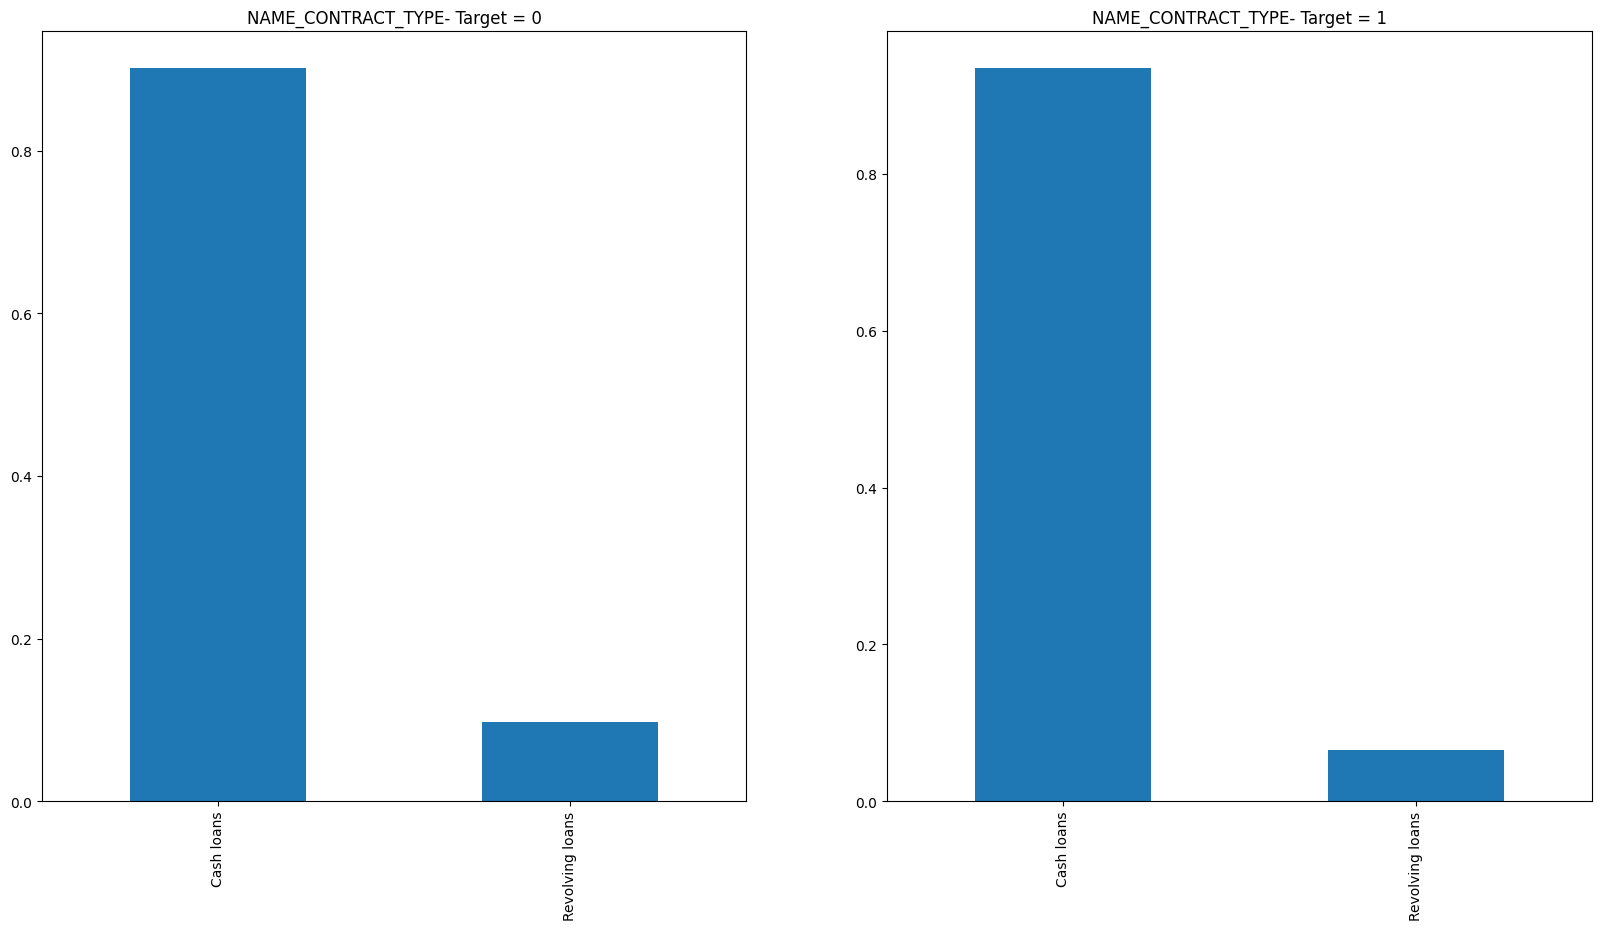

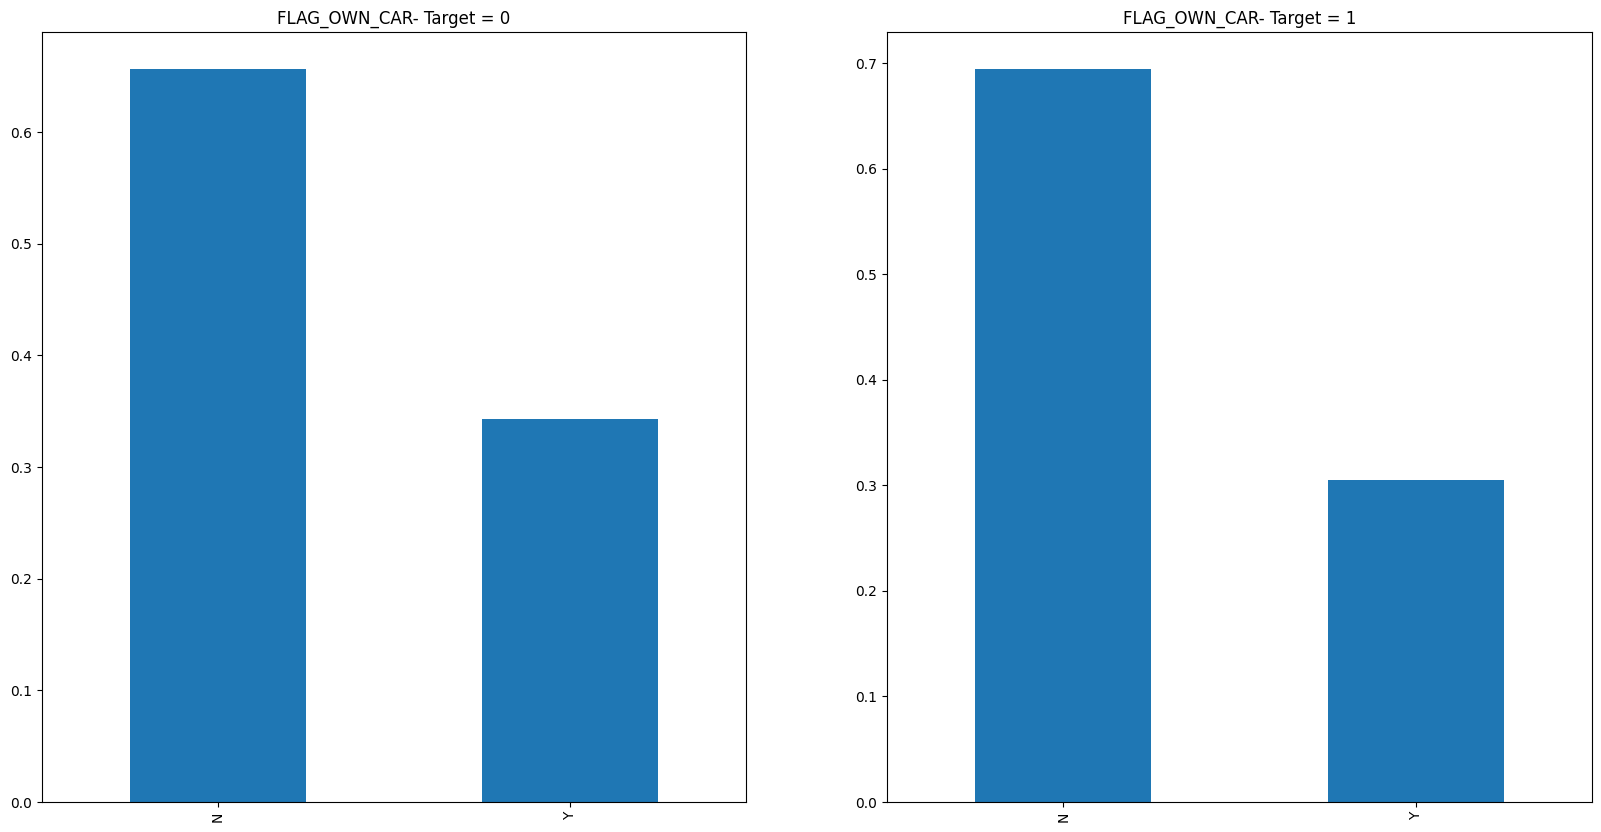

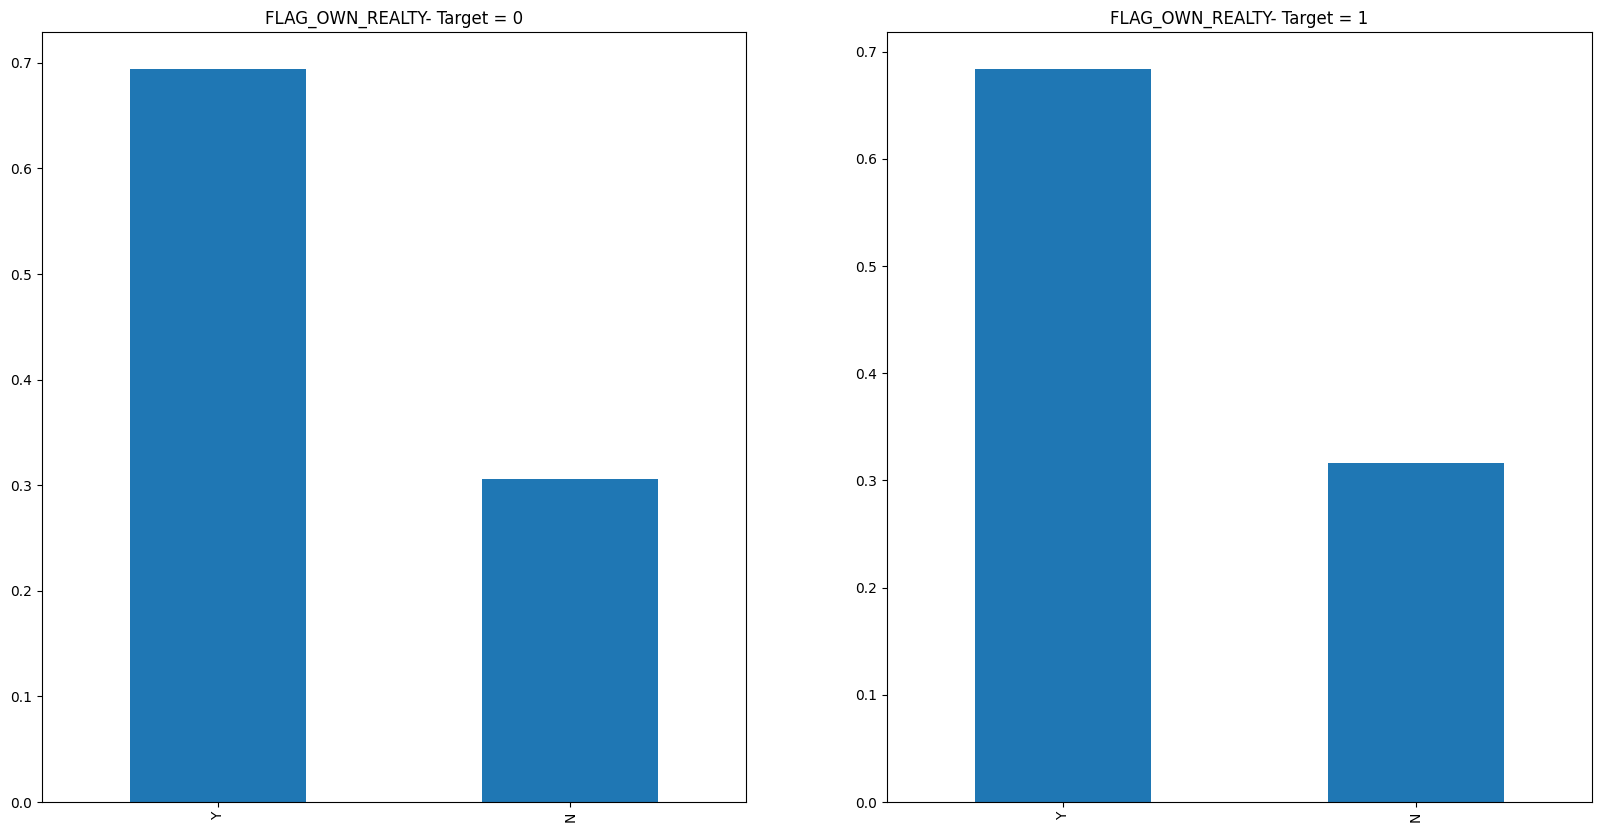

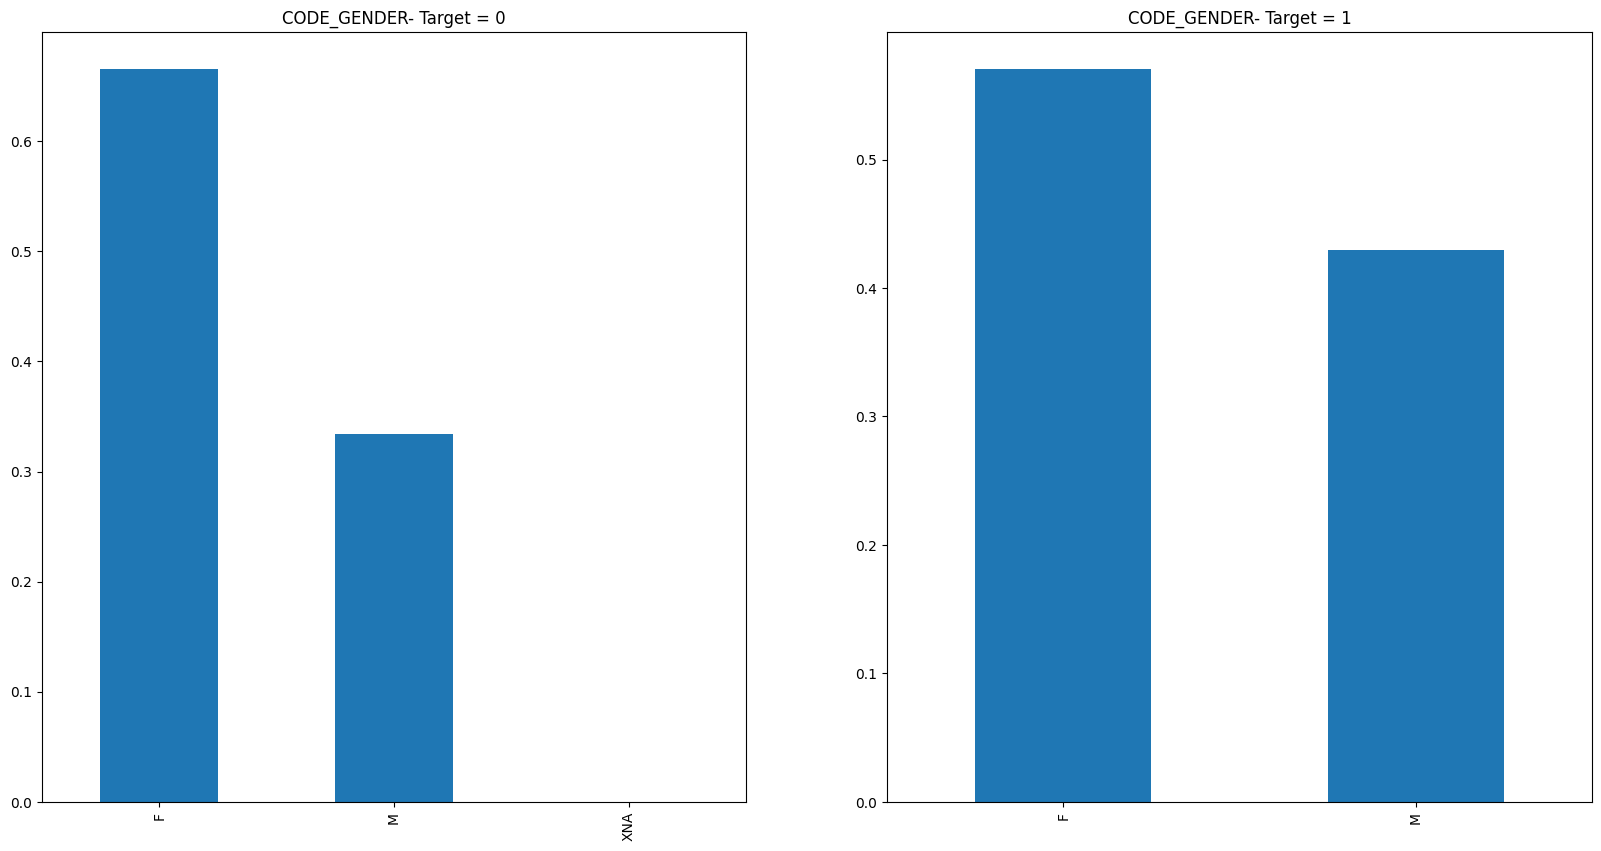

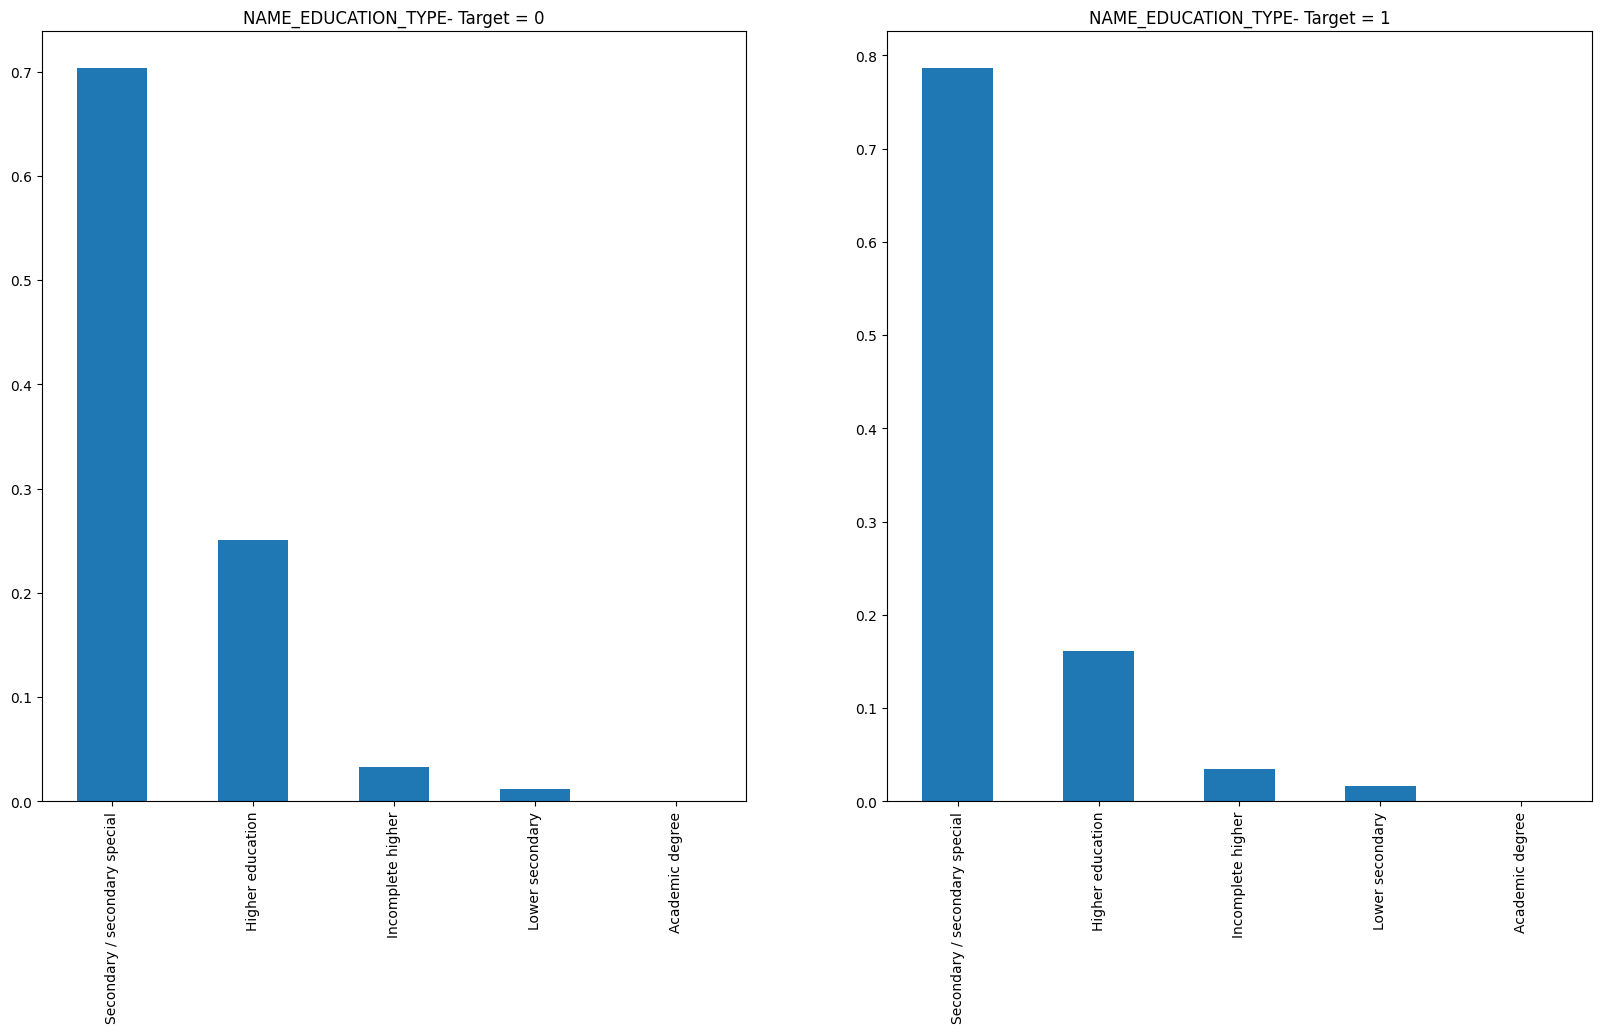

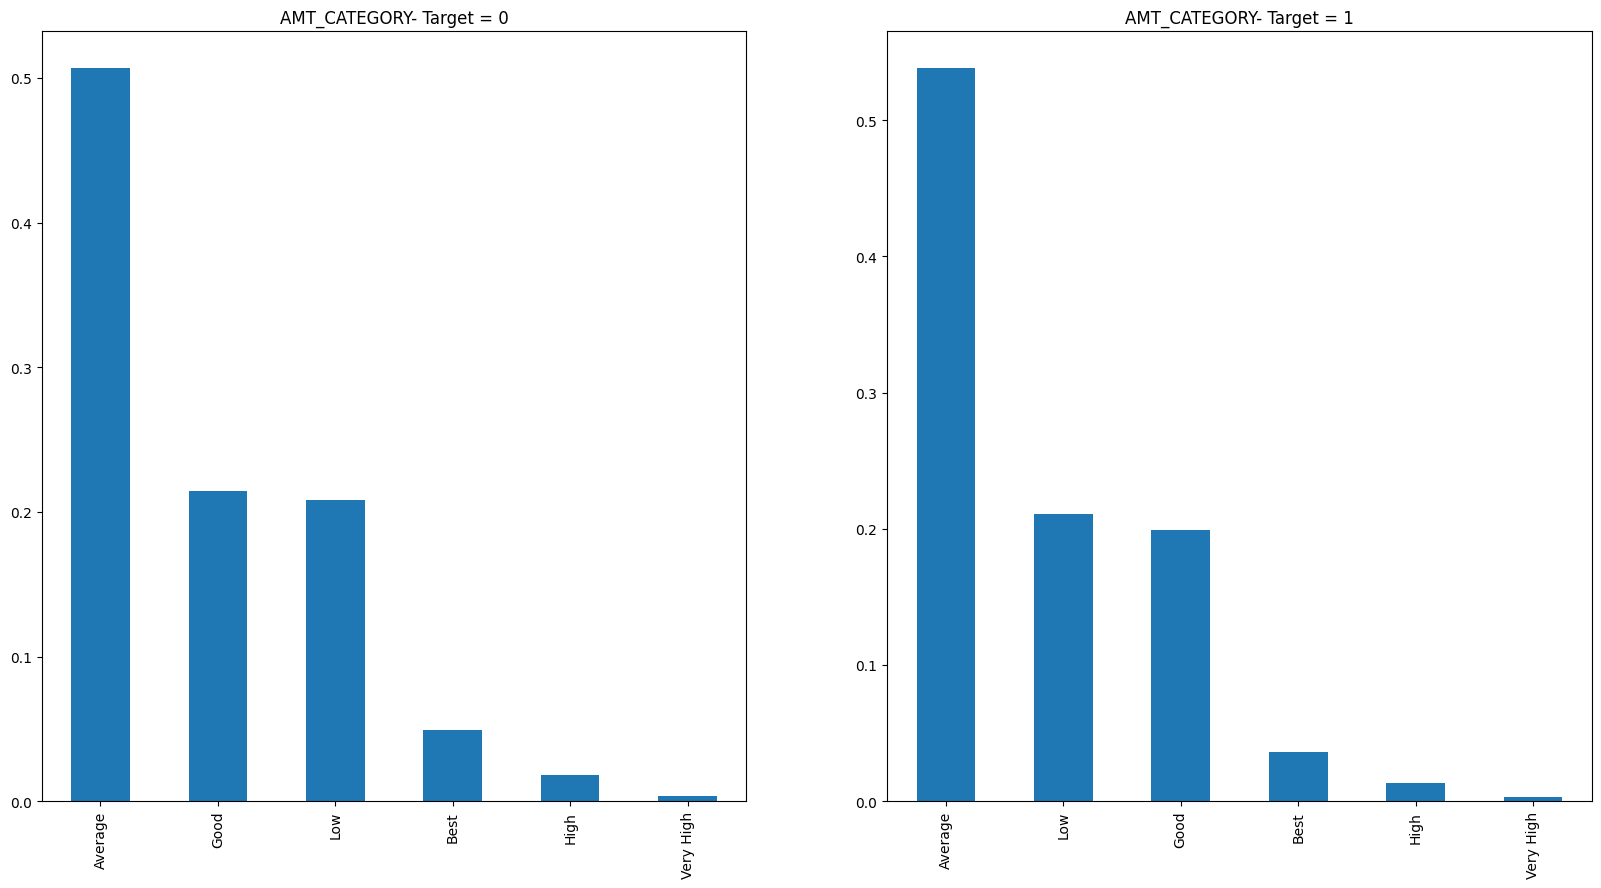

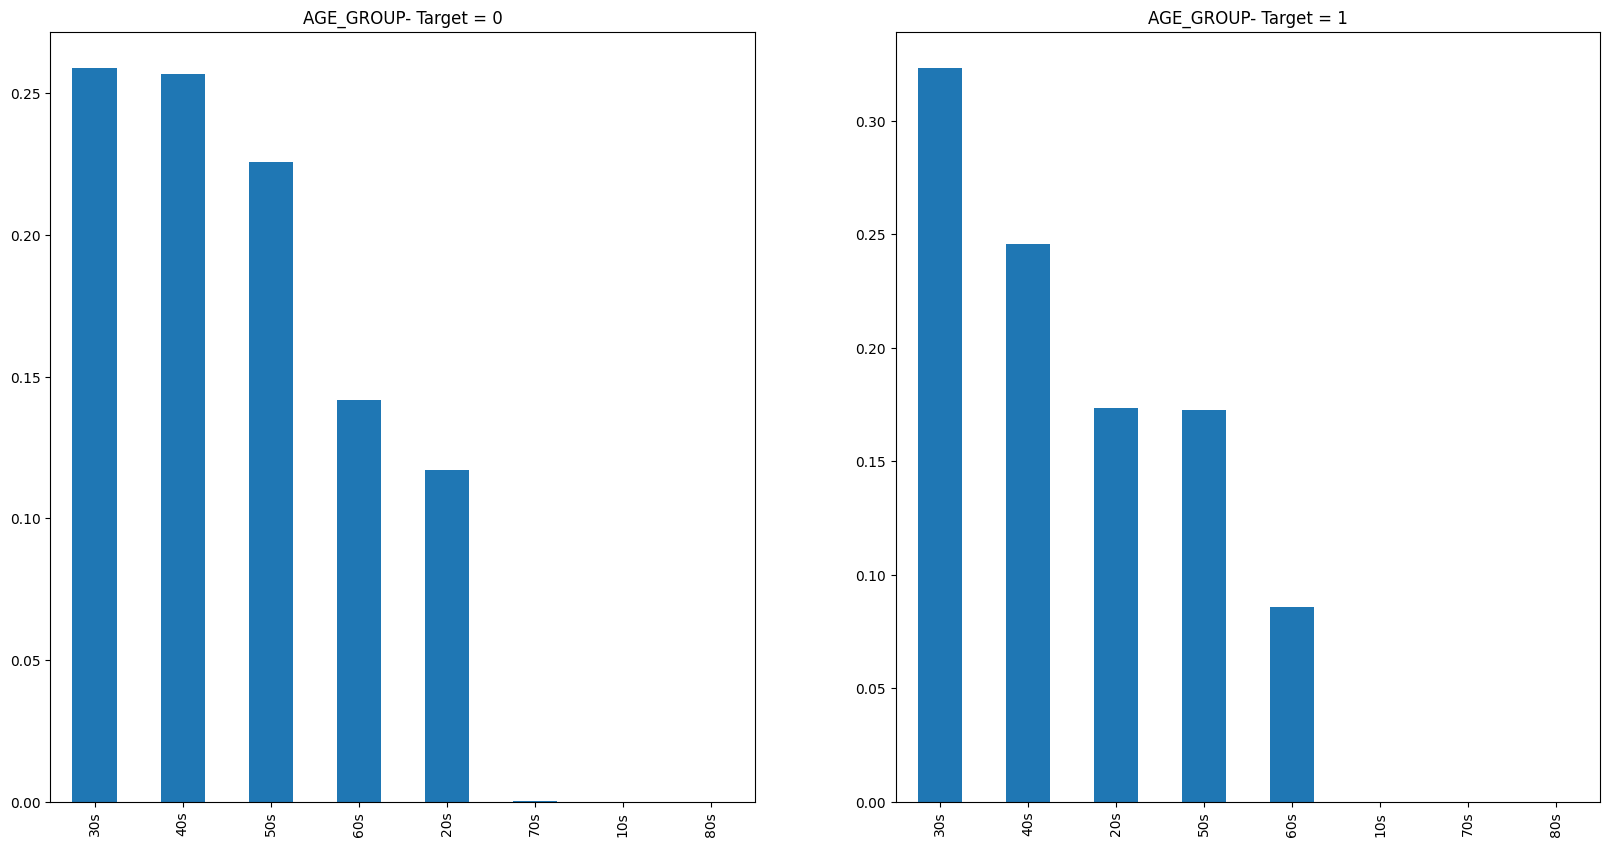

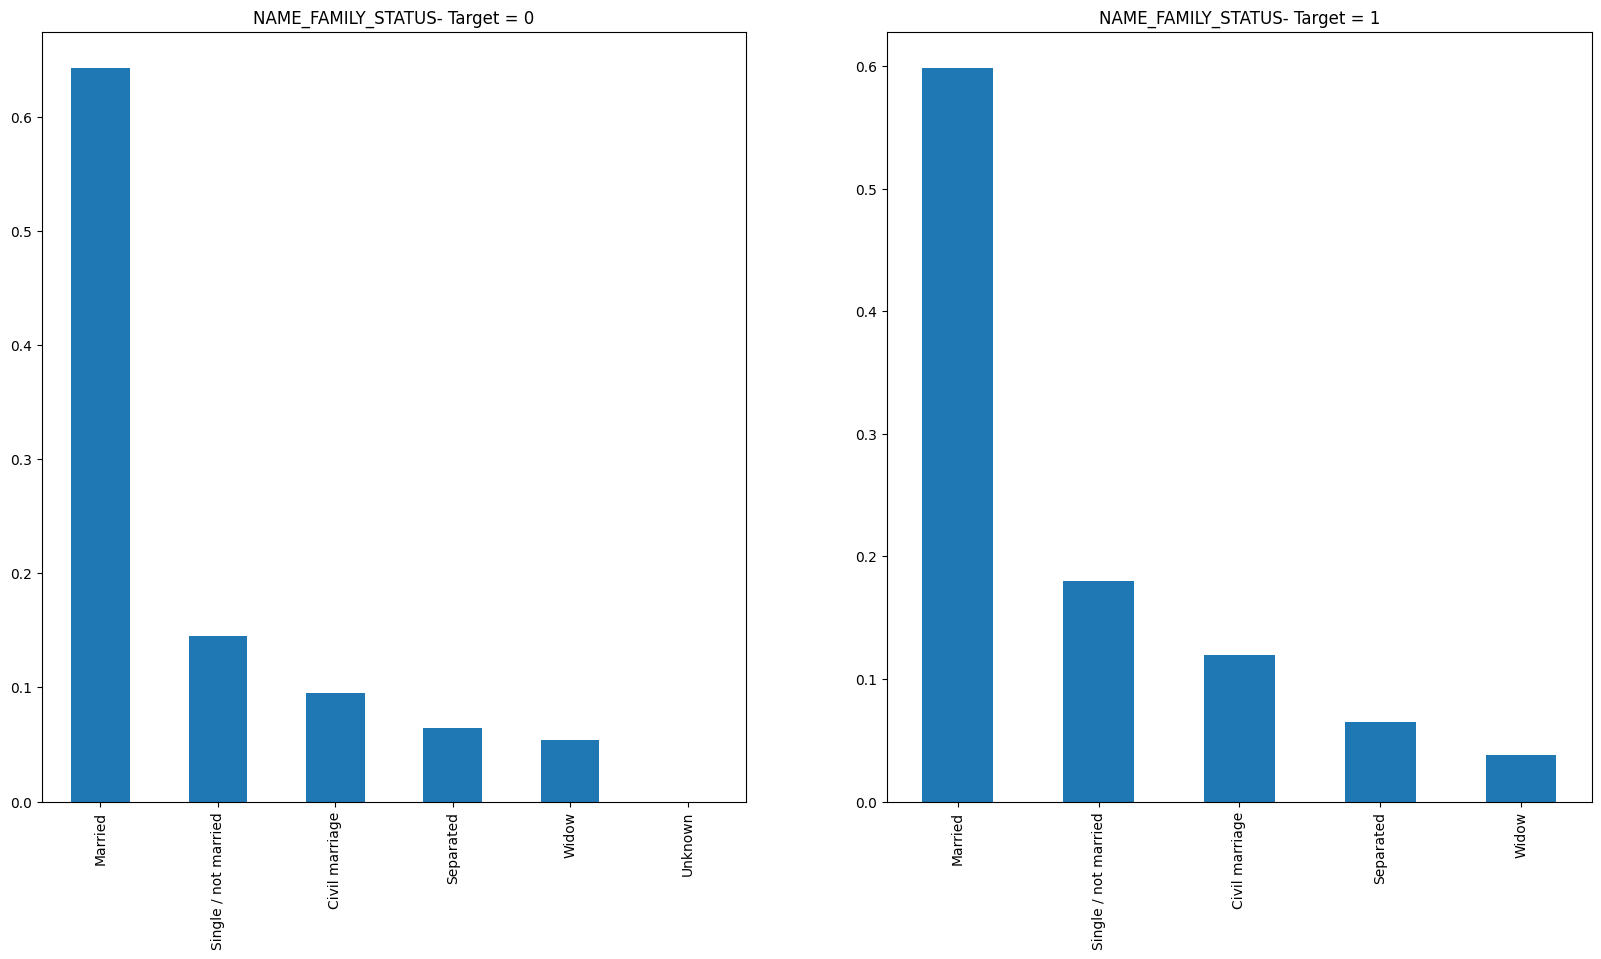

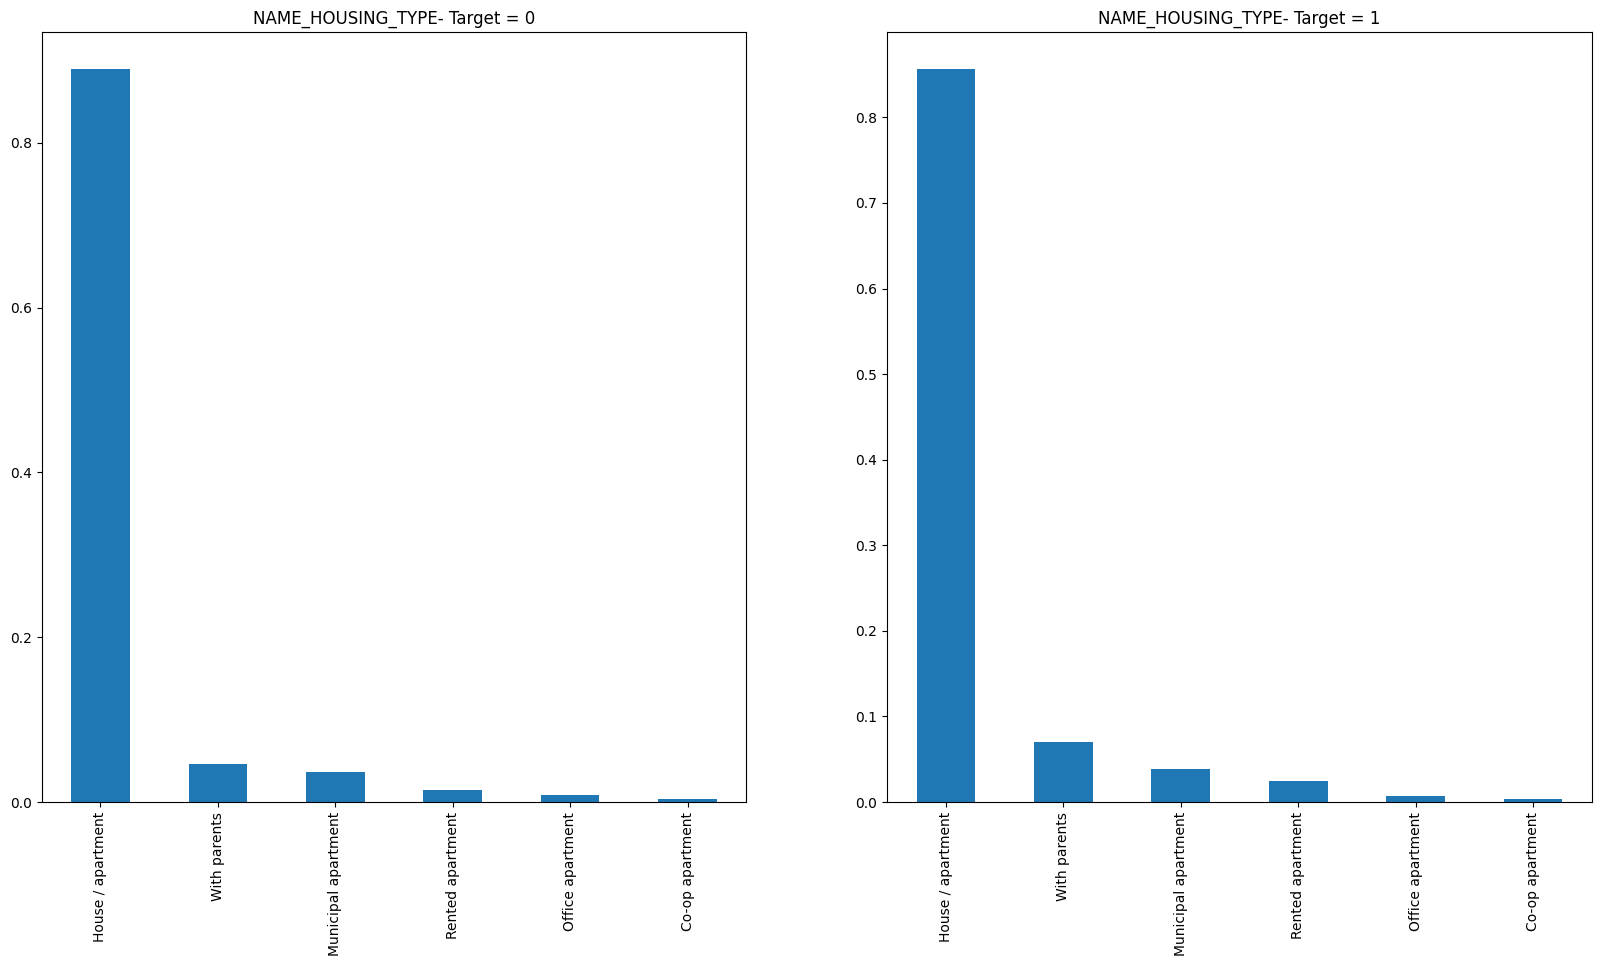

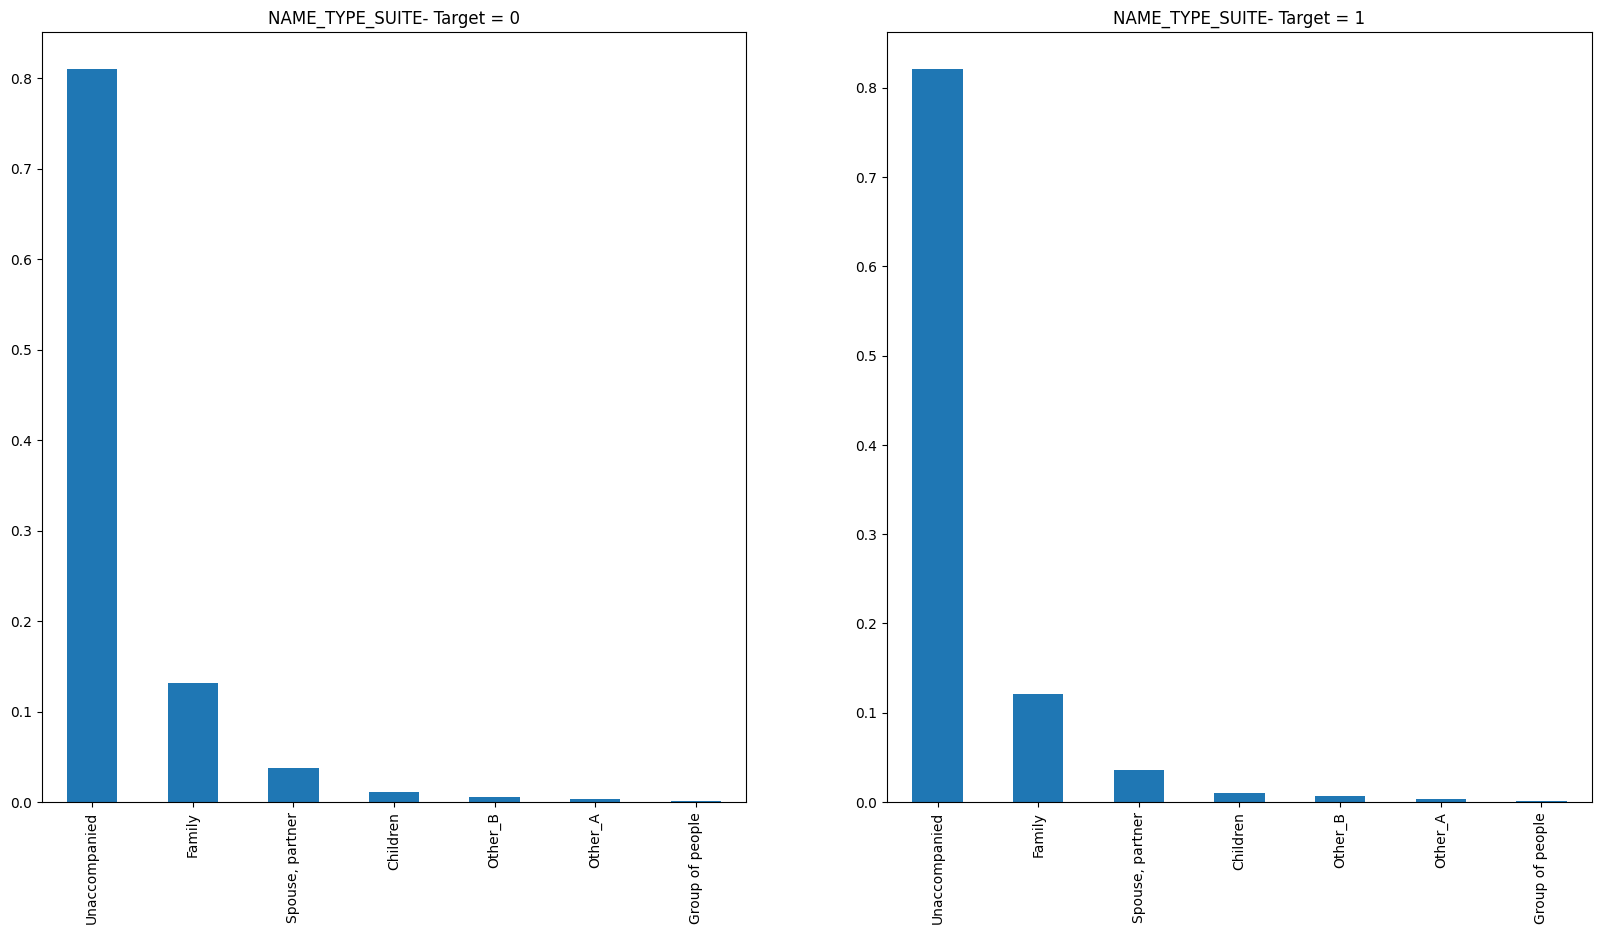

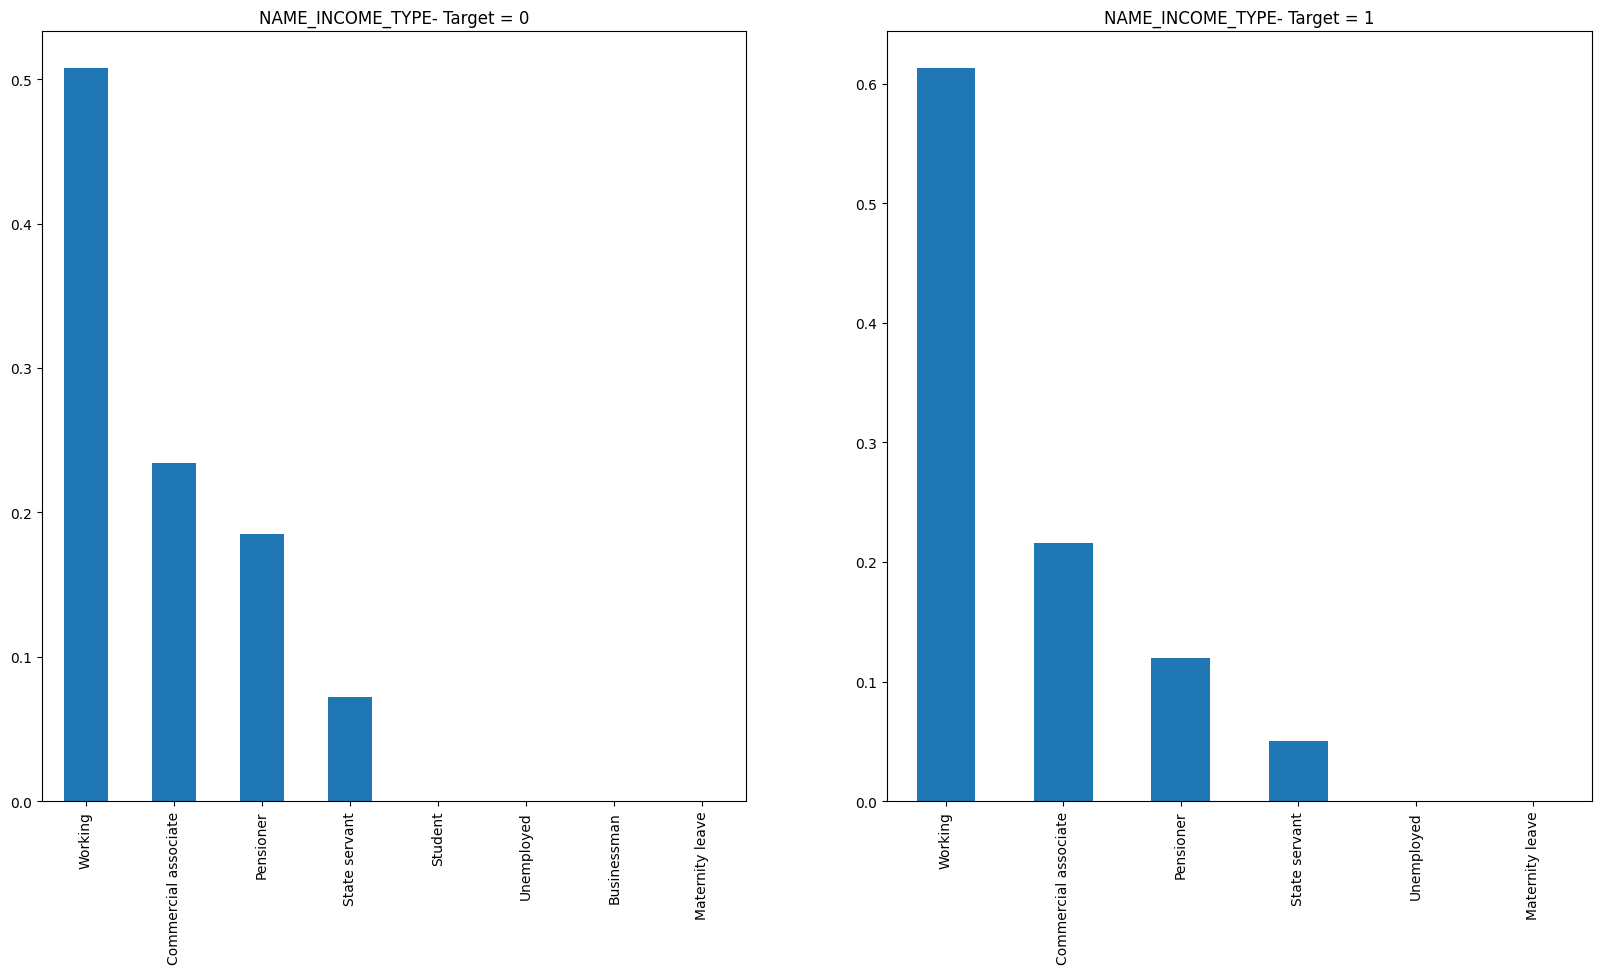

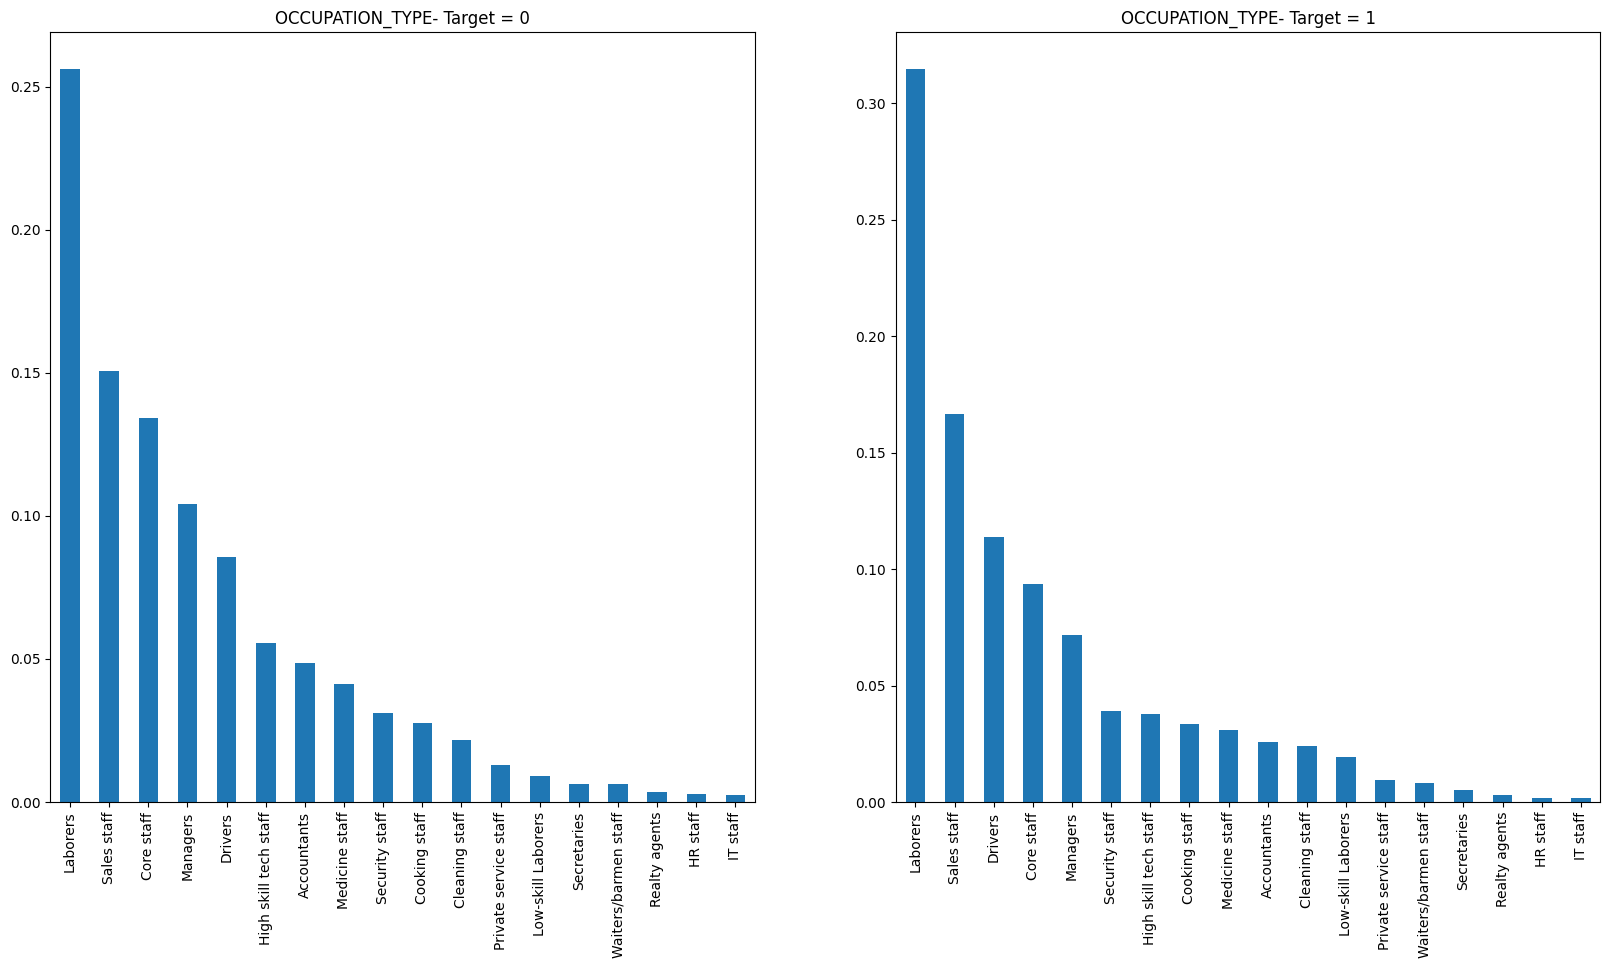

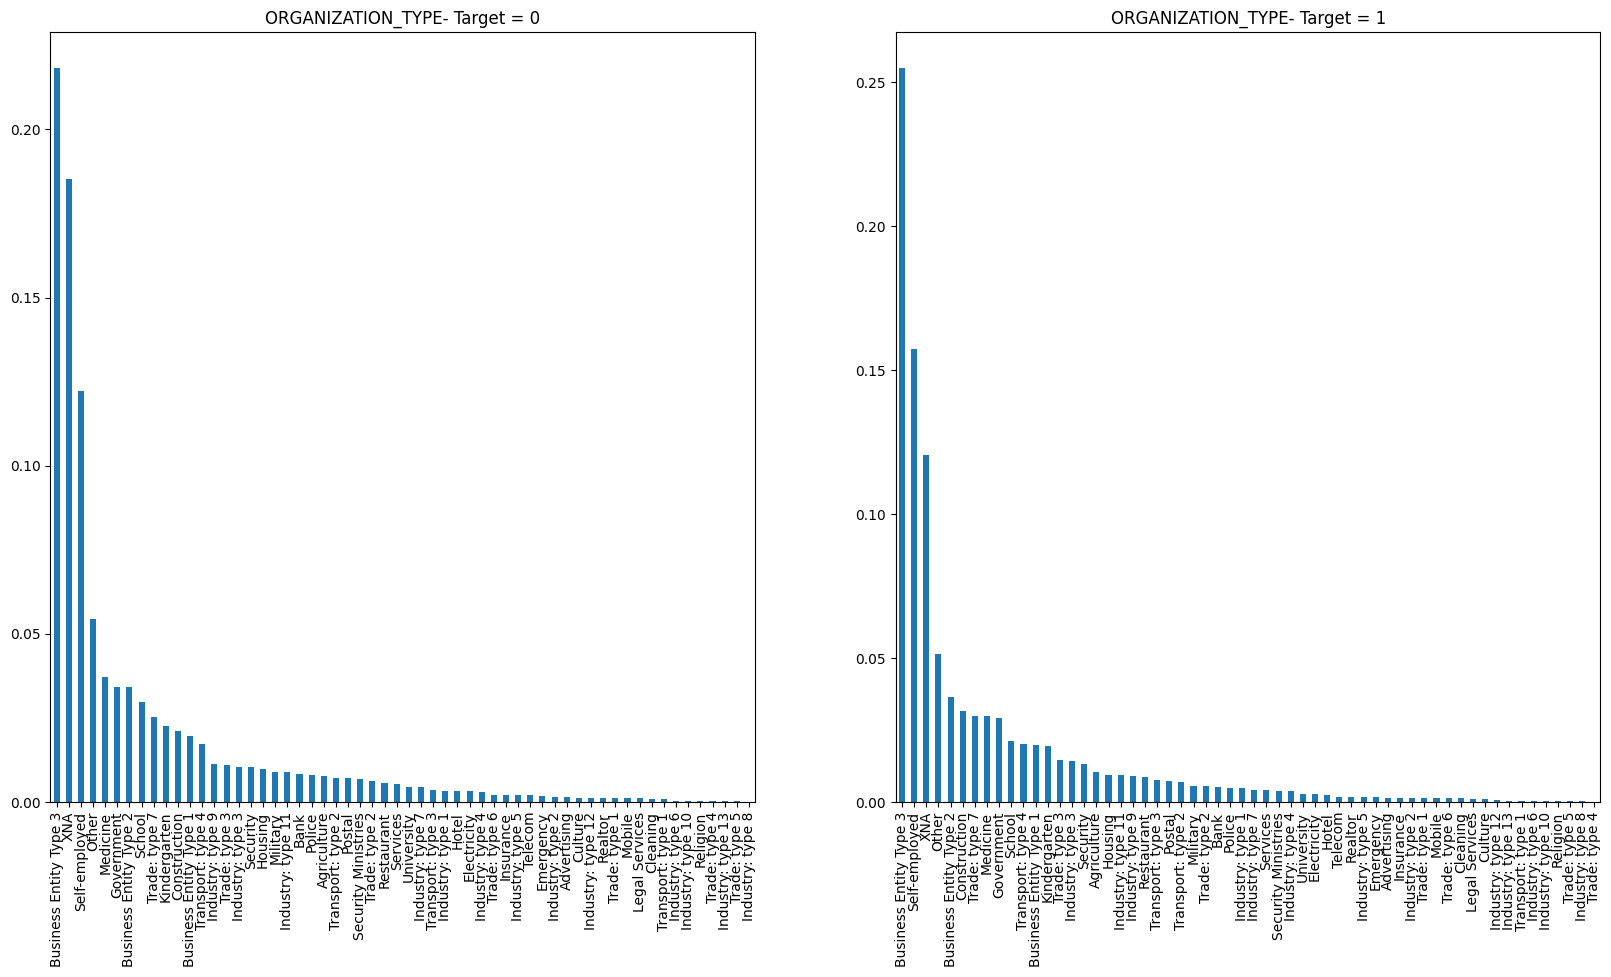

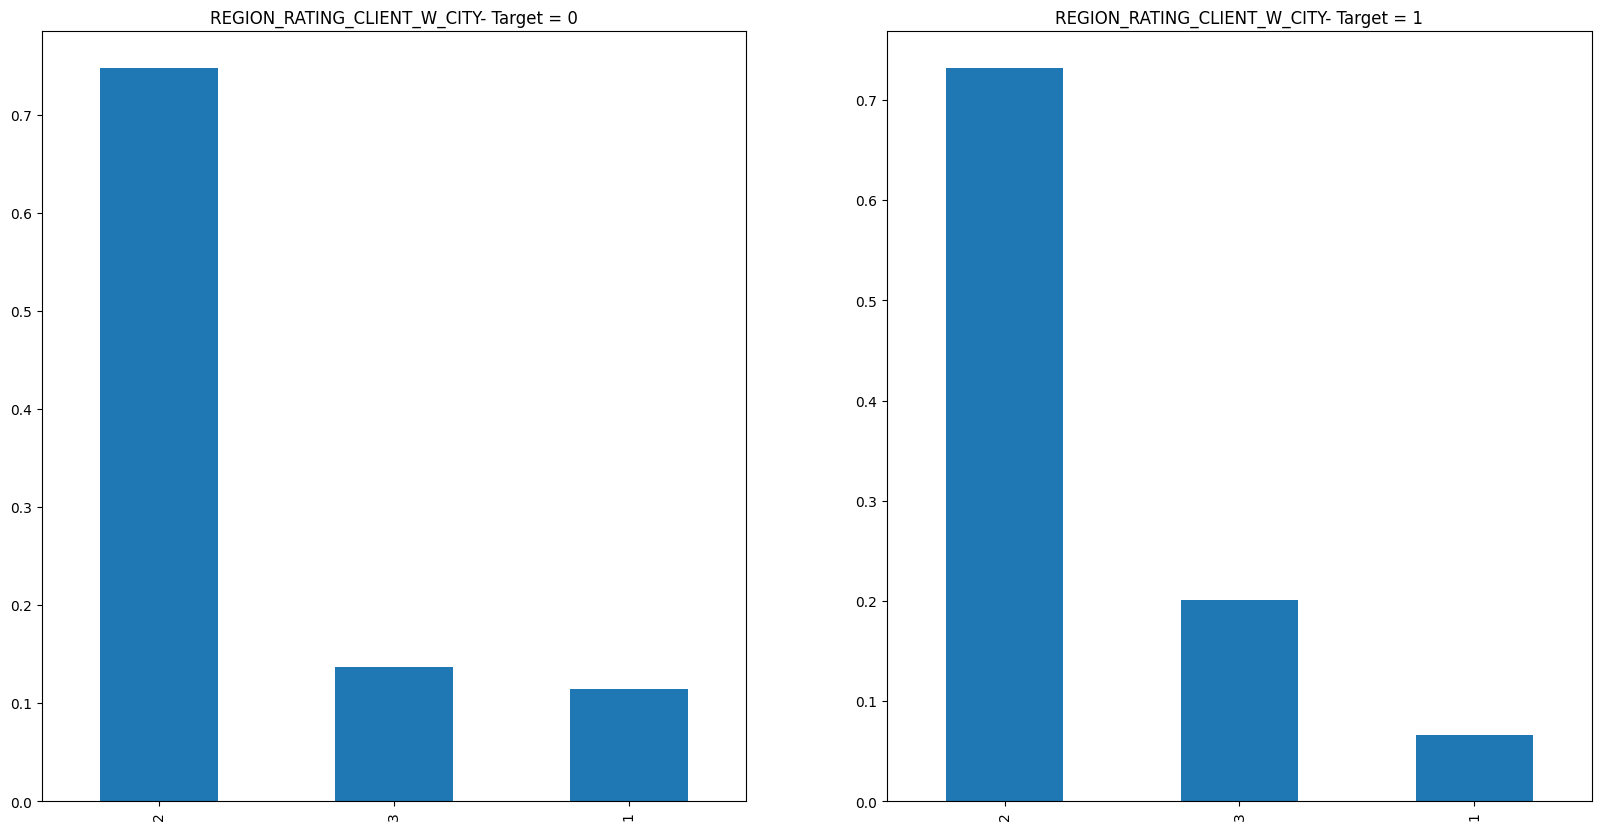

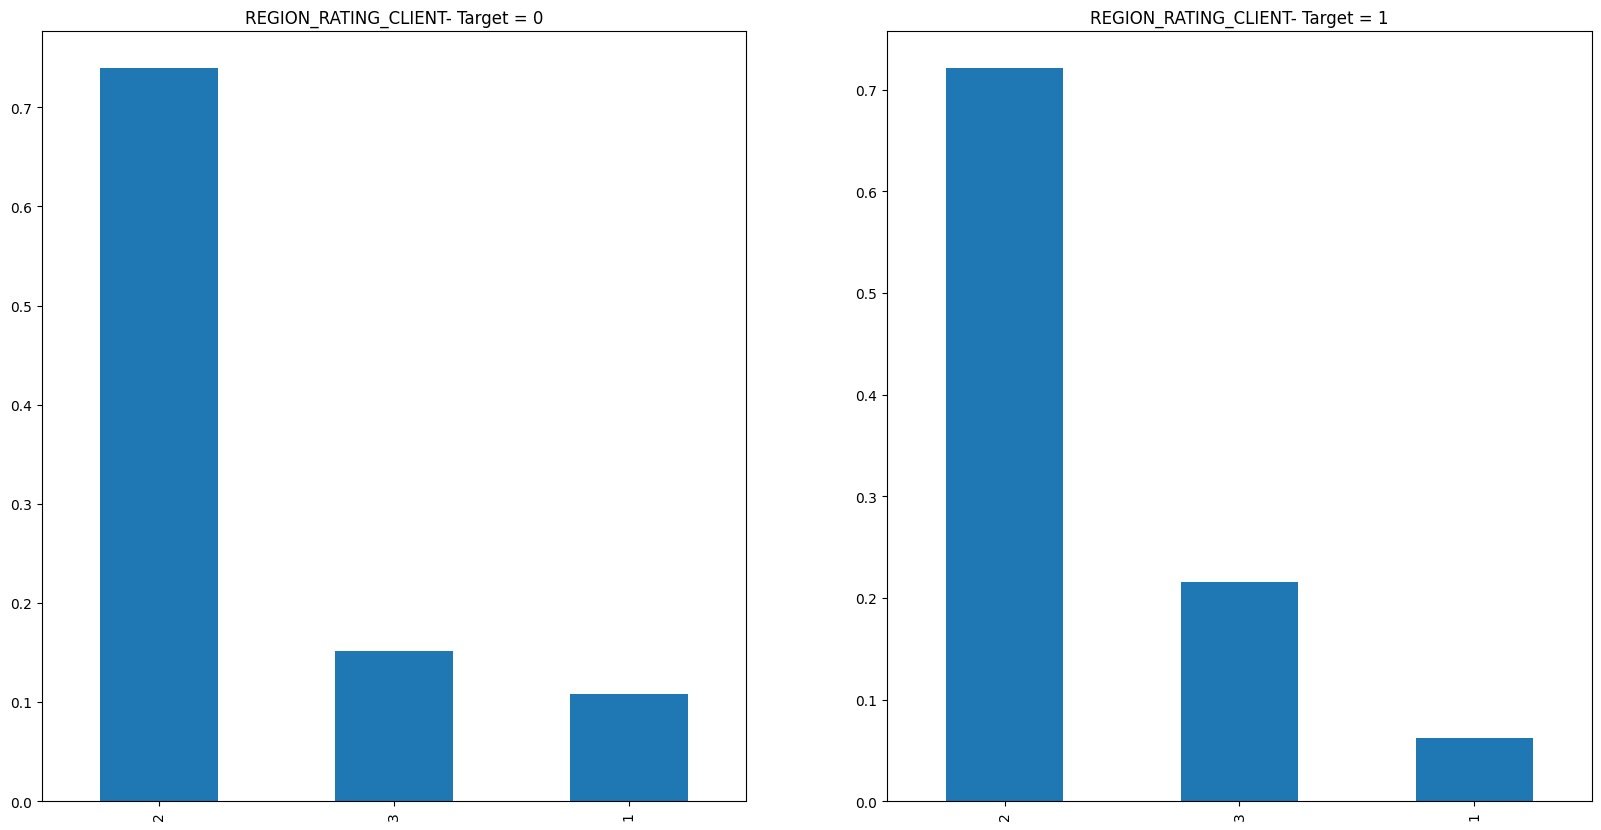

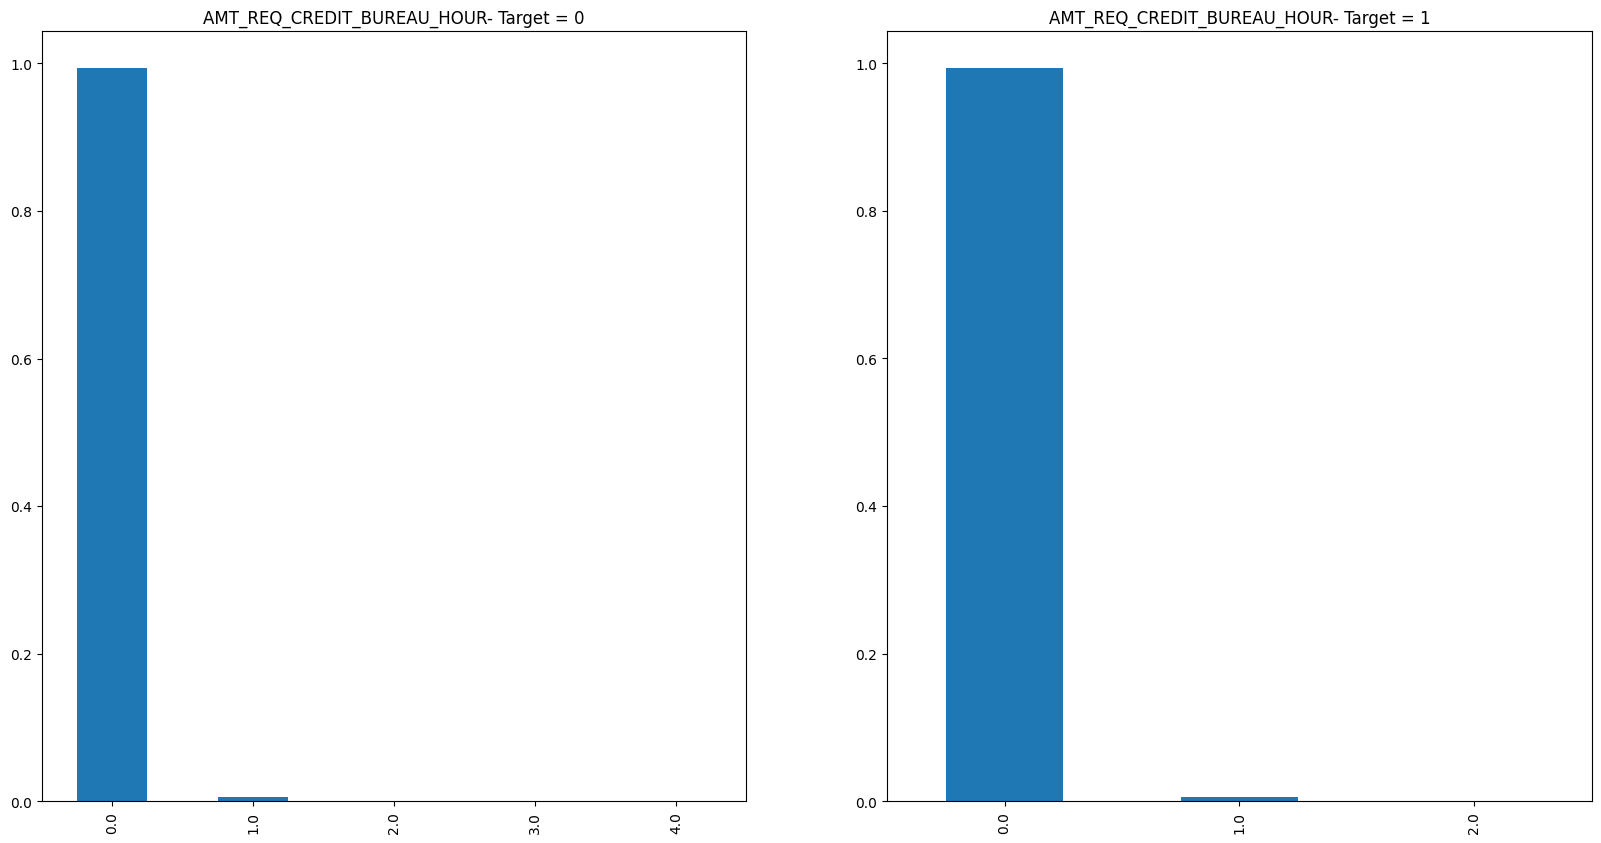

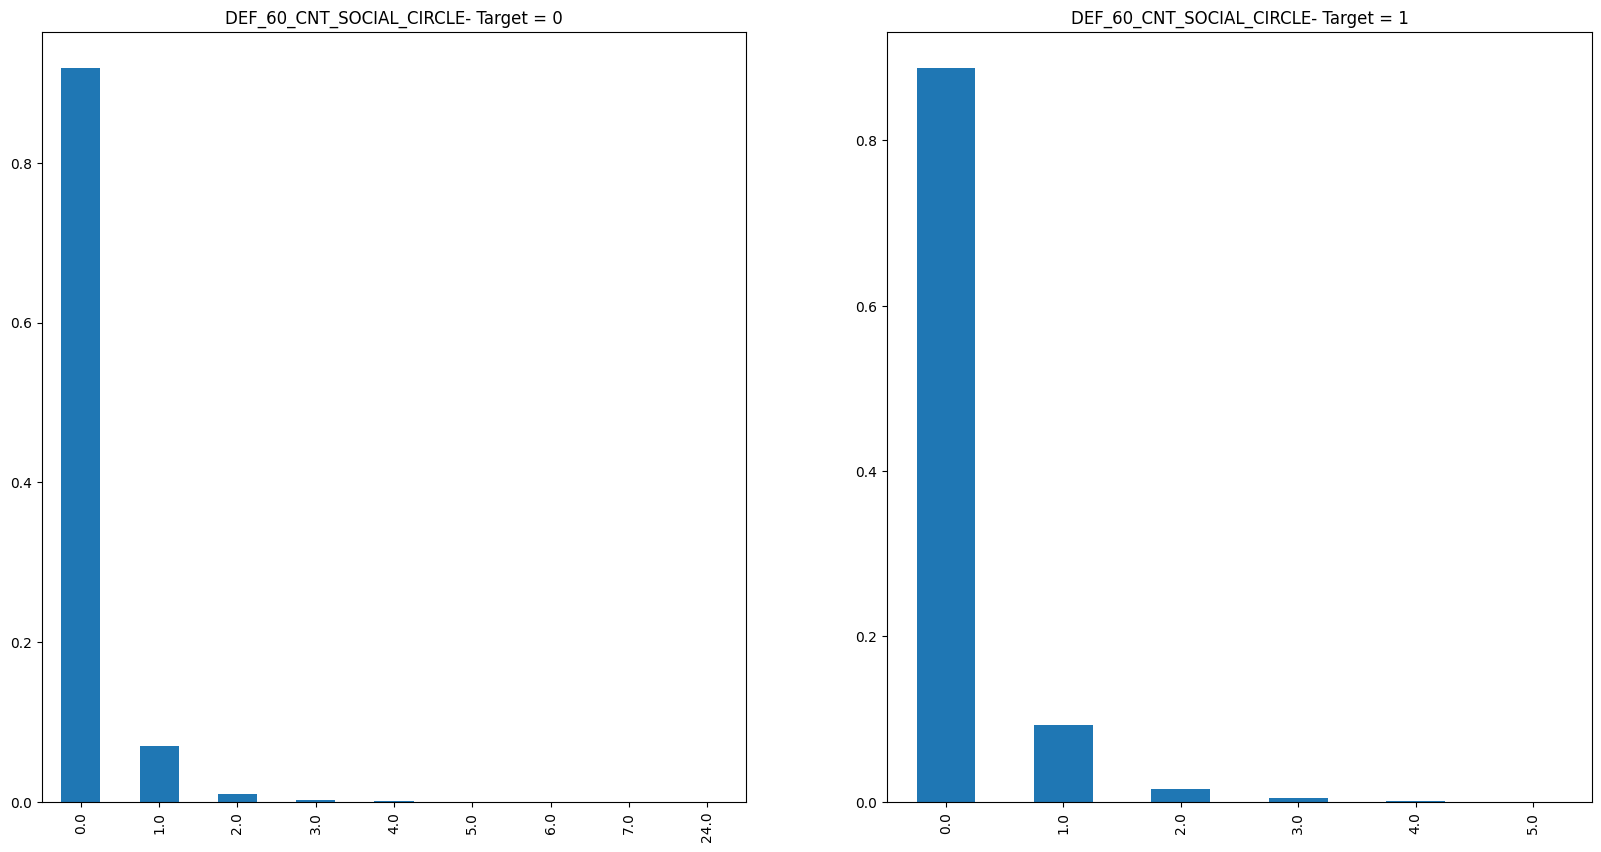

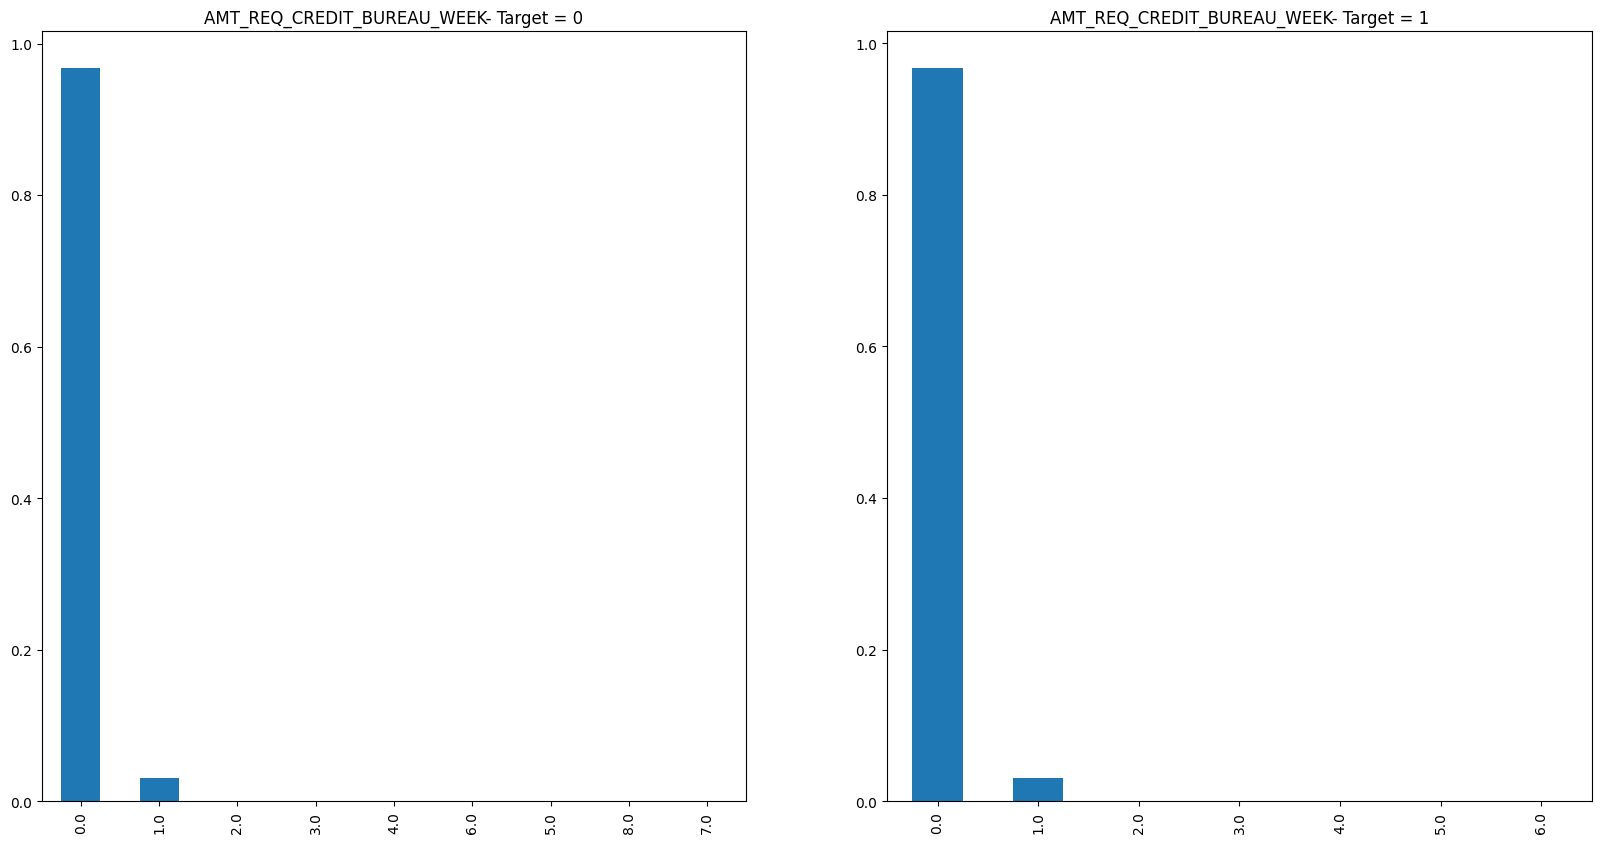

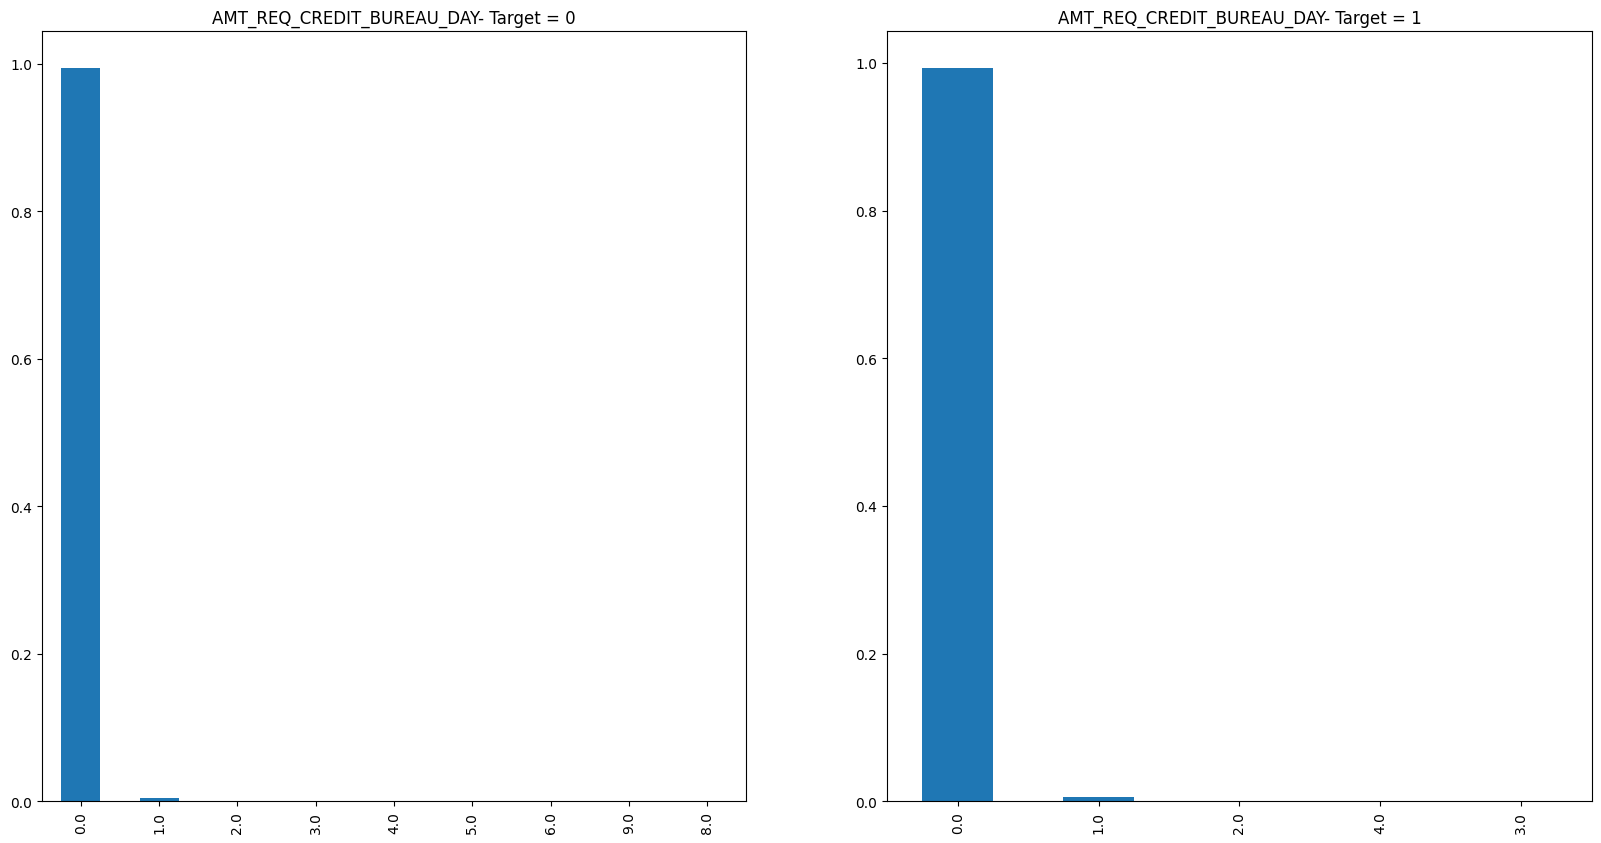

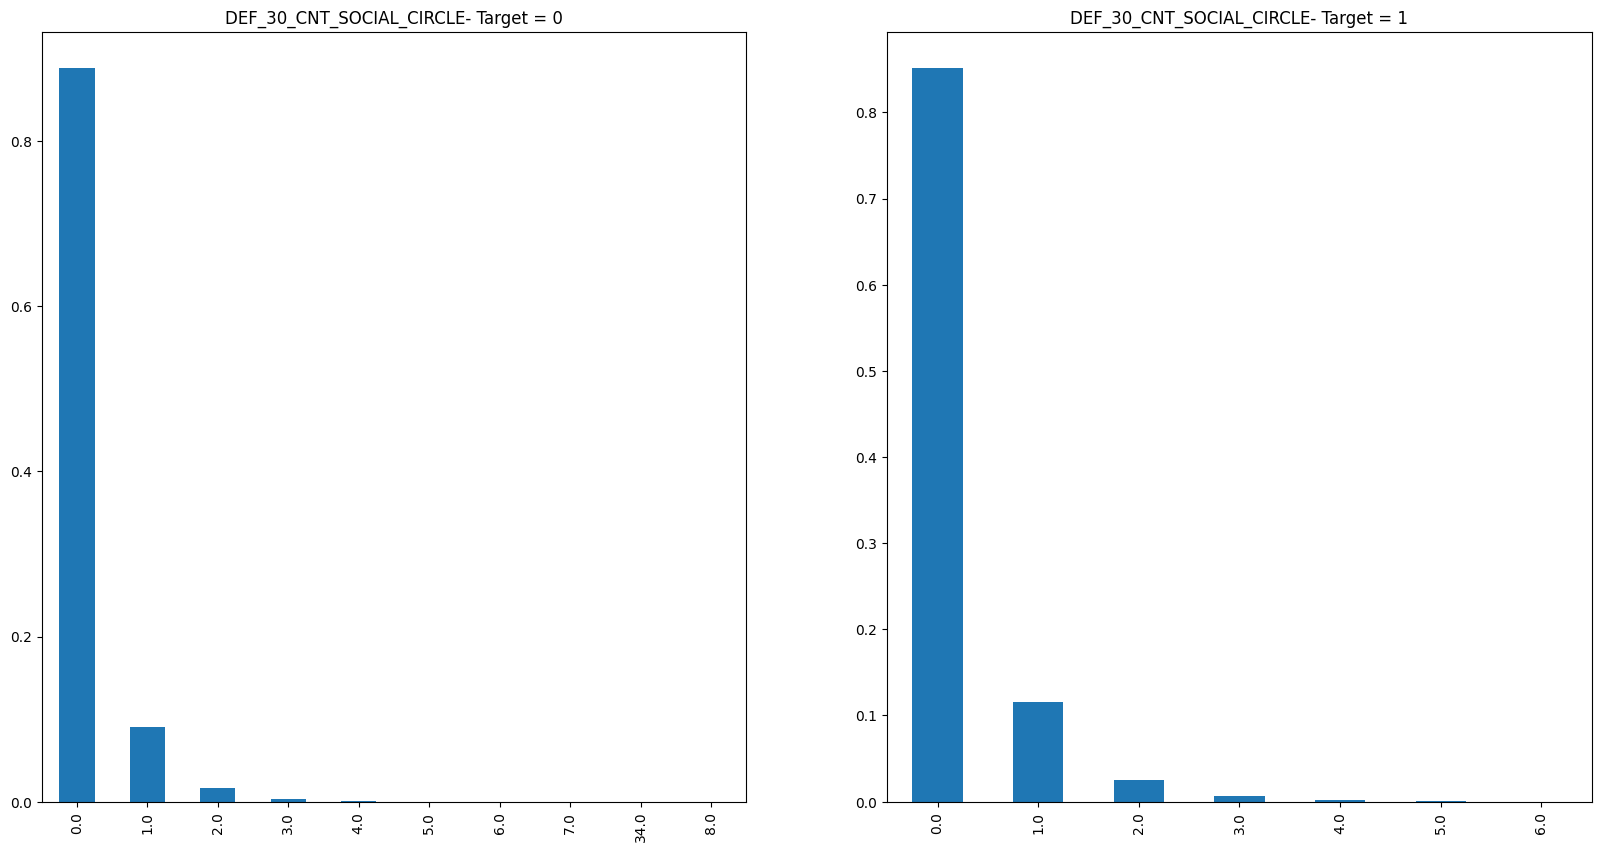

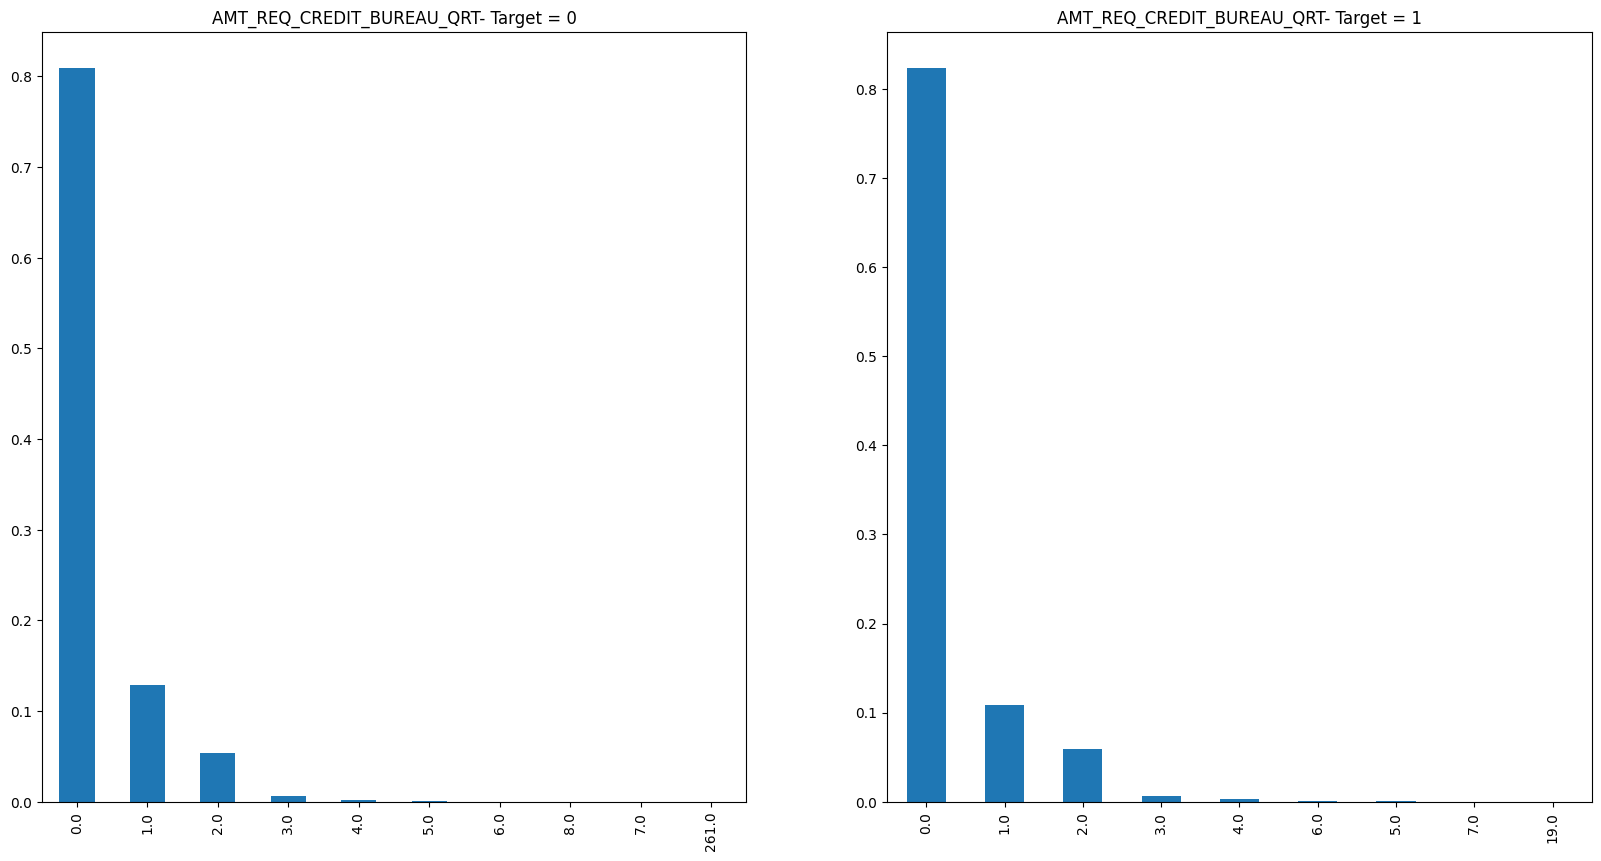

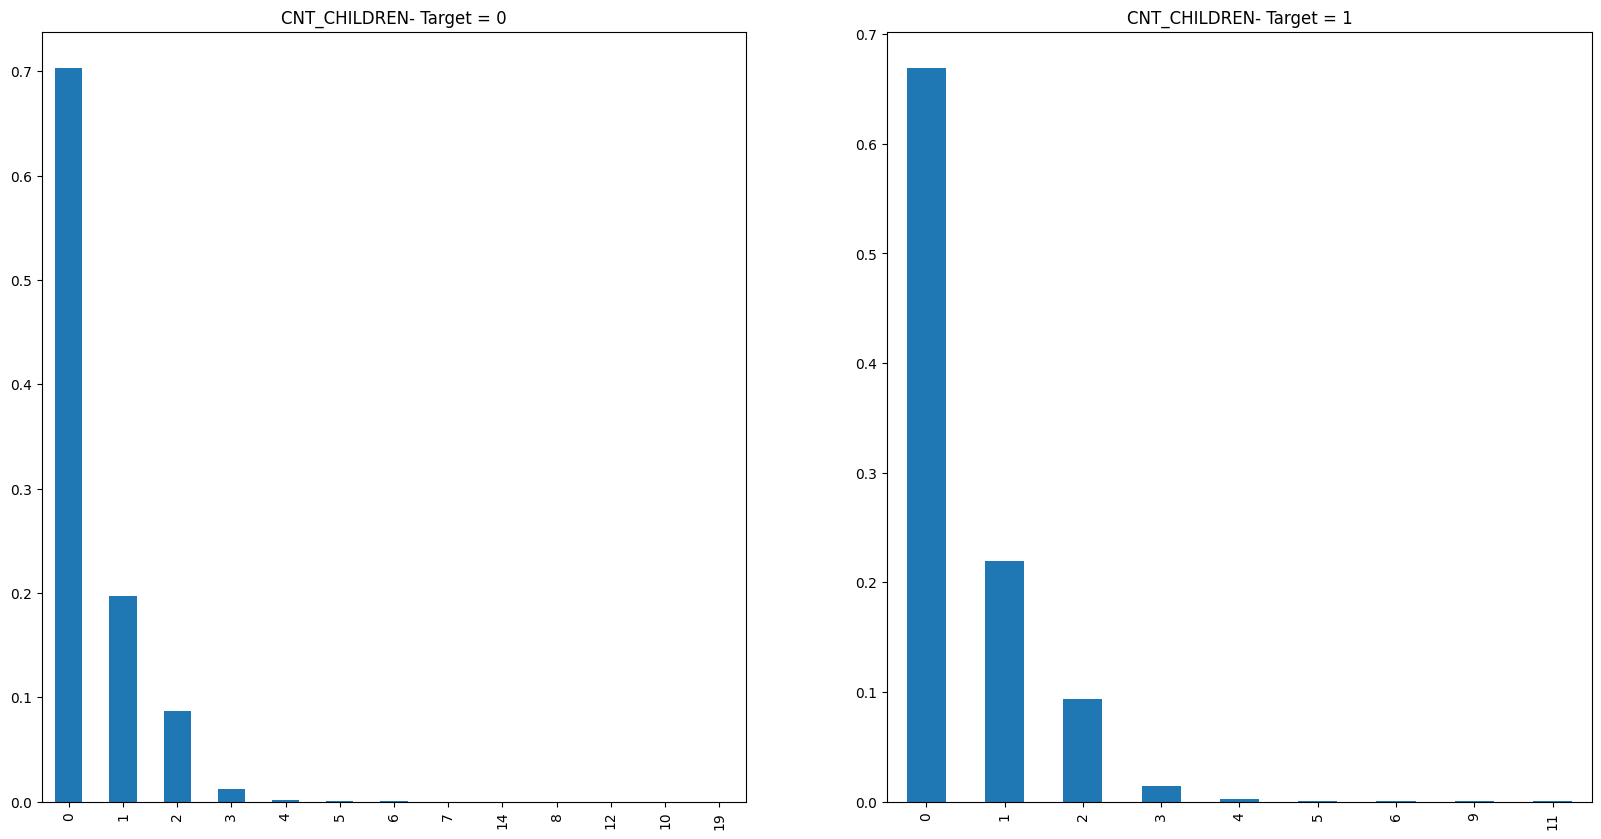

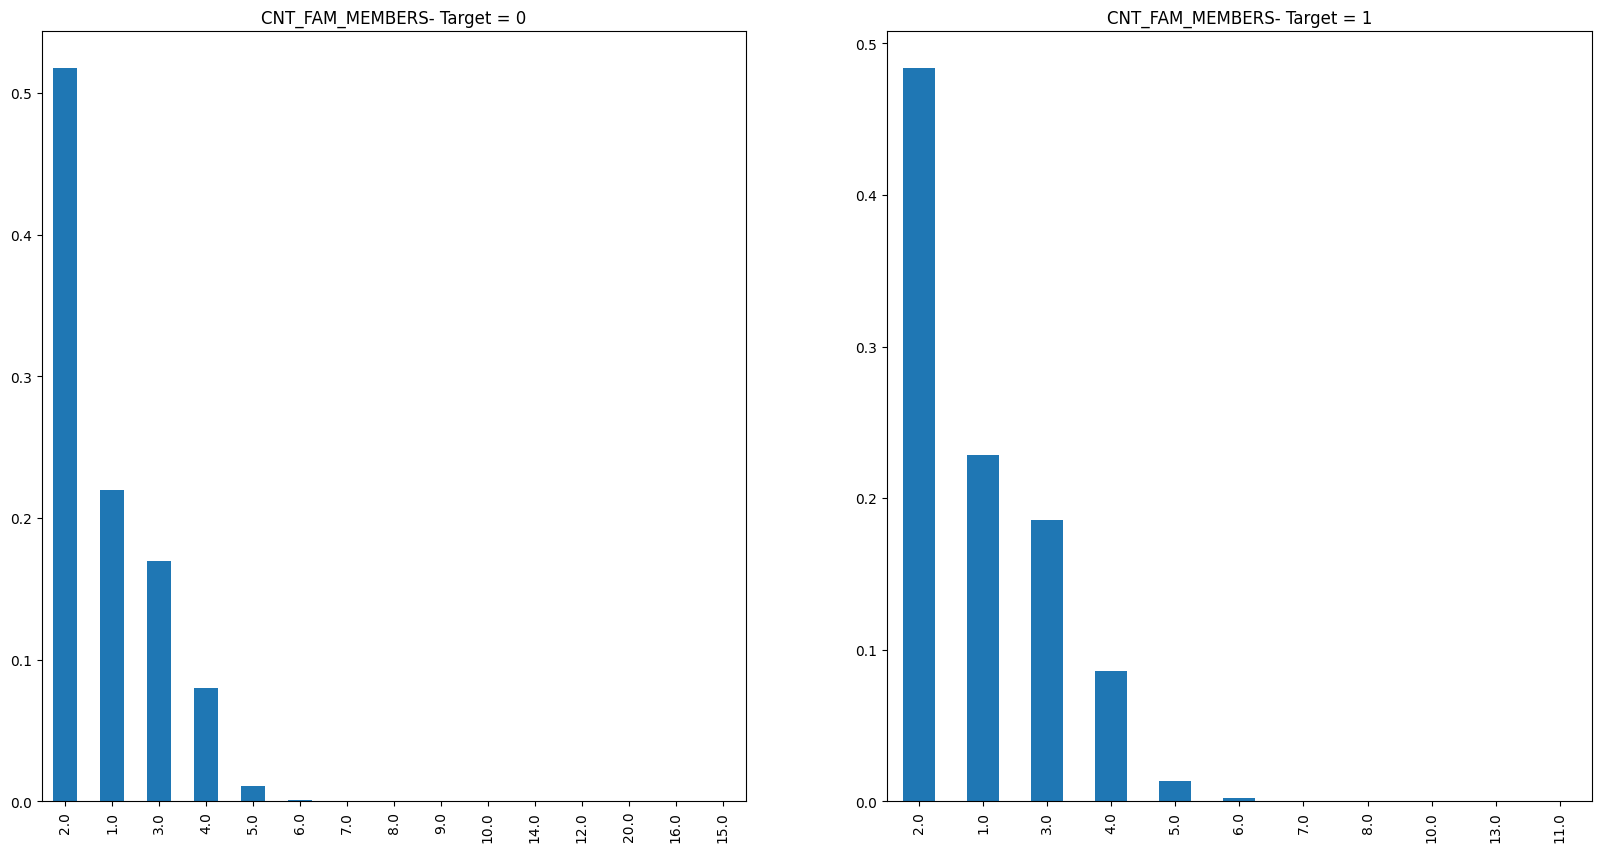

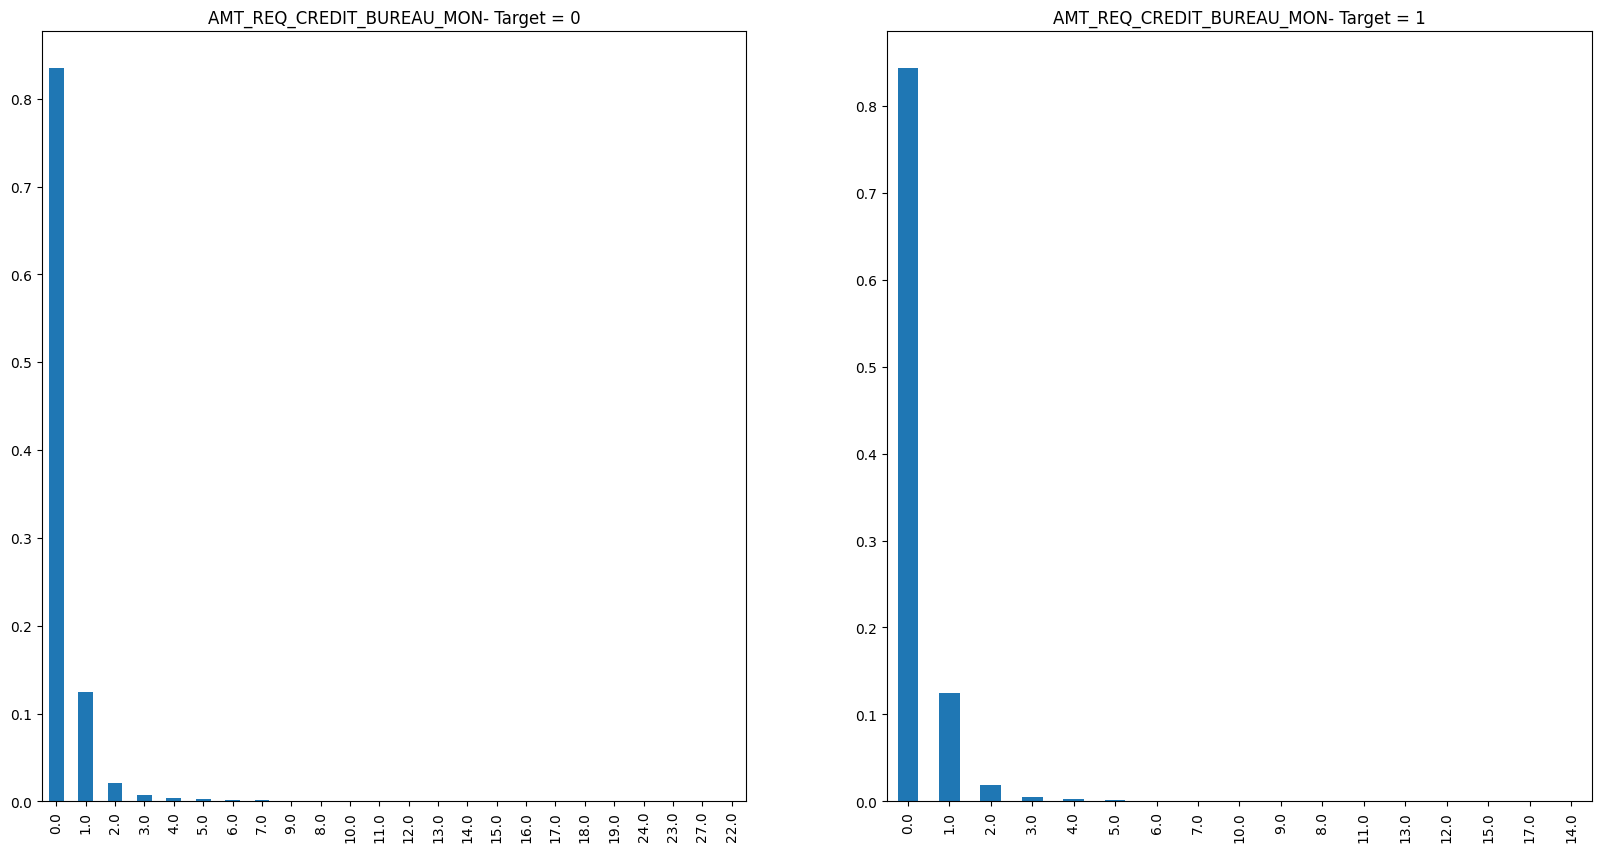

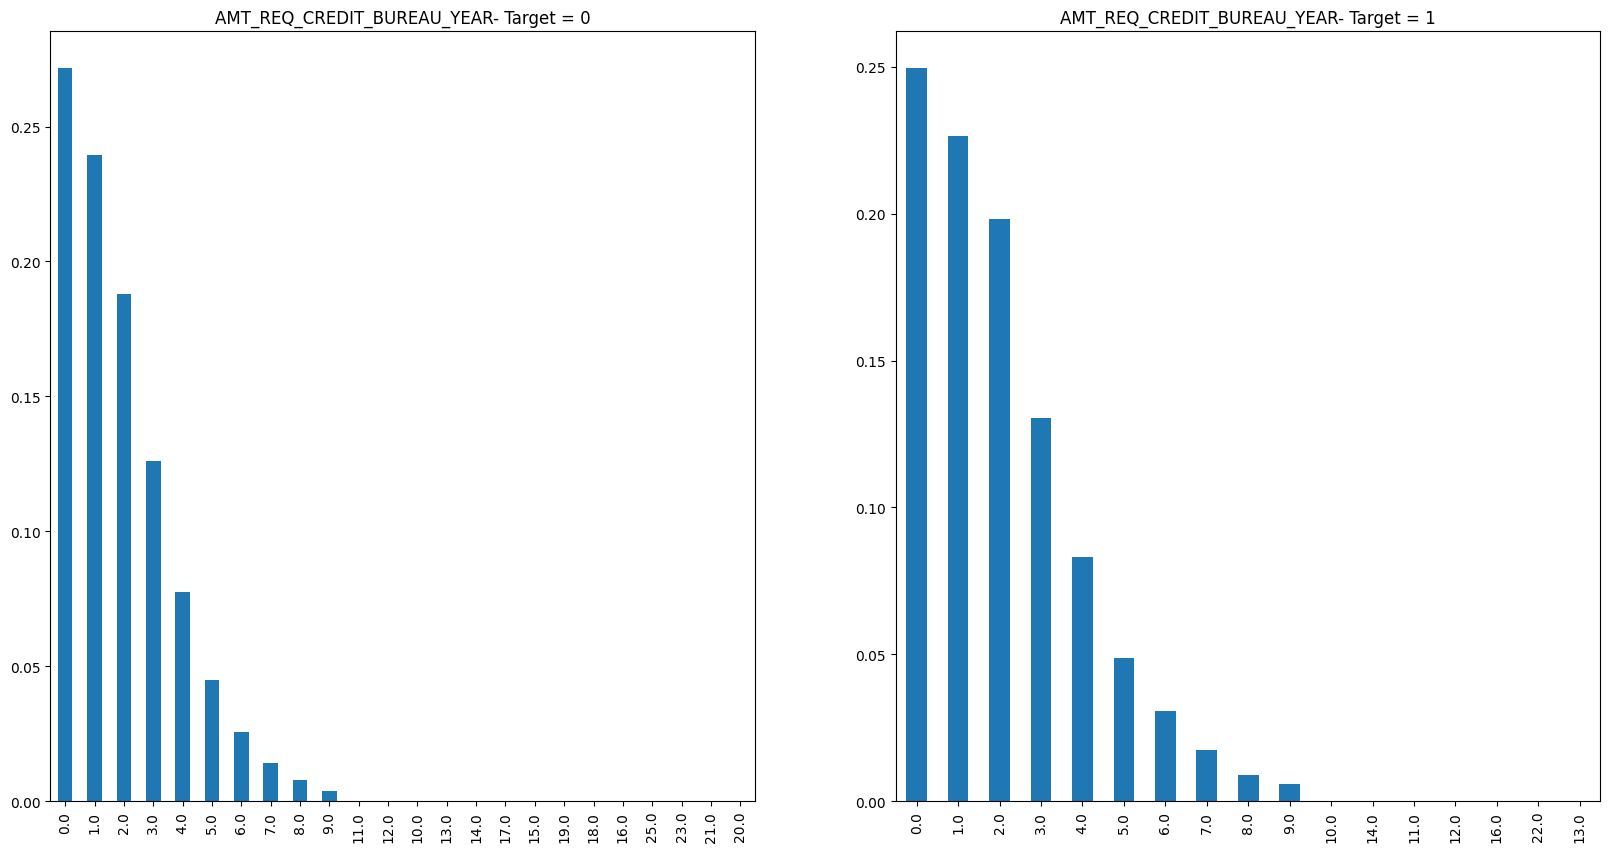

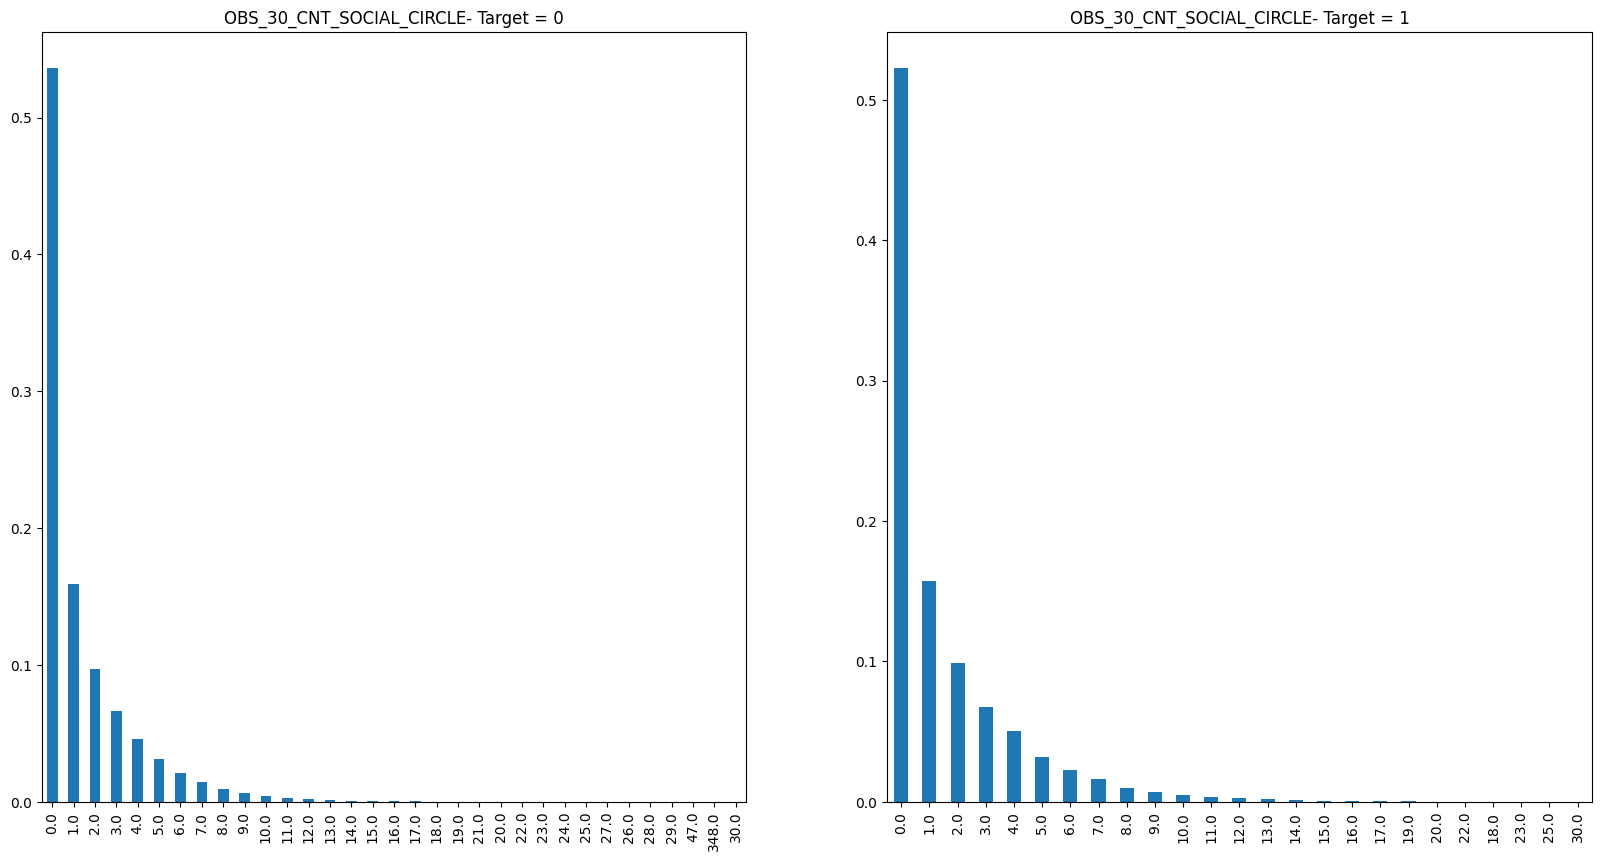

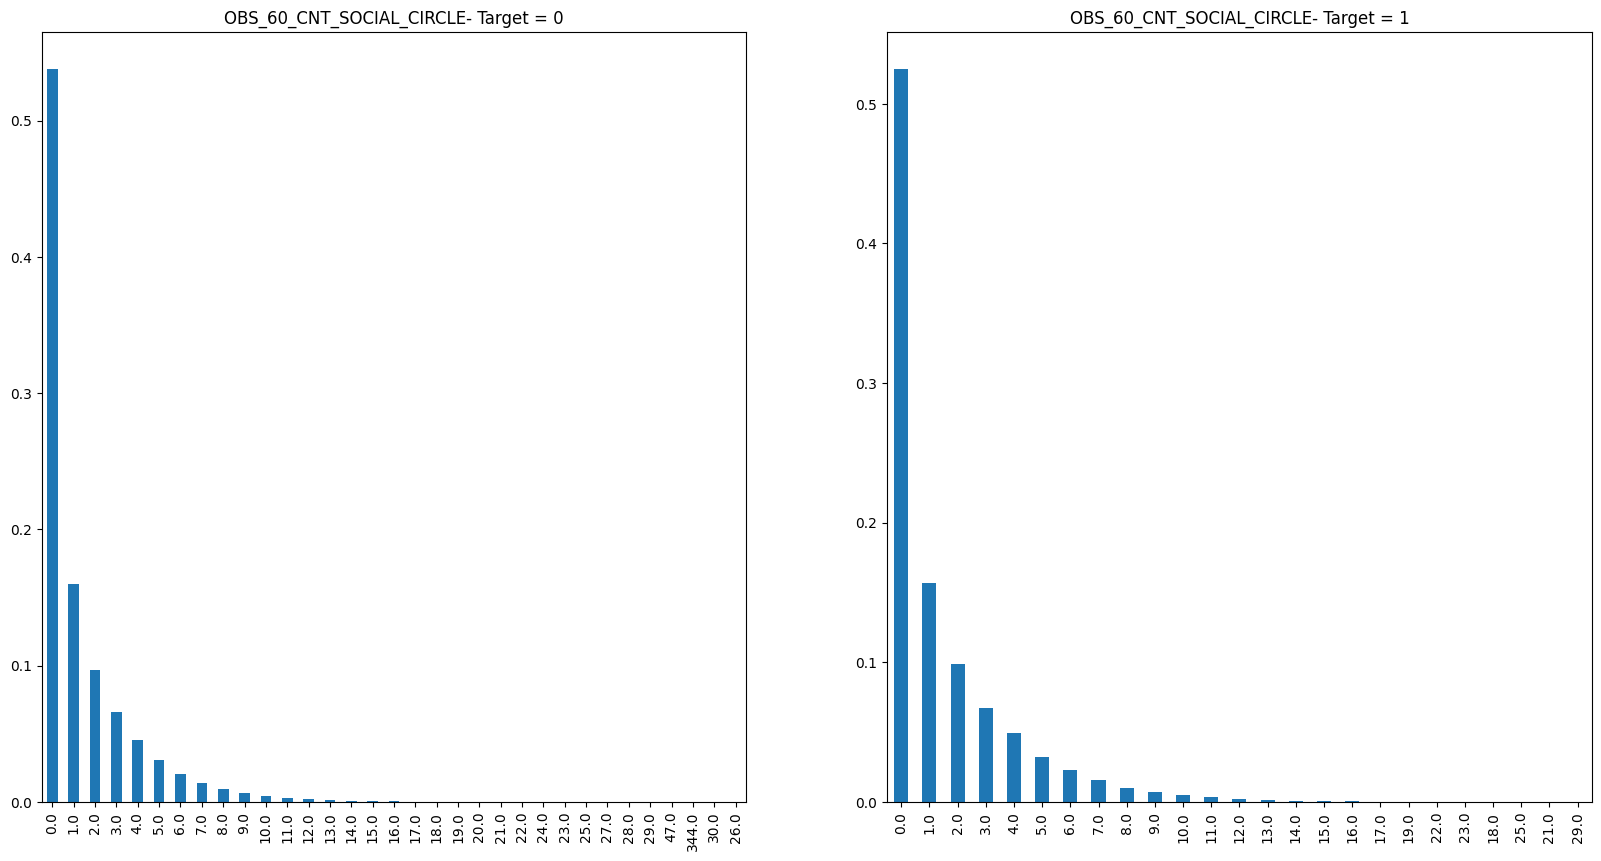

In [ ]:
#loop for performing univariate analysis
for i in categorical_columns:
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    target_0_df[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- Target = 0')
    plt.subplot(1,2,2)
    target_1_df[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- Target = 1')


#### The above chart shows the distribution of customers across categorical variable for both Target = 0 and Target = 1

#### Key interpretation from univariate analysis of Categorical variables
##### In this section, we will only highlight variables having significant difference for target = 0 and target = 1  

- **Code_Gender**: Defaulters (Target = 1) has a higher percentage of male customers in comparison to non-defaulters (Target = 0)
- **NAME_EDUCATION_TYPE**: Defaulters (Target = 1) has a higher percentage of customers with Secondary/Secondat Special education
- **Age_Group** : Defaulters (Target = 1) has a higher percentage of customers in the age group of 30s
- **NAME_INCOME_TYPE**: Defaulters (Target = 1) has a higher percentage of working customers whereas percentage of defaulting pensioners is lesser in comaprison to non-defaulters(Target = 0)
- **OCCUPATION_TYPE**: Laborers contritbute a higher percentage in defaulters(Target = 1) in comparison to non-defaulters(Target = 0)
- **REGION_RATING_CLIENT_W_CITY**: Customers with rating 3 constitutes a higher percentage of defaulters in comparison to non-defaulters
- **REGION_RATING_CLIENT**: Customers with rating 3 constitutes a higher percentage of defaulters in comparison to non-defaulters


##Correlation for numerical columns

#### In this analysis, we are trying to understand how numerical columns are correlated for entrie data set, data for target =0, and data for target =1

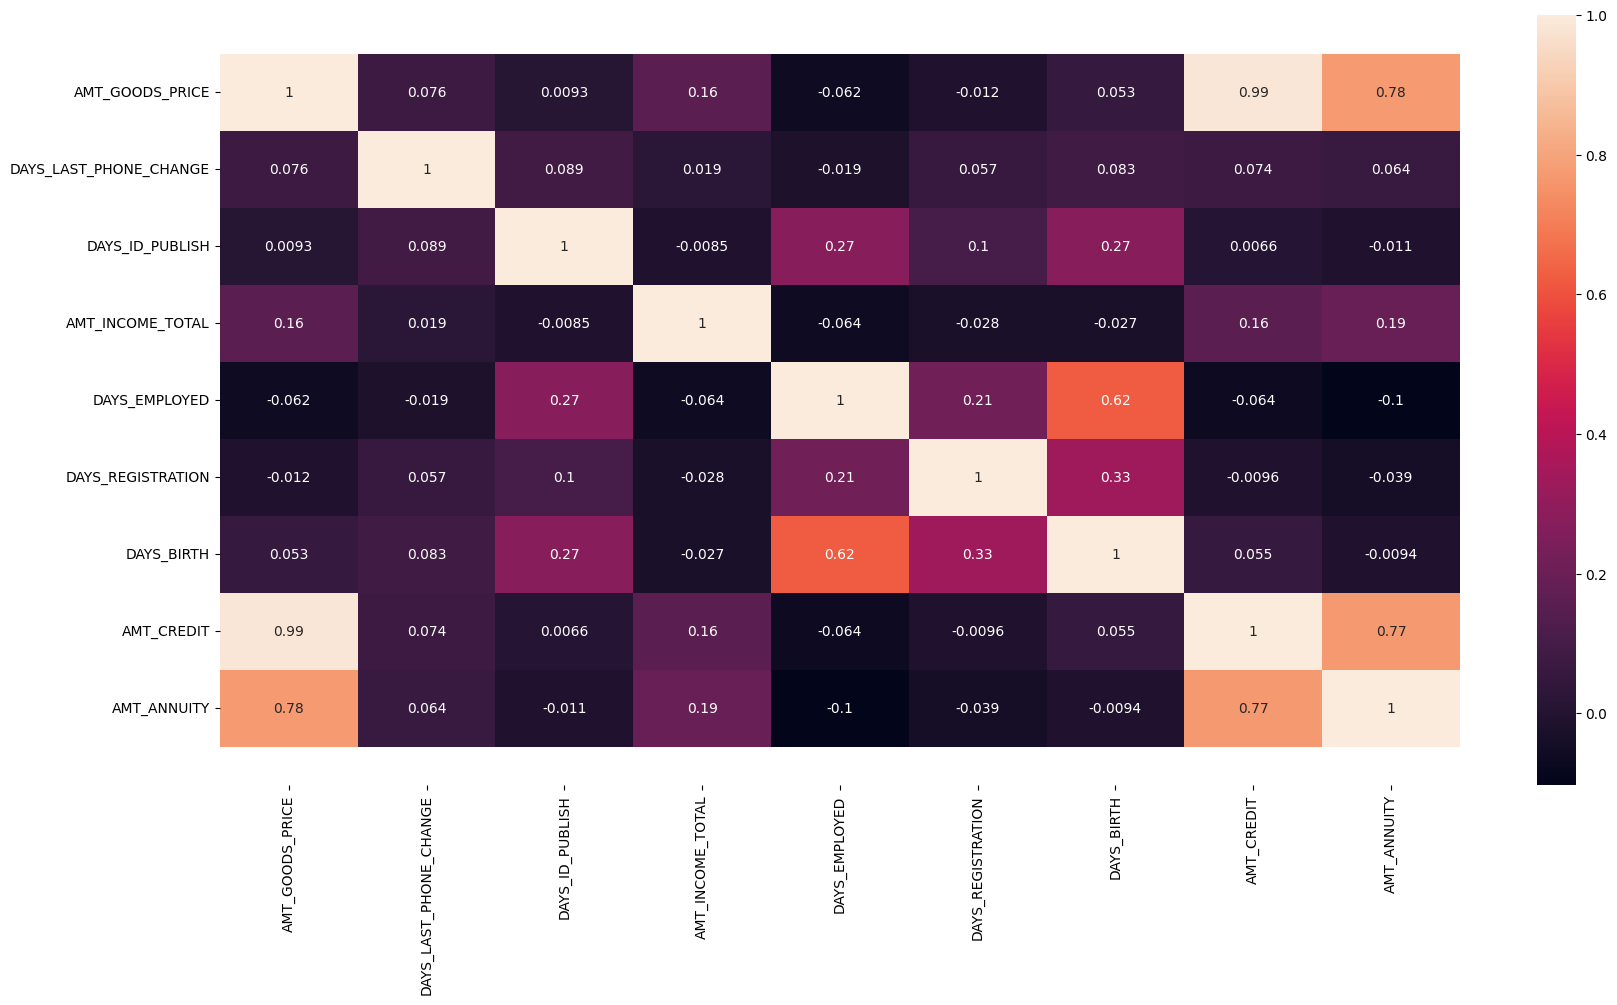

In [ ]:
# correlation analysis for the entire Target data
plt.figure(figsize=(20,10))
sns.heatmap(df_2[numerical_columns].corr(),annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

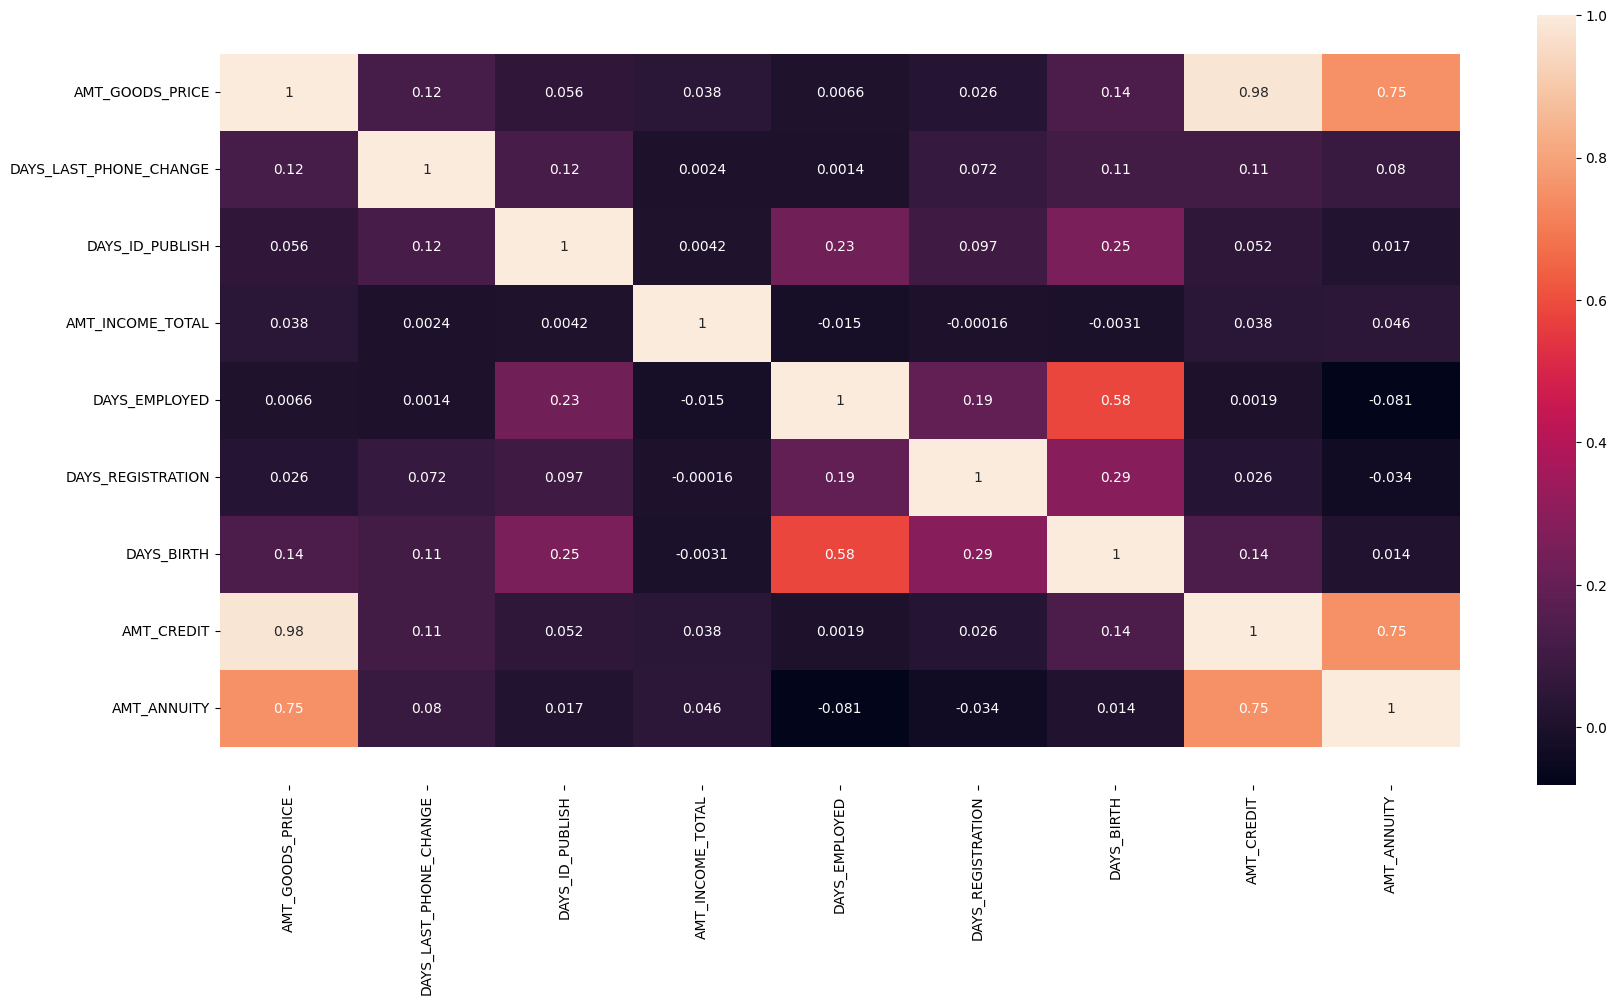

In [ ]:
#correlation analysis for target =1
plt.figure(figsize=(20,10))
sns.heatmap(target_1_df[numerical_columns].corr(),annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

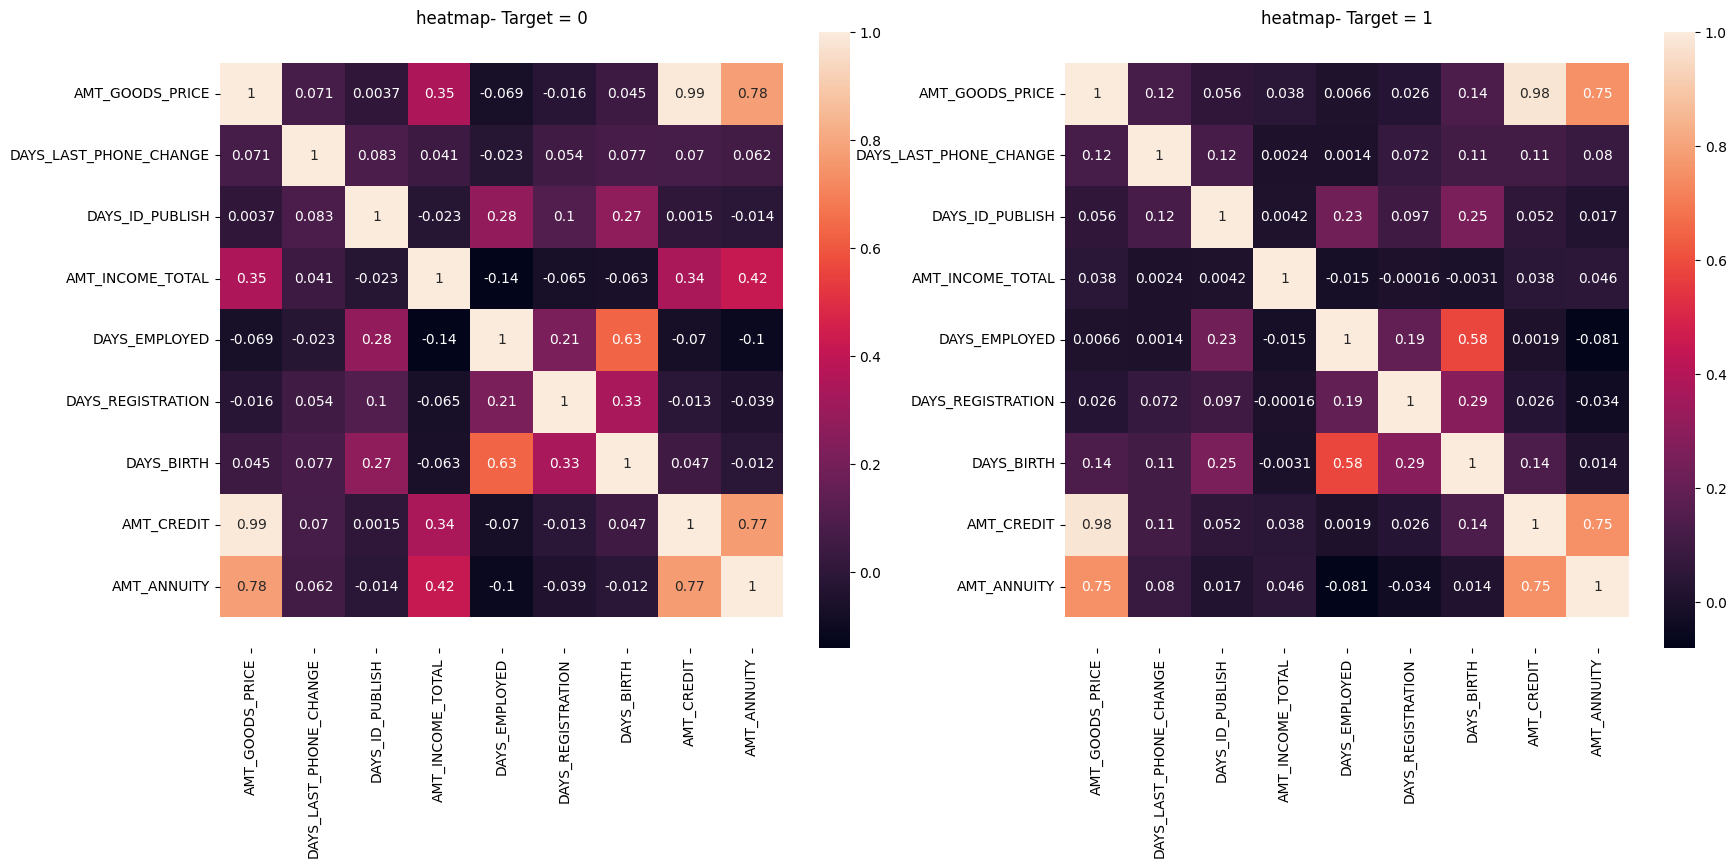

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.heatmap(target_0_df[numerical_columns].corr(),annot=True)
plt.title('heatmap- Target = 0')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.subplot(1,2,2)
sns.heatmap(target_1_df[numerical_columns].corr(),annot=True,)
plt.title('heatmap- Target = 1')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

#### Through the heatmap we can see same set of columns seem to have a high correlation across all three data sets. Top correlate colums are:
- AMT_GOOD_PRICE vs AMT_CREDIT
- AMT_GOOD_PRICE vs AMT_ANNUITY
- AMT_CREDIT_AMT_ANNUITY

###  Checking if Variables with highest coeffecient are same in both file

#### This analysis is conducted to understand if top 10 high correlation variables are common across for both data - target =0 and target =1

In [ ]:
# Correlation for numberical columns for Target = 0
corr = target_0_df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)

<ipython-input-100-bdc8267a60bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = target_0_df.corr()
<ipython-input-100-bdc8267a60bb>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


VAR1                      VAR2  Correlation  \
414     OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         1.00   
154              AMT_GOODS_PRICE                AMT_CREDIT         0.99   
337  REGION_RATING_CLIENT_W_CITY      REGION_RATING_CLIENT         0.95   
277              CNT_FAM_MEMBERS              CNT_CHILDREN         0.88   
440     DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE         0.86   
155              AMT_GOODS_PRICE               AMT_ANNUITY         0.78   
129                  AMT_ANNUITY                AMT_CREDIT         0.77   
207                DAYS_EMPLOYED                DAYS_BIRTH         0.63   
128                  AMT_ANNUITY          AMT_INCOME_TOTAL         0.42   
153              AMT_GOODS_PRICE          AMT_INCOME_TOTAL         0.35   

     Correlation_abs  
414             1.00  
154             0.99  
337             0.95  
277             0.88  
440             0.86  
155             0.78  
129             0.77  
207             0.63  
128             0.42  
153             0.35

In [ ]:
# Correlation for numberical columns for Target = 1
corr = target_1_df.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)

<ipython-input-101-efcffc23b815>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = target_1_df.corr()
<ipython-input-101-efcffc23b815>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


VAR1                      VAR2  Correlation  \
414     OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         1.00   
154              AMT_GOODS_PRICE                AMT_CREDIT         0.98   
337  REGION_RATING_CLIENT_W_CITY      REGION_RATING_CLIENT         0.96   
277              CNT_FAM_MEMBERS              CNT_CHILDREN         0.89   
440     DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE         0.87   
129                  AMT_ANNUITY                AMT_CREDIT         0.75   
155              AMT_GOODS_PRICE               AMT_ANNUITY         0.75   
207                DAYS_EMPLOYED                DAYS_BIRTH         0.58   
415     OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE         0.34   
389     DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         0.33   

     Correlation_abs  
414             1.00  
154             0.98  
337             0.96  
277             0.89  
440             0.87  
129             0.75  
155             0.75  
207             0.58  
415             0.34  
389             0.33

#### 8 out of top 10 pair of high correlated variables are same for both 0 and 1

###  Univariate Analysis for Numerical Values

#### The objective of this analysis is to understand how numerical variables vary between target 0 and 1

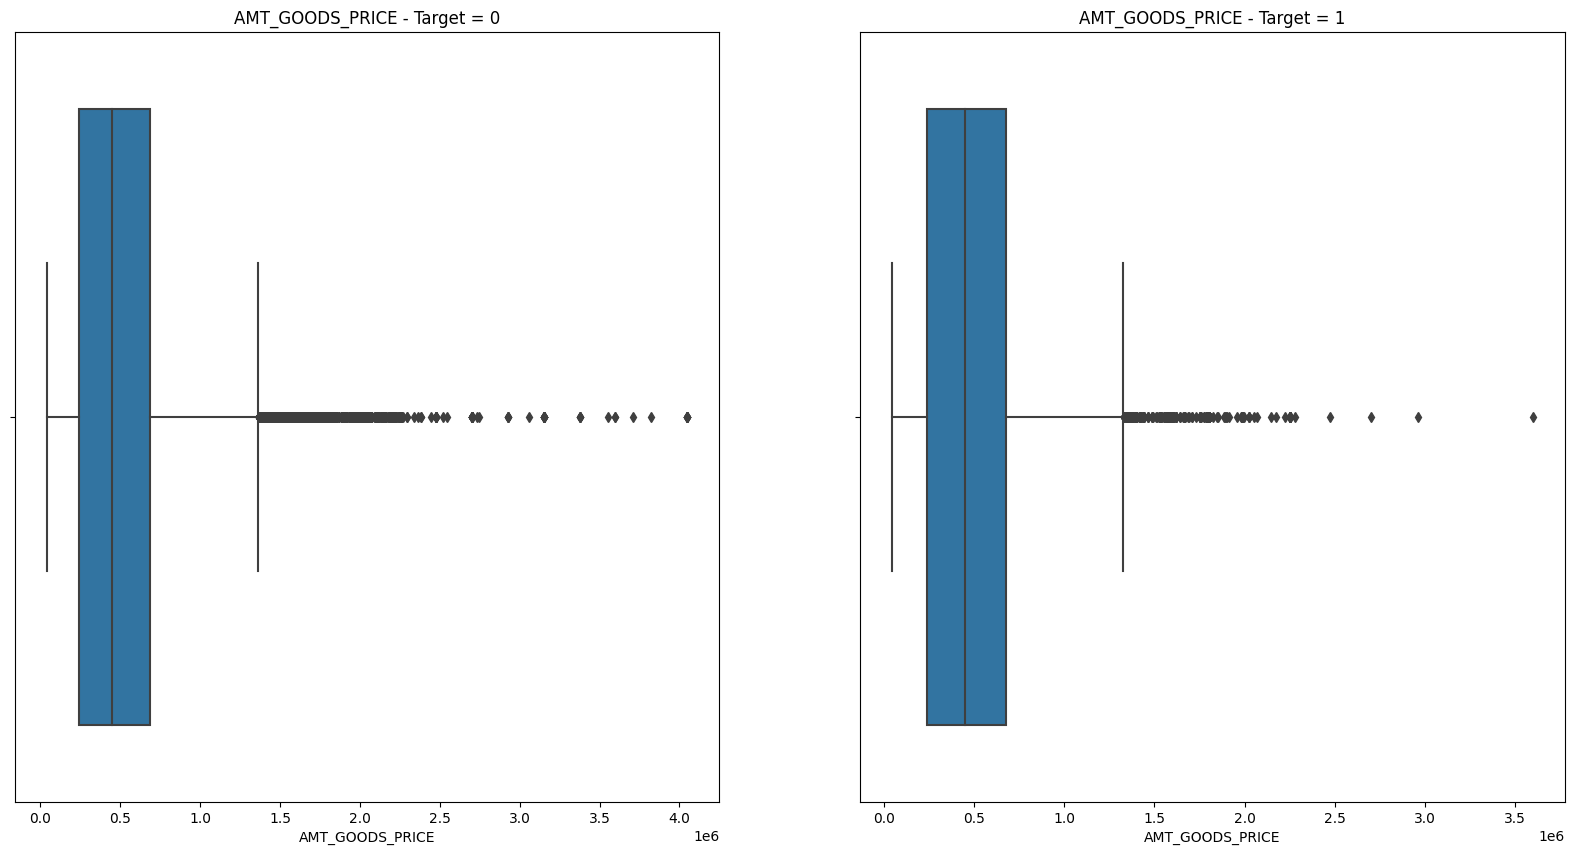

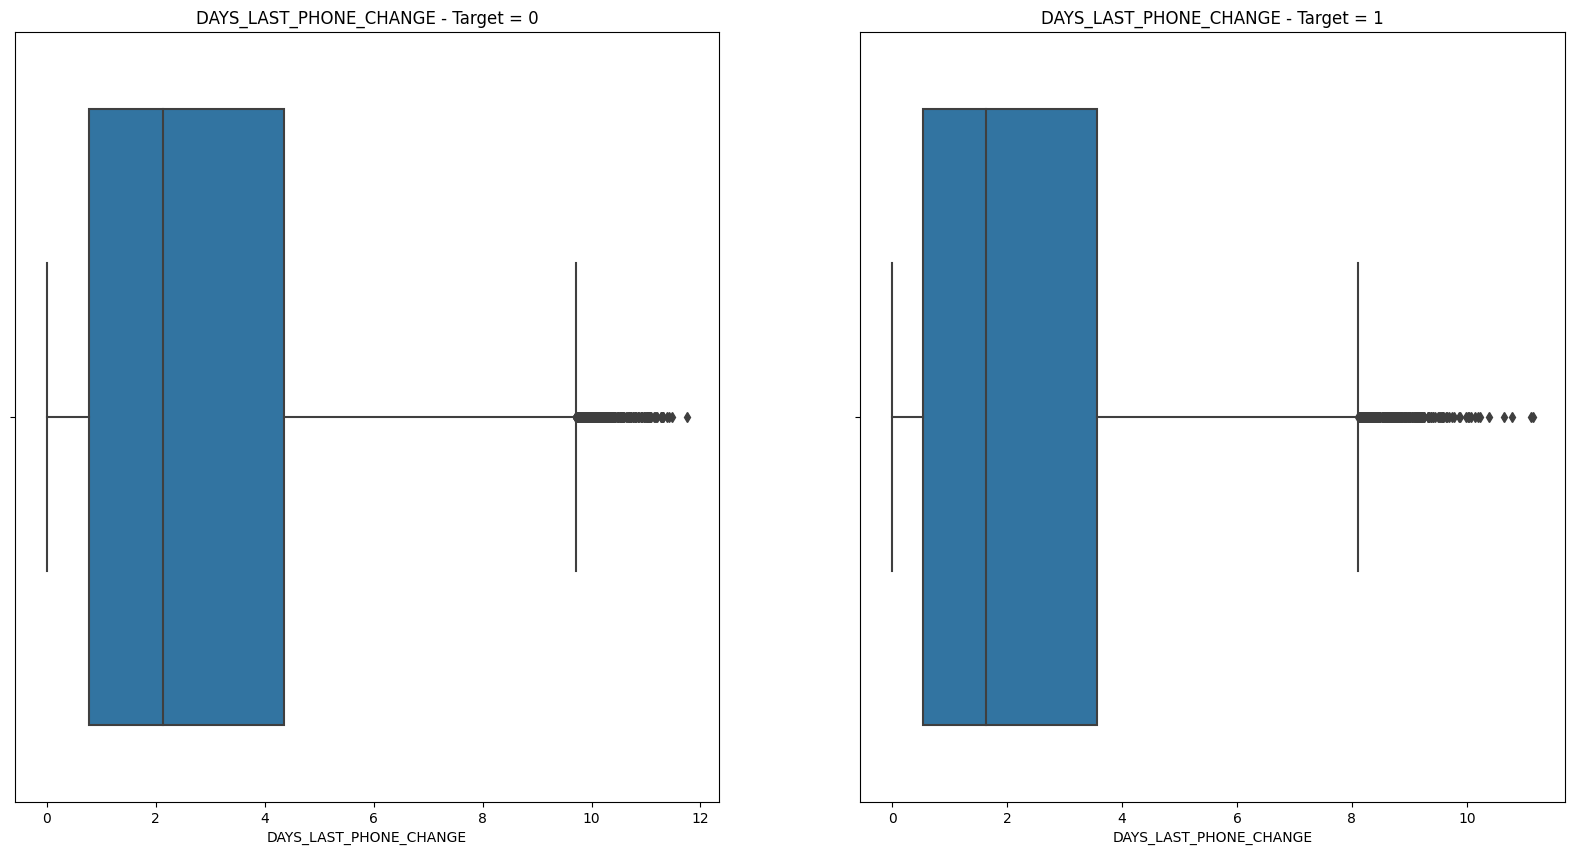

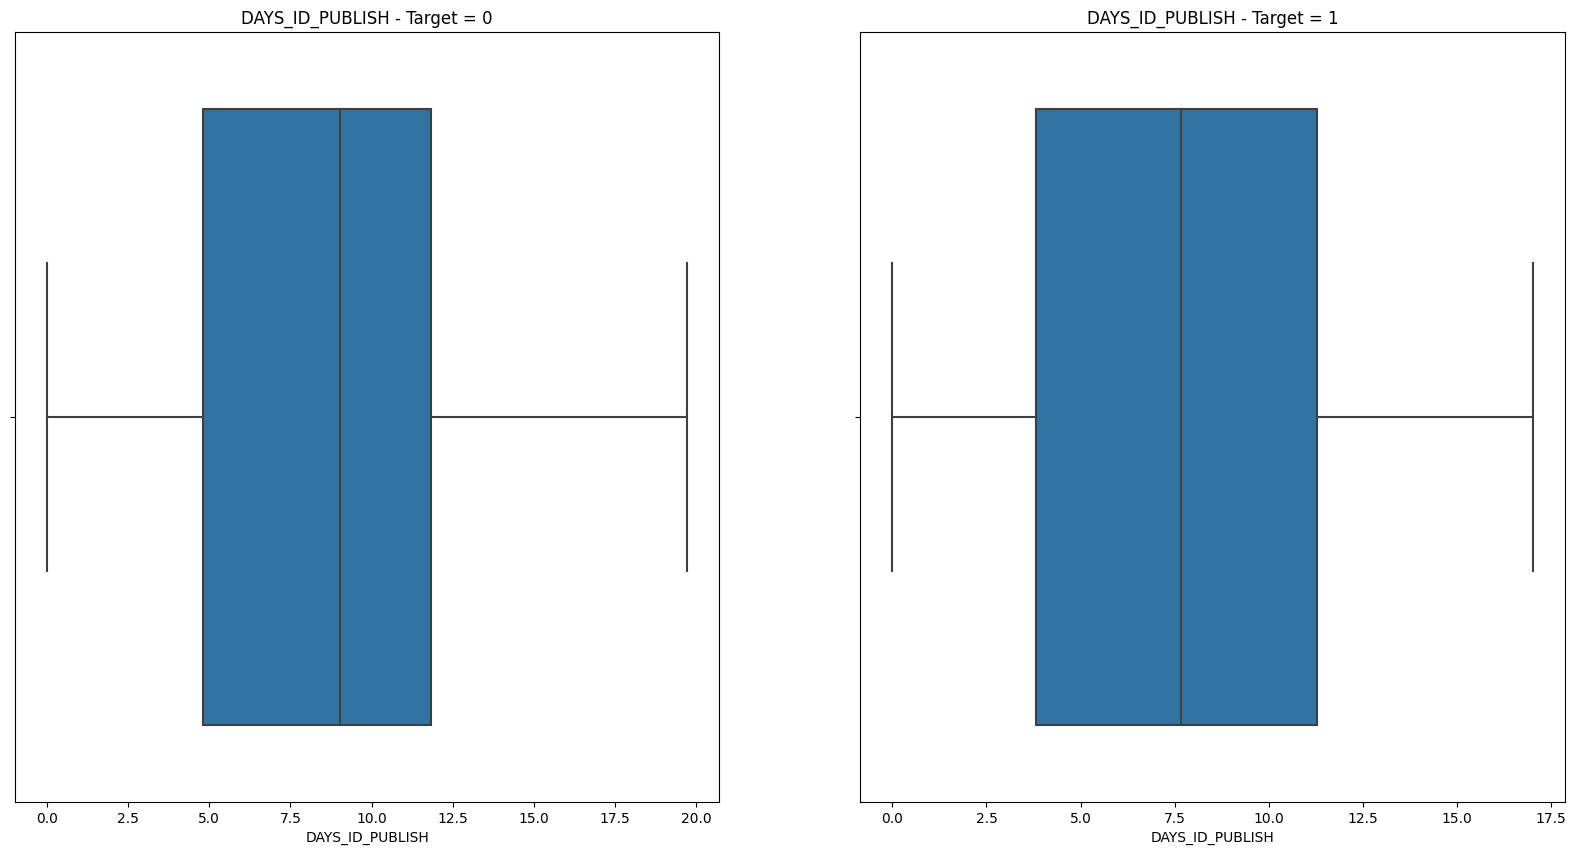

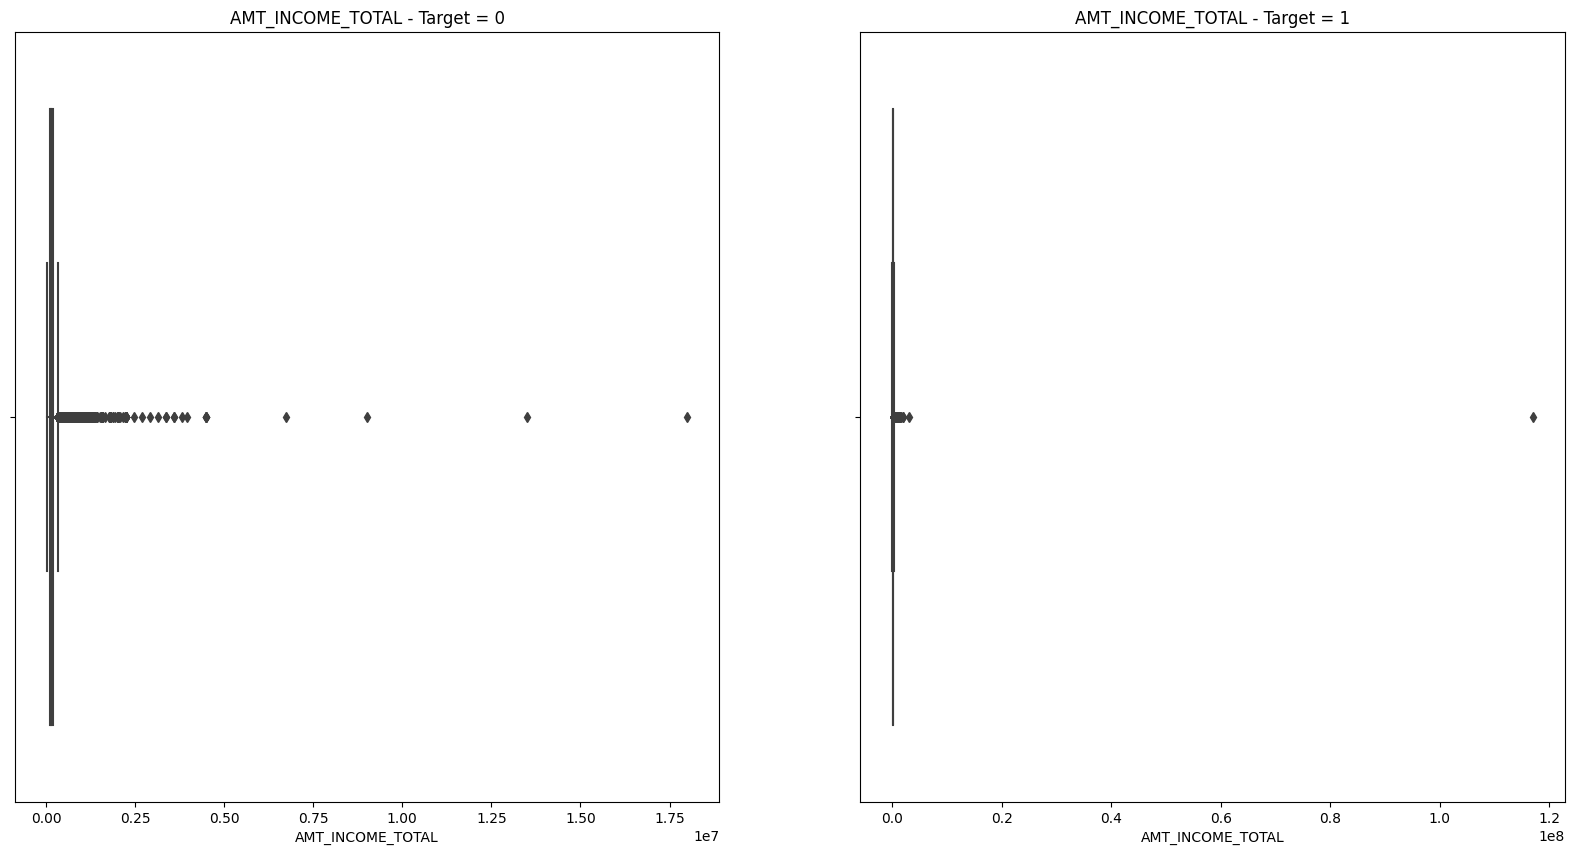

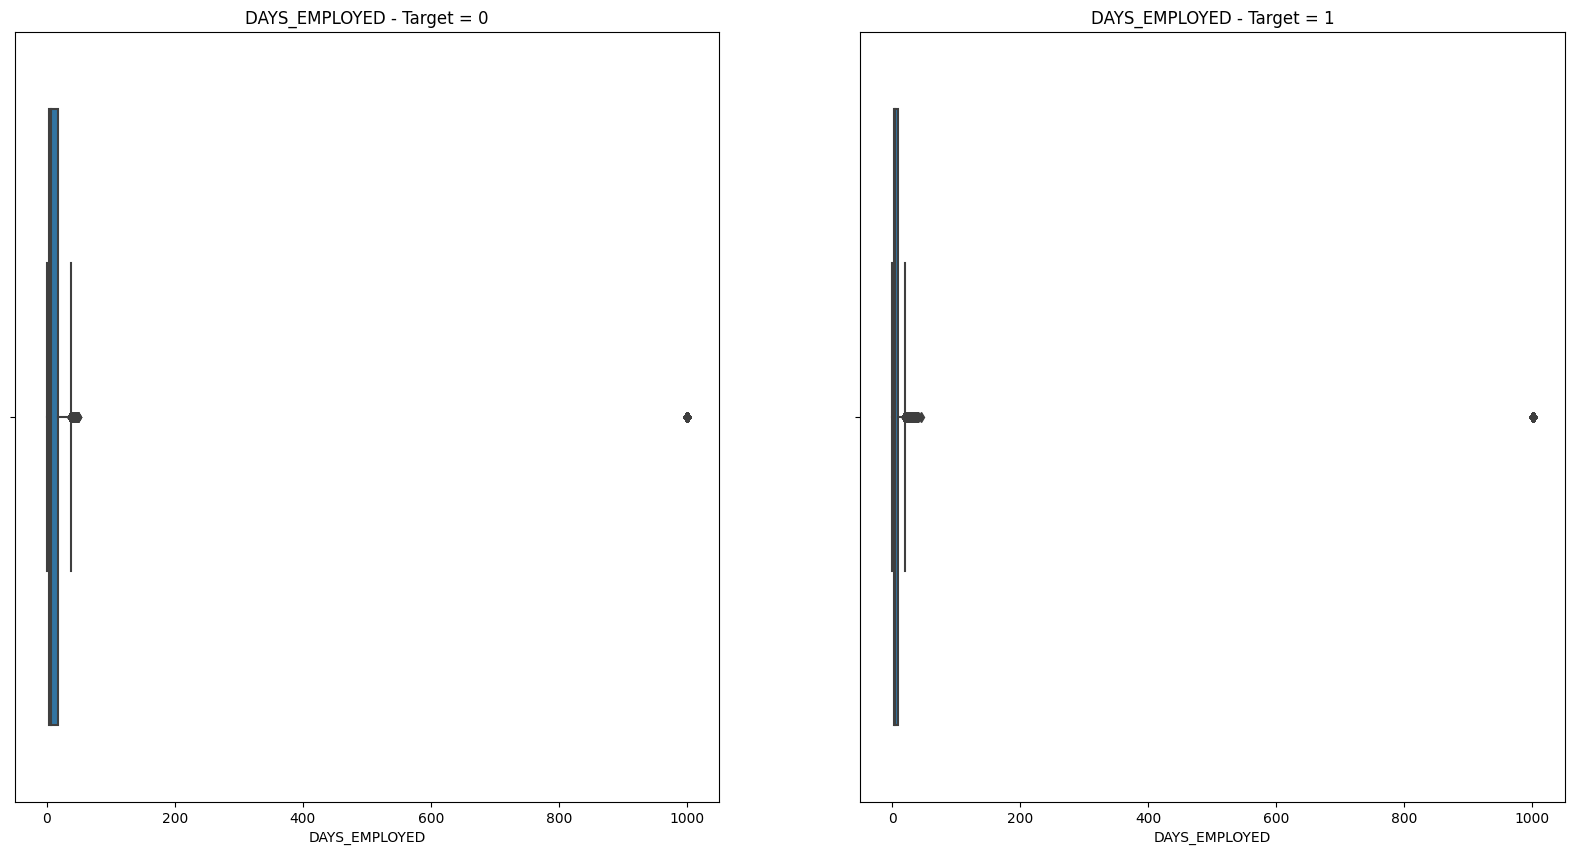

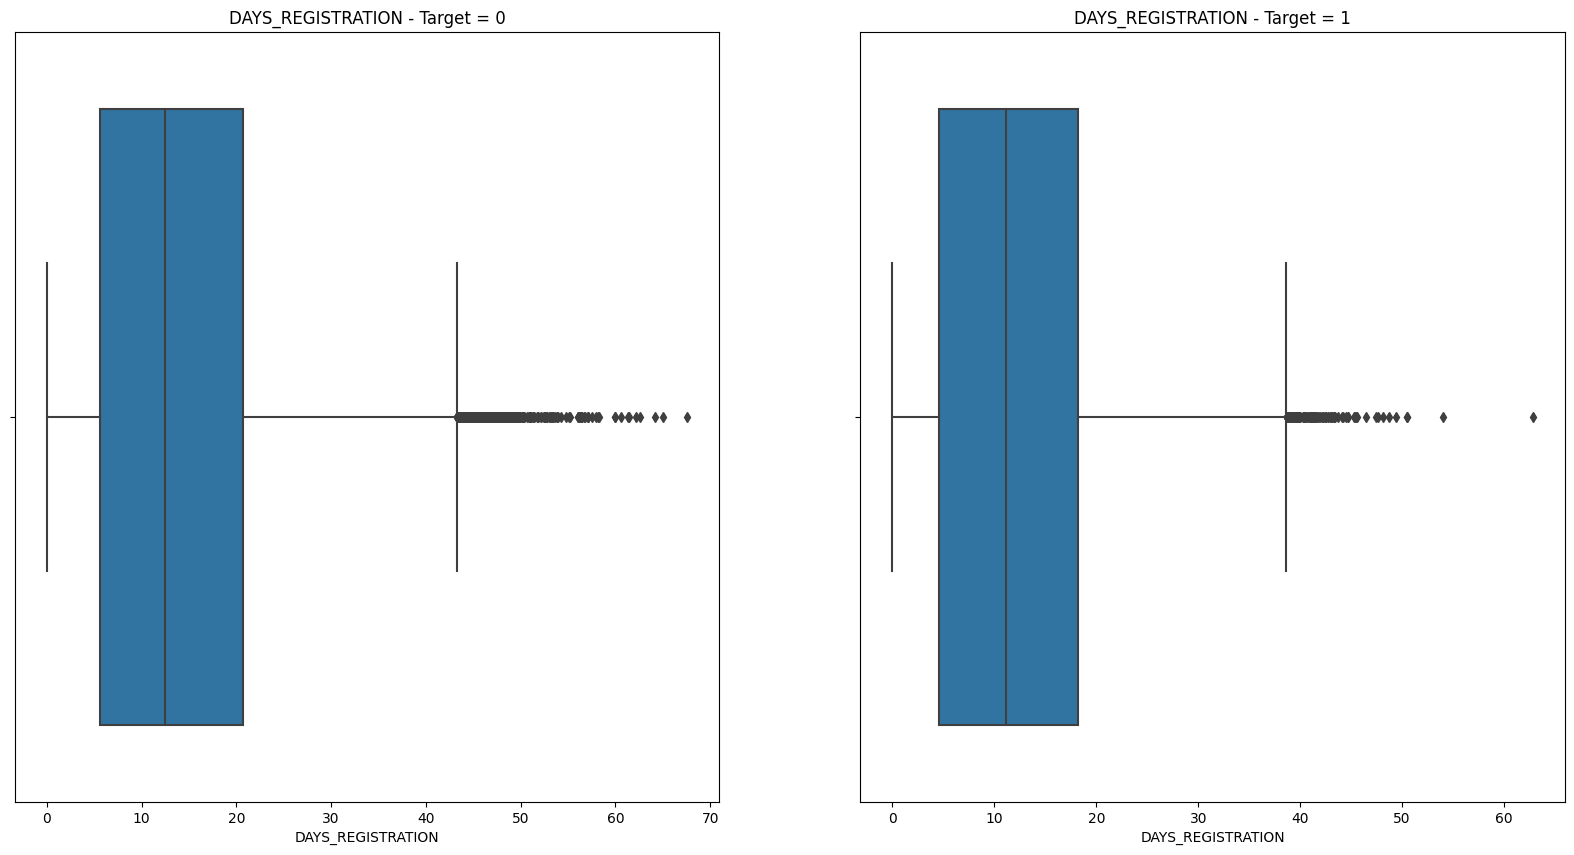

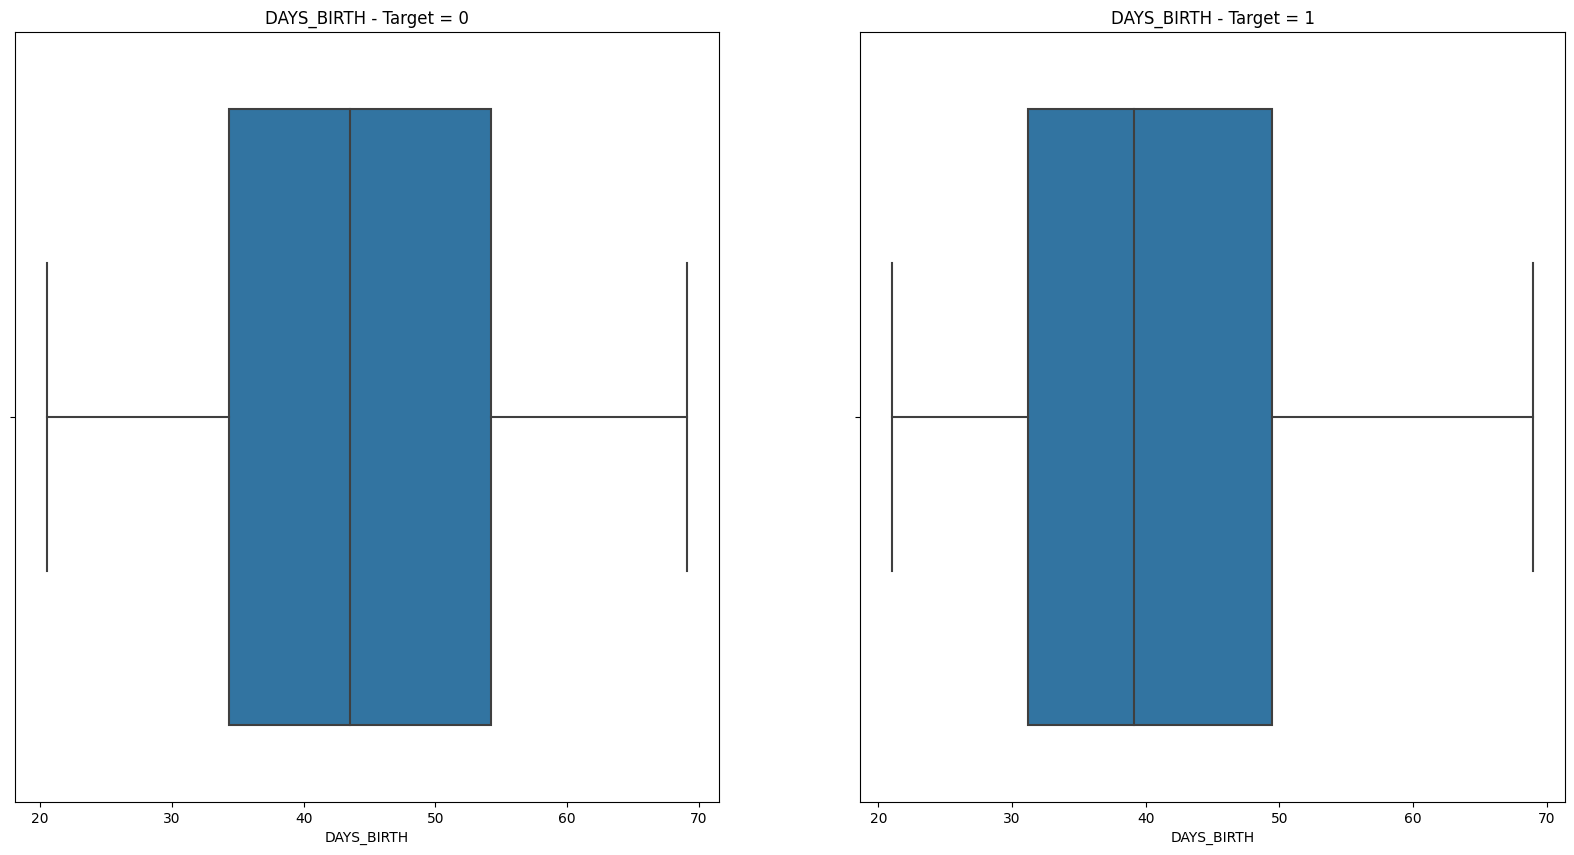

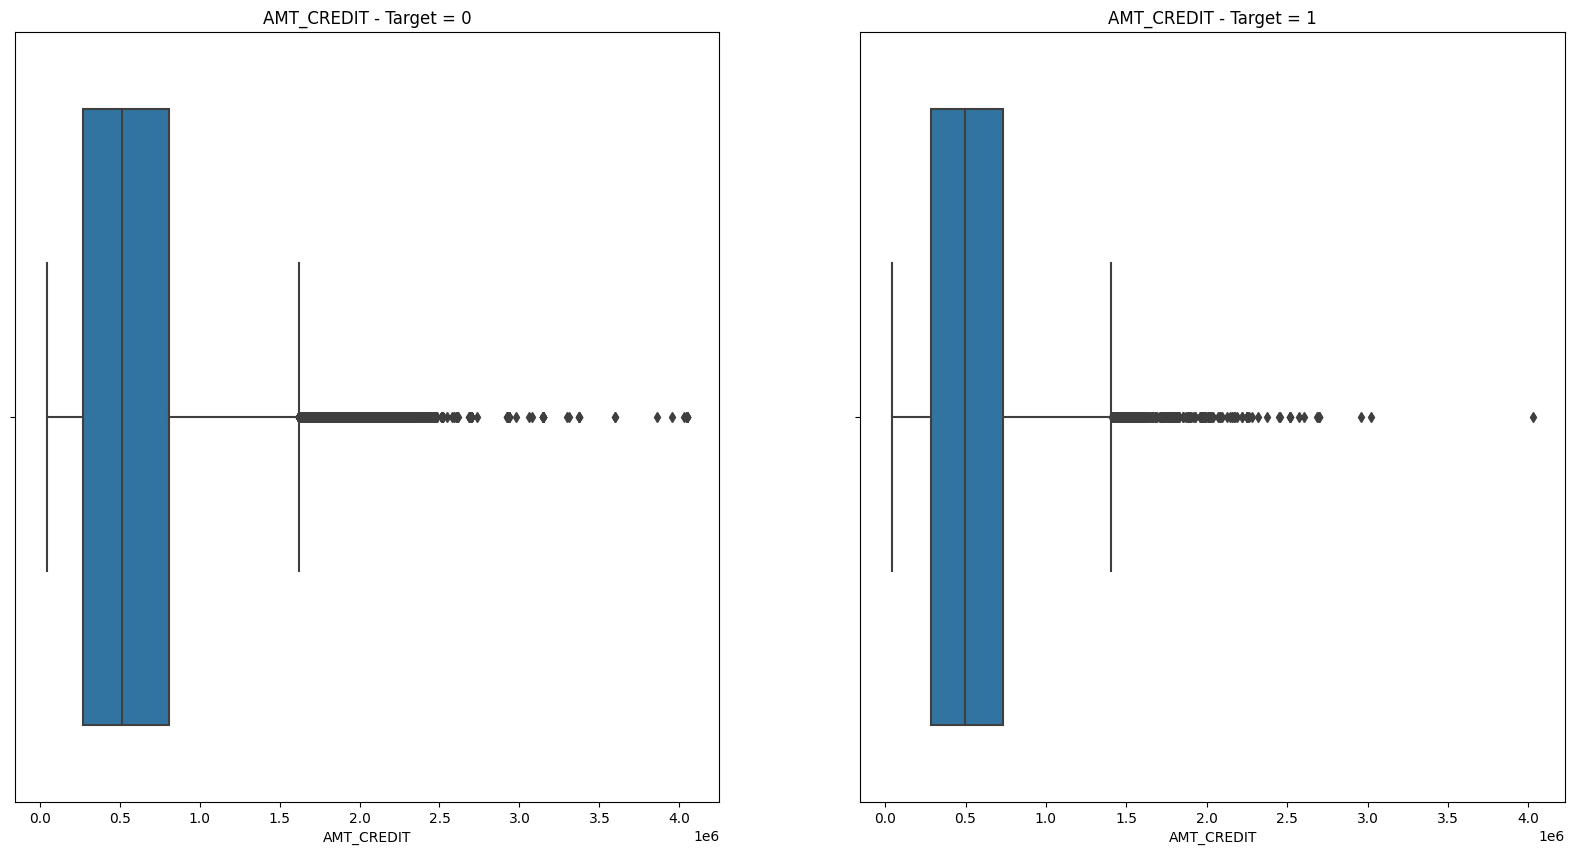

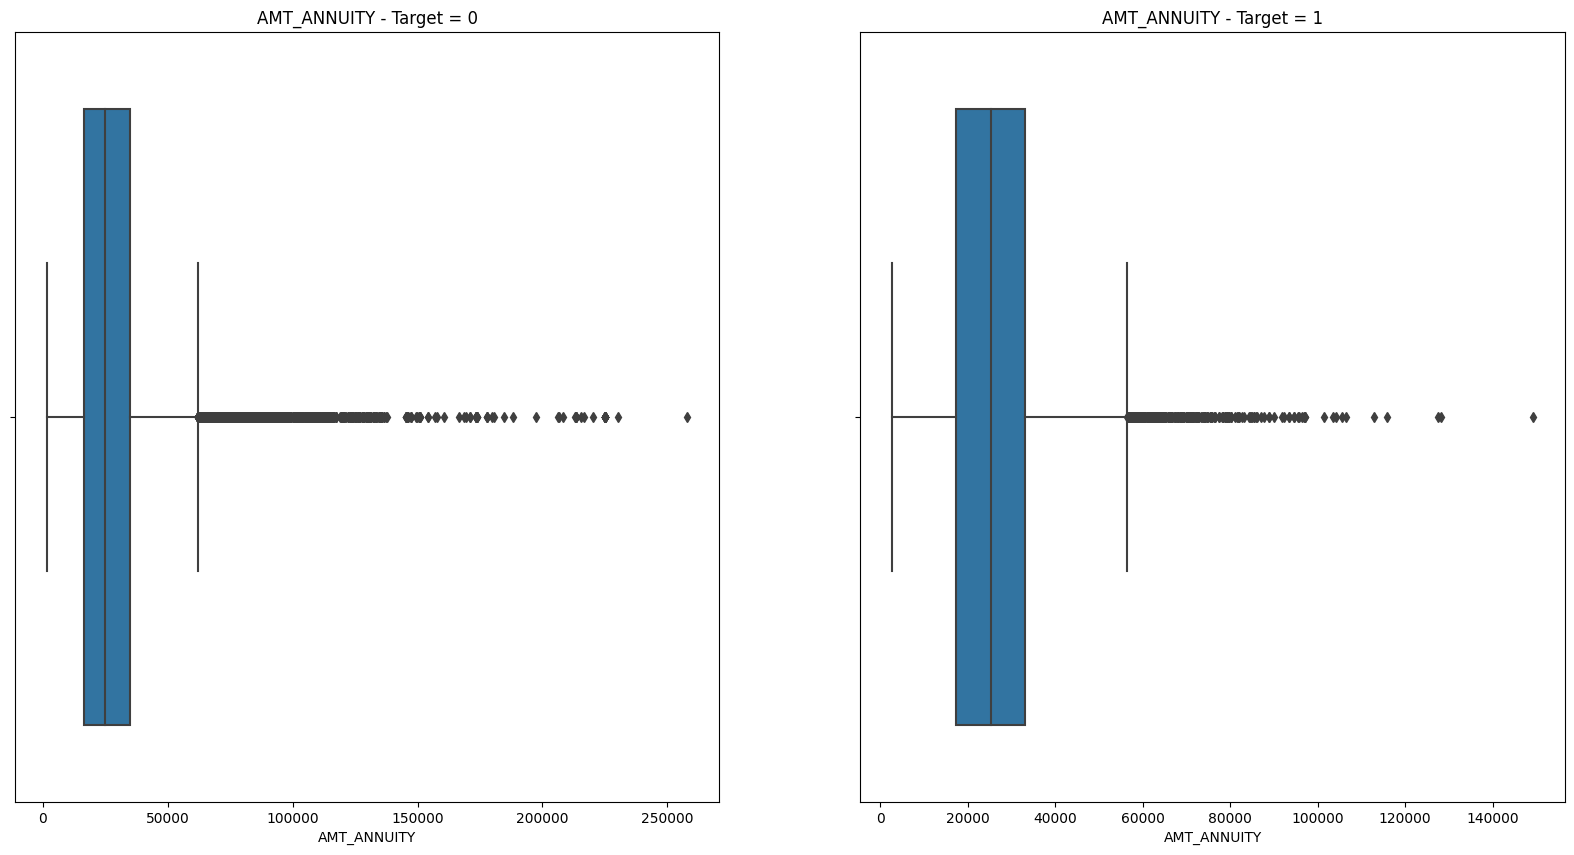

In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=target_0_df, x=i)
    plt.title(i + ' - Target = 0')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=target_1_df, x=i)
    plt.title(i + ' - Target = 1')


####  interpretation from univariate analysis of numerical variables
##### In this section, we will only highlight variables having significant difference for target = 0 and target = 1  

- **DAYS_LAST_PHONE_CHANGE**: Median value and 75 percentile value for Defaulters (Target = 1) is lesser than non-defaulters. It implies defaulter more often change phone number before application
- **DAYS_ID_PUBLISH**: Defaulters seem to change IDs more frequetly than non-defaulters
- **DAYS_BIRTH**: 25 percentile, median, and 75 percentile for the age of defaulter applicants are smaller than younger applicants. This means defaulter population is younger than non-defaulter.

### Bivariate Analysis for Categorical Variable

#### For bi variate analysis we target-0&1, we will use the data set where full target column is available. Further, we will calculate mean of target column for each categorical variable as it will tell us percentage of defaulters for the category

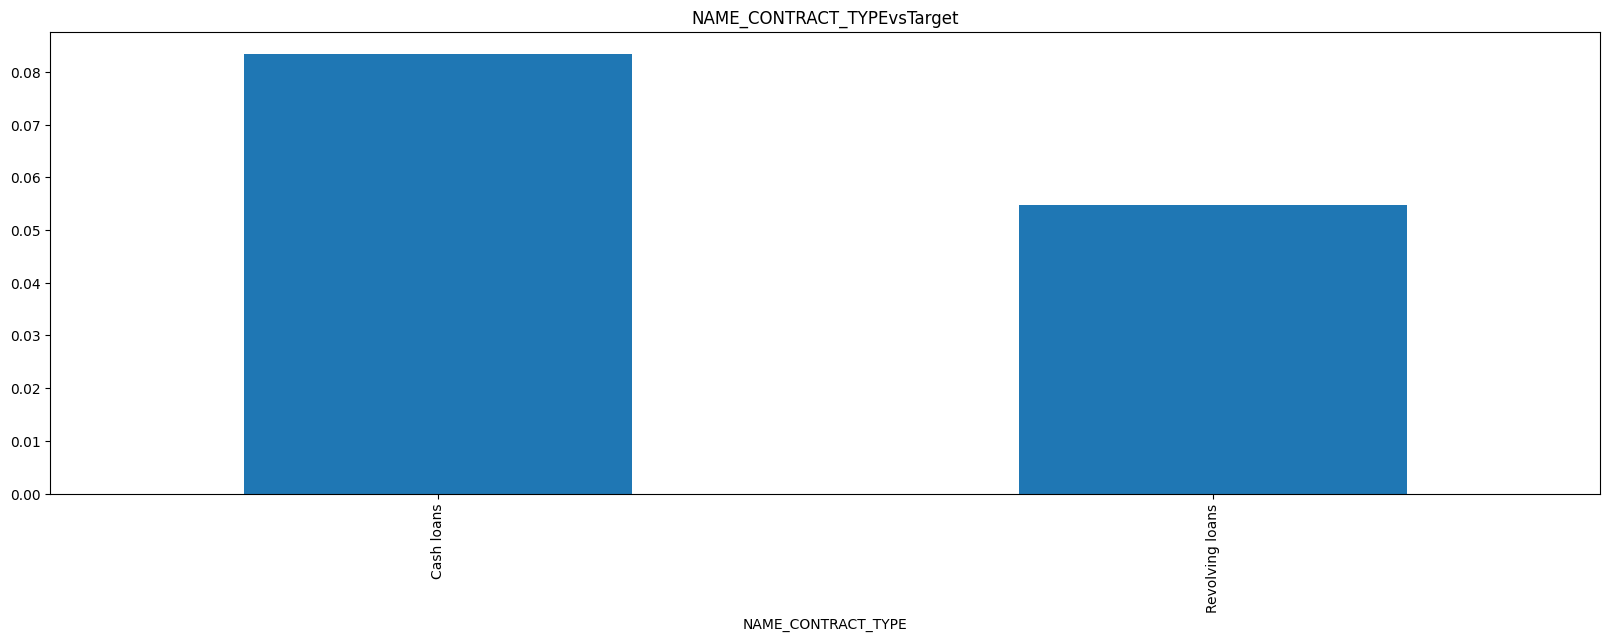

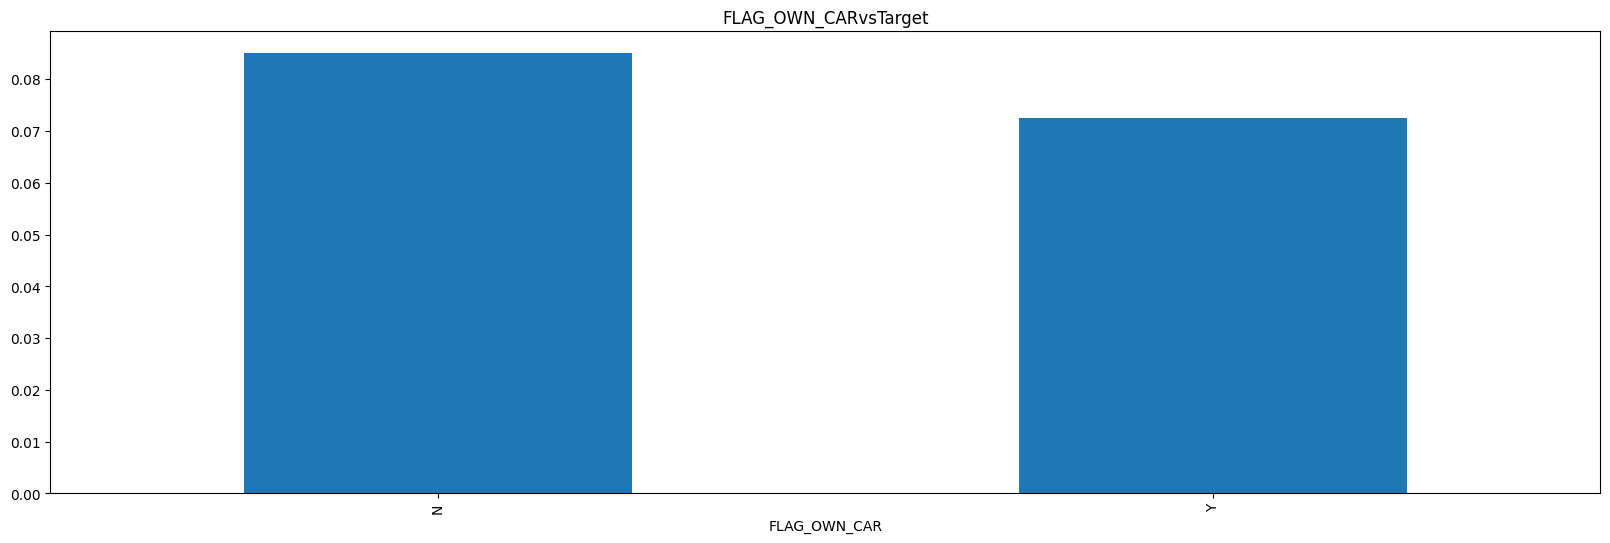

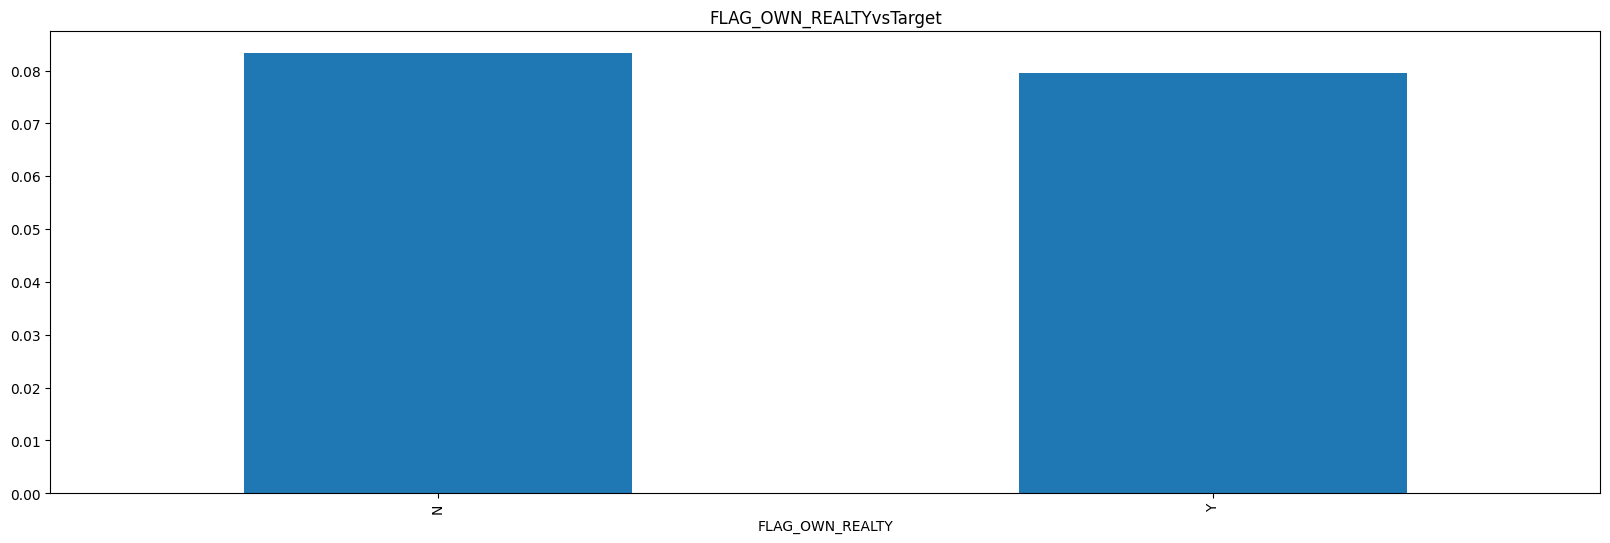

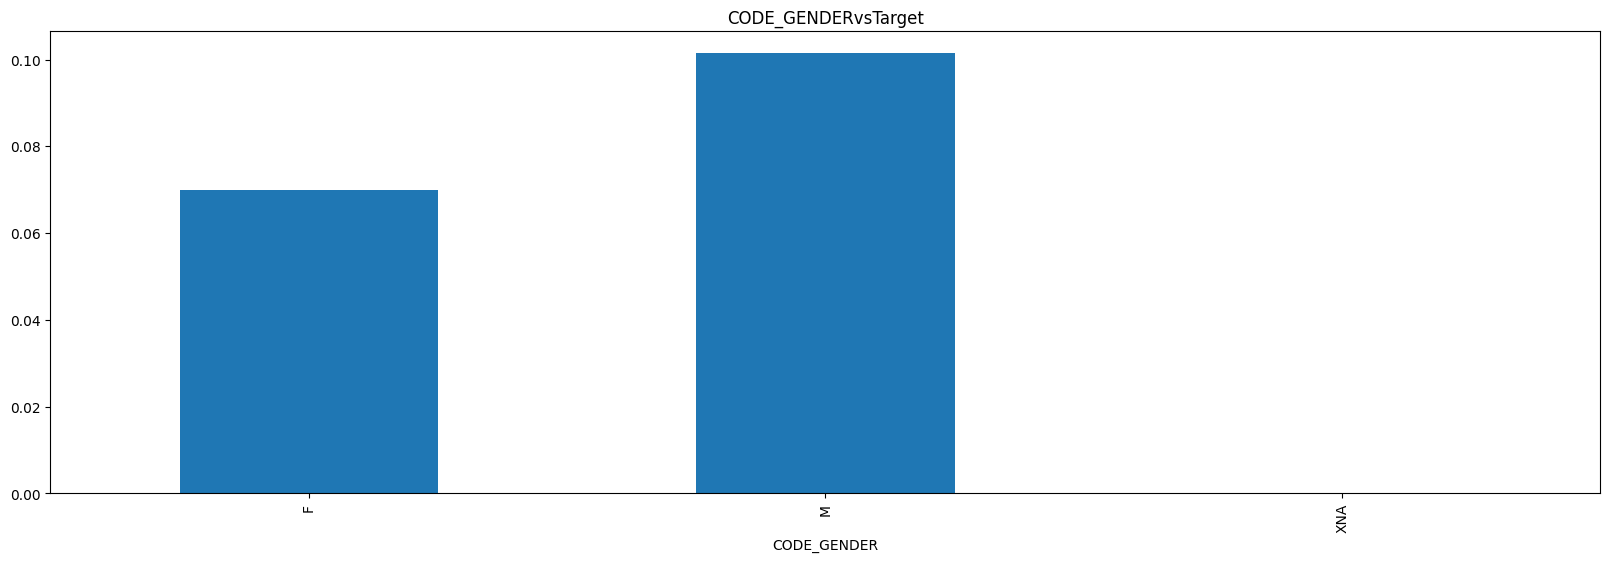

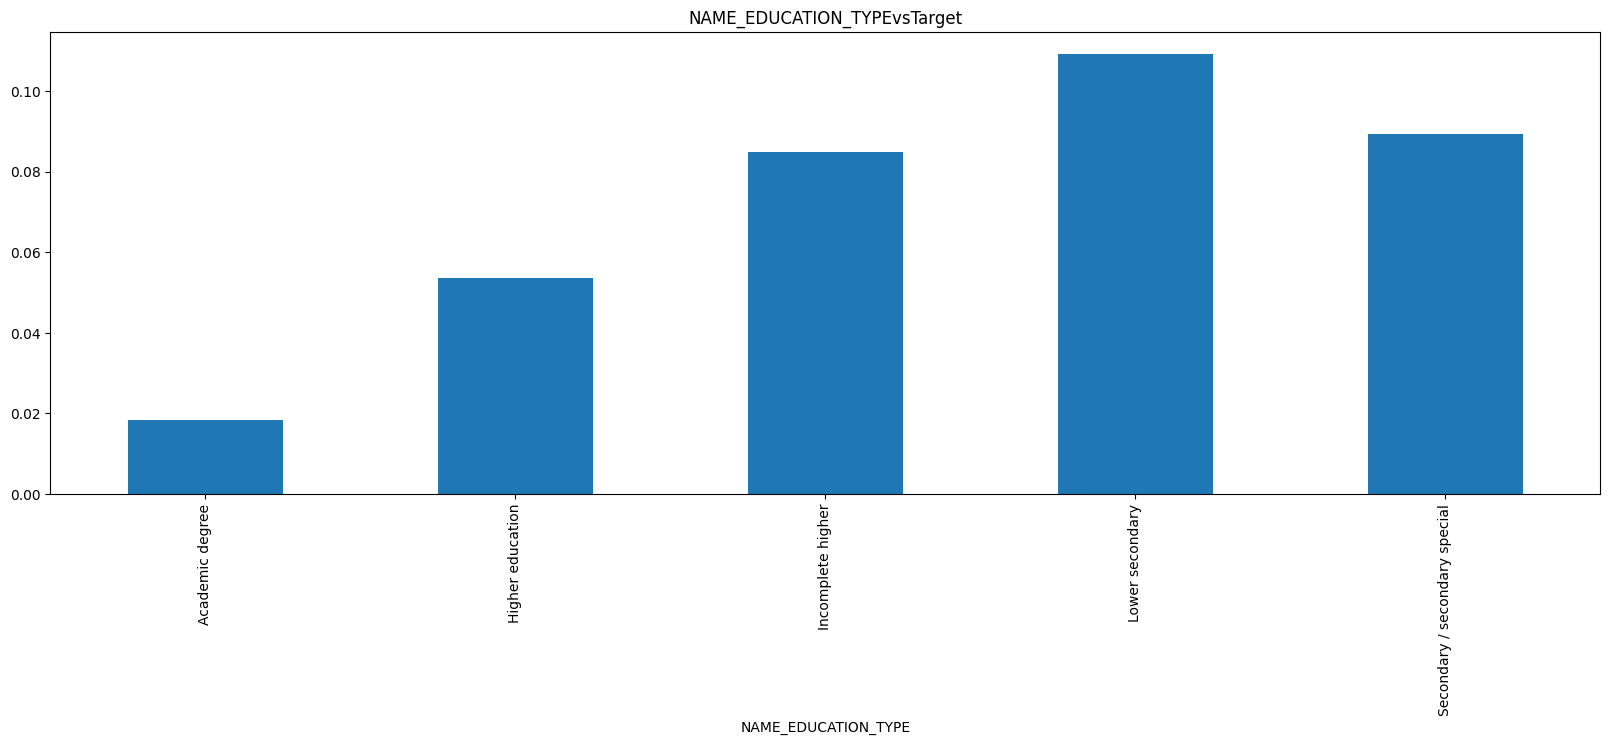

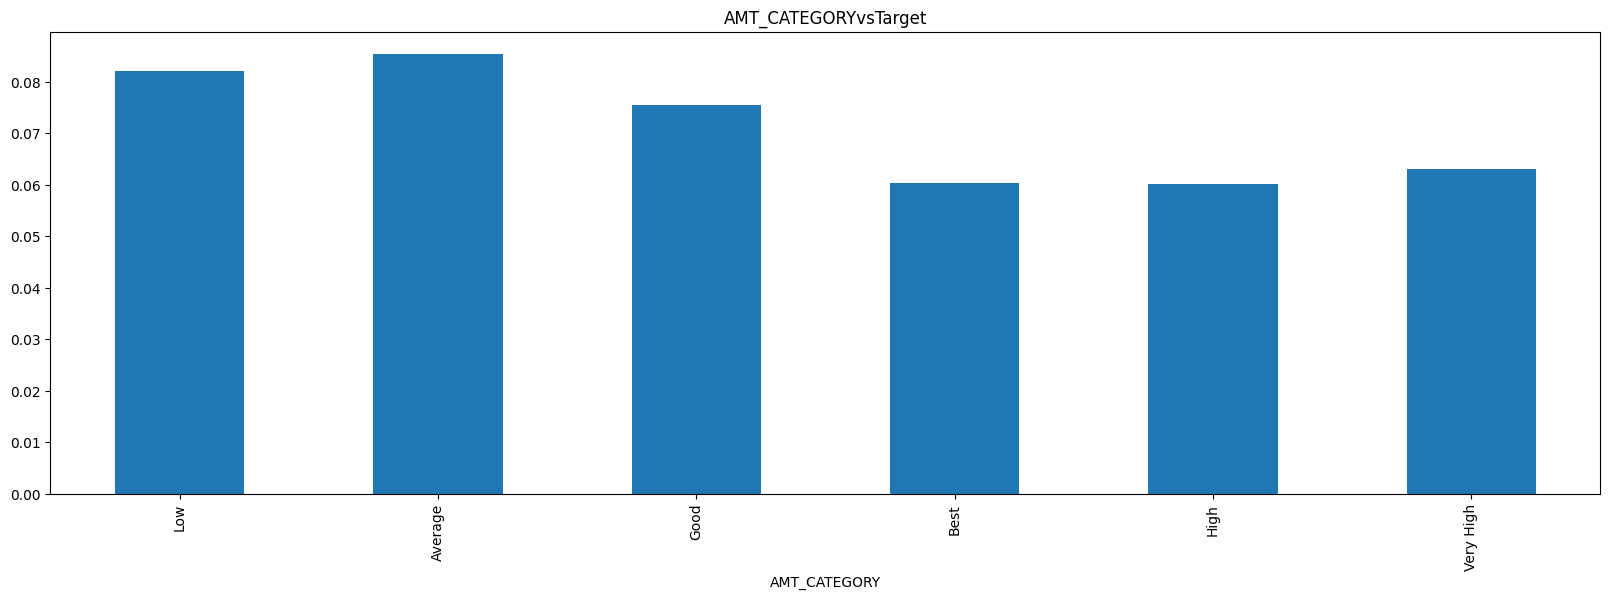

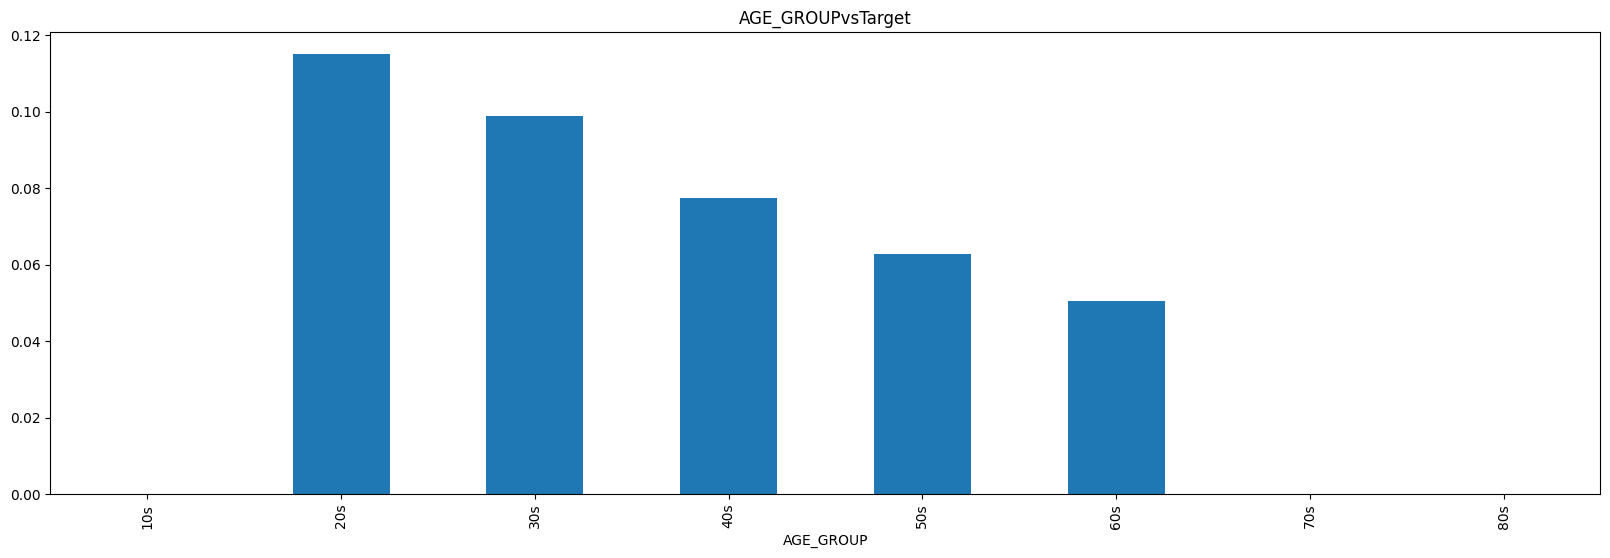

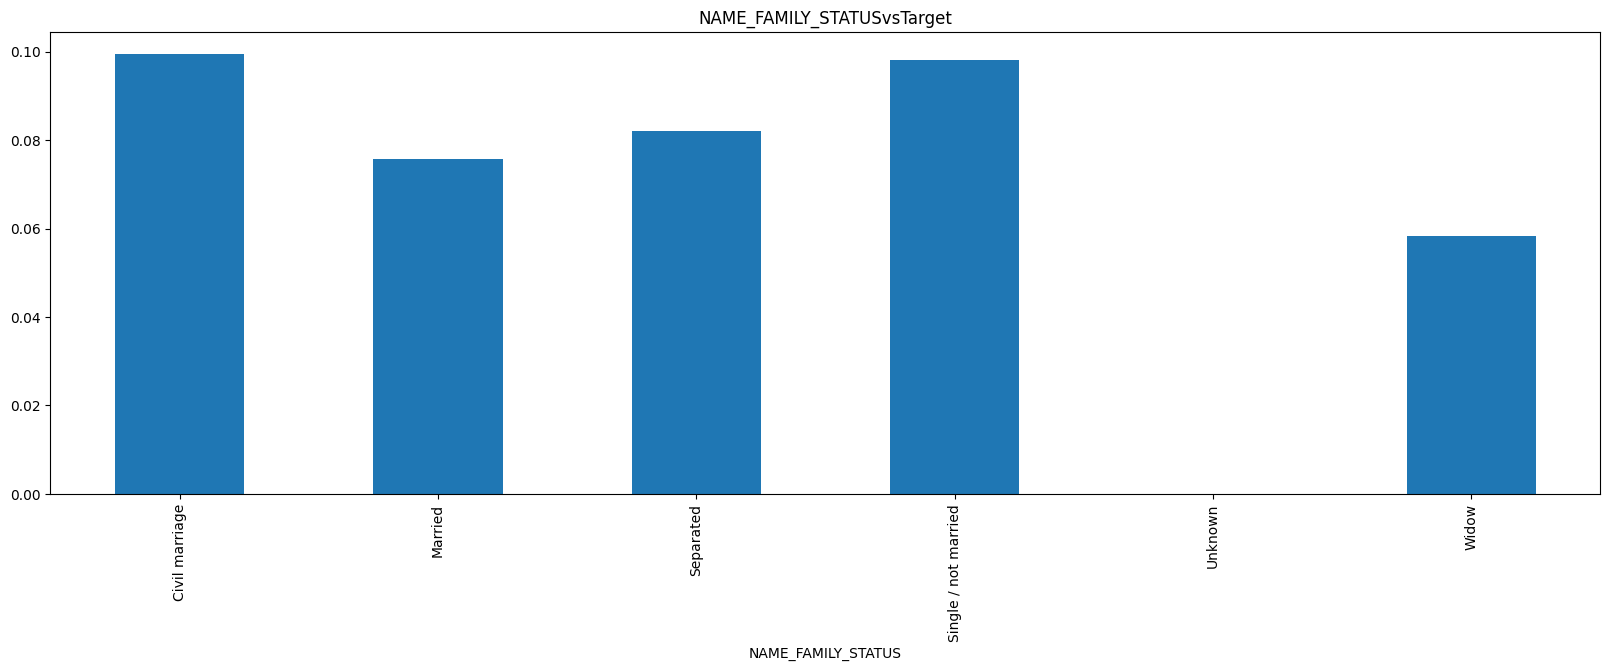

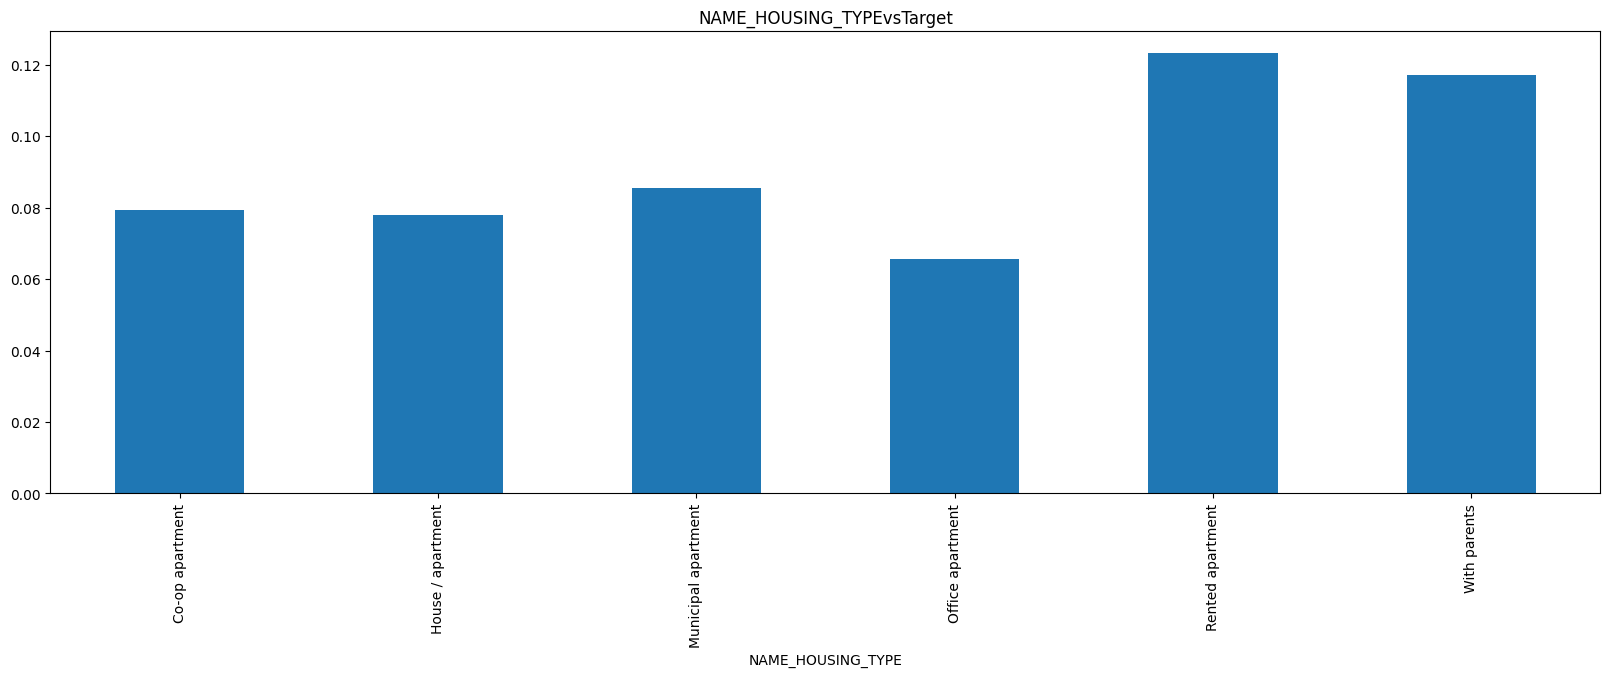

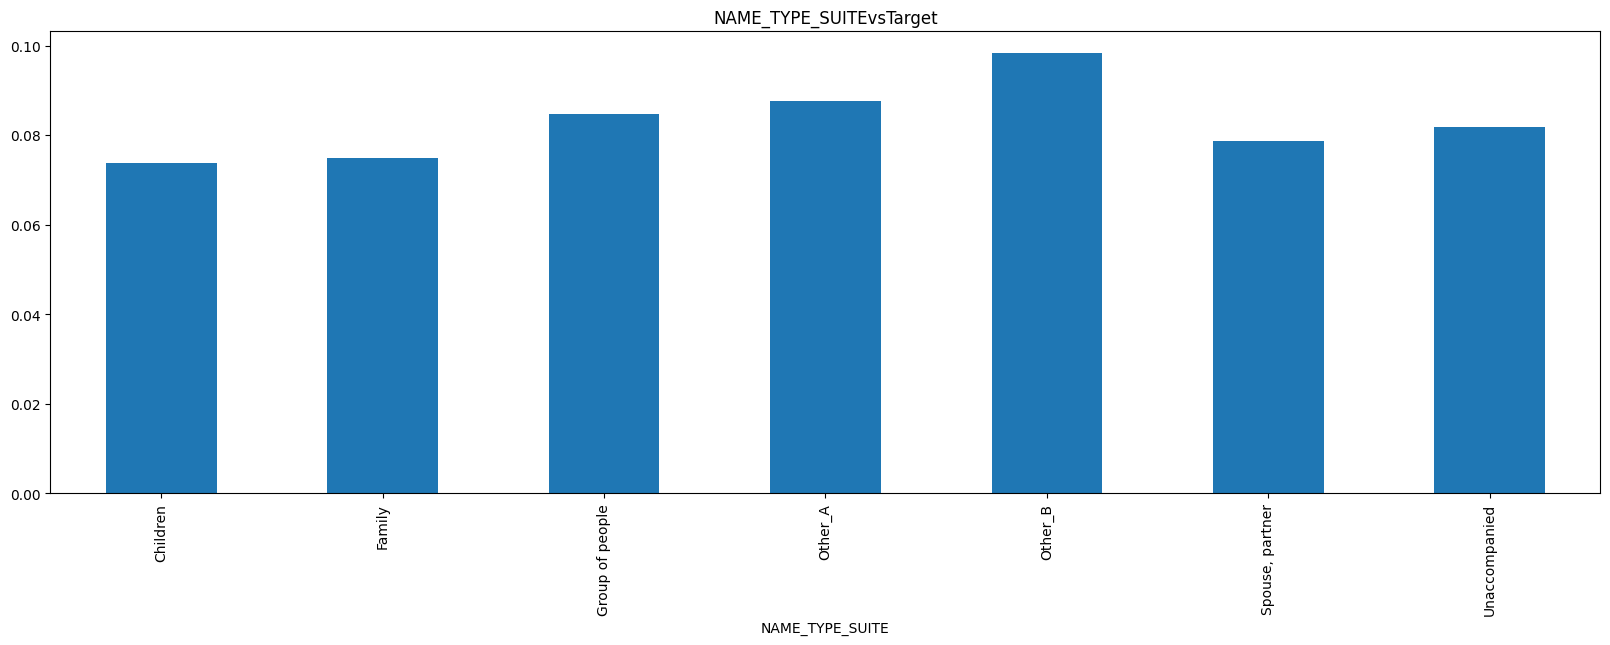

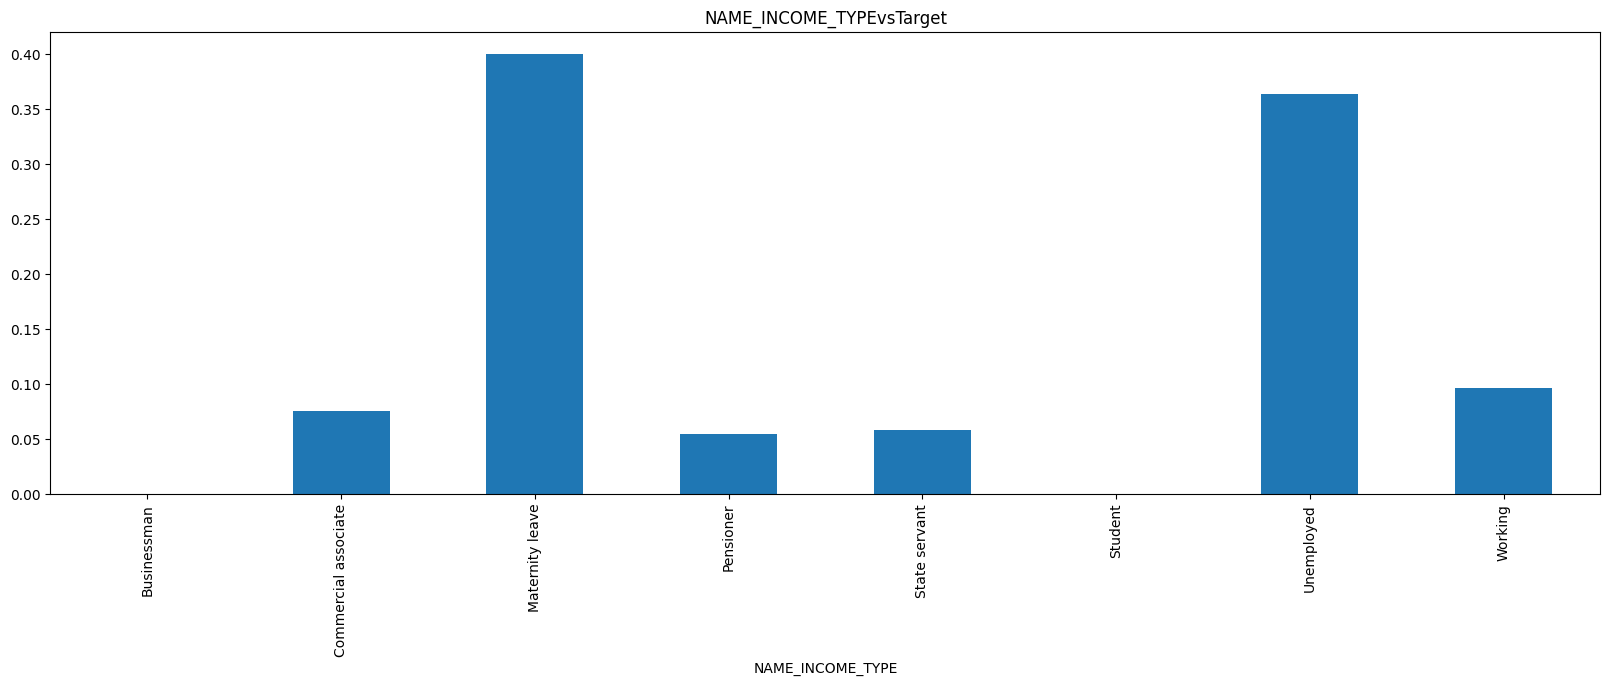

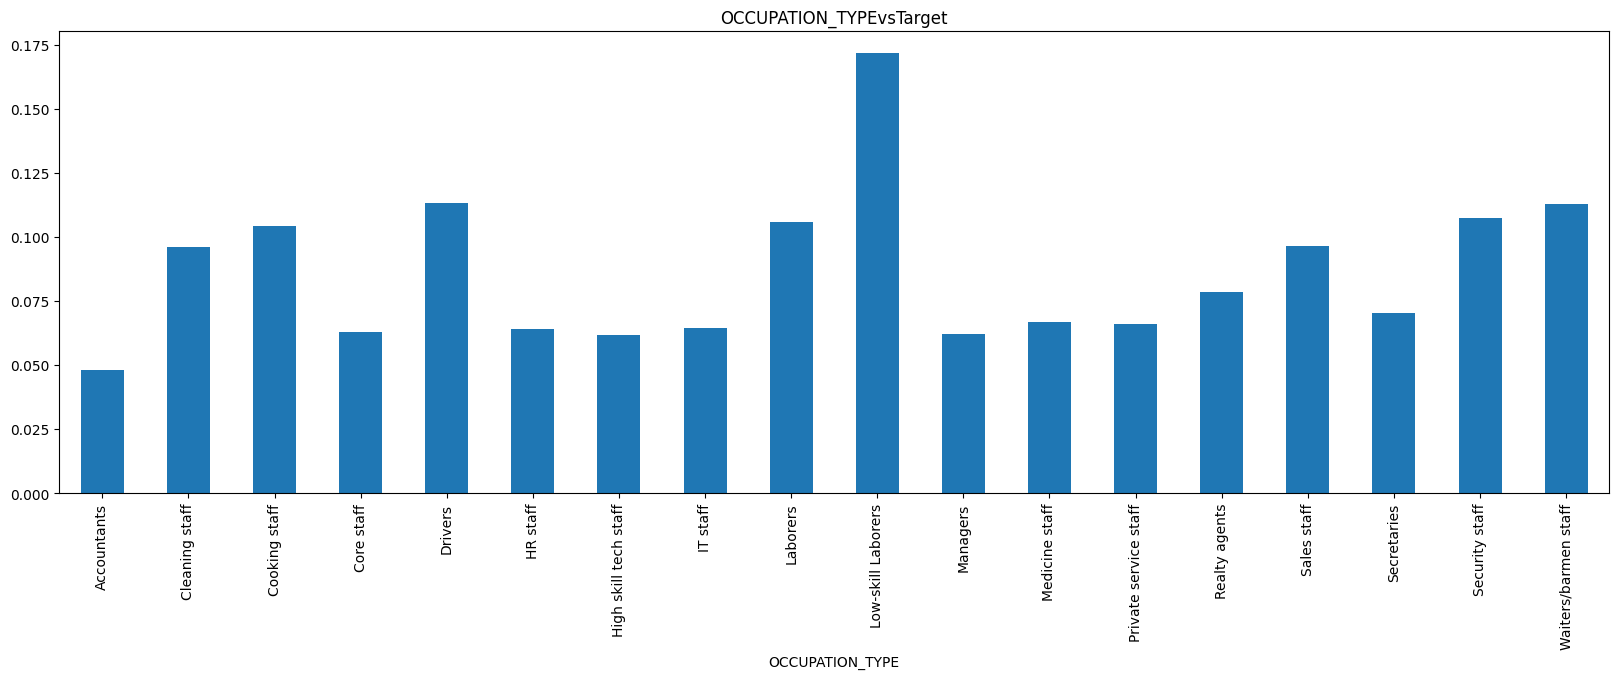

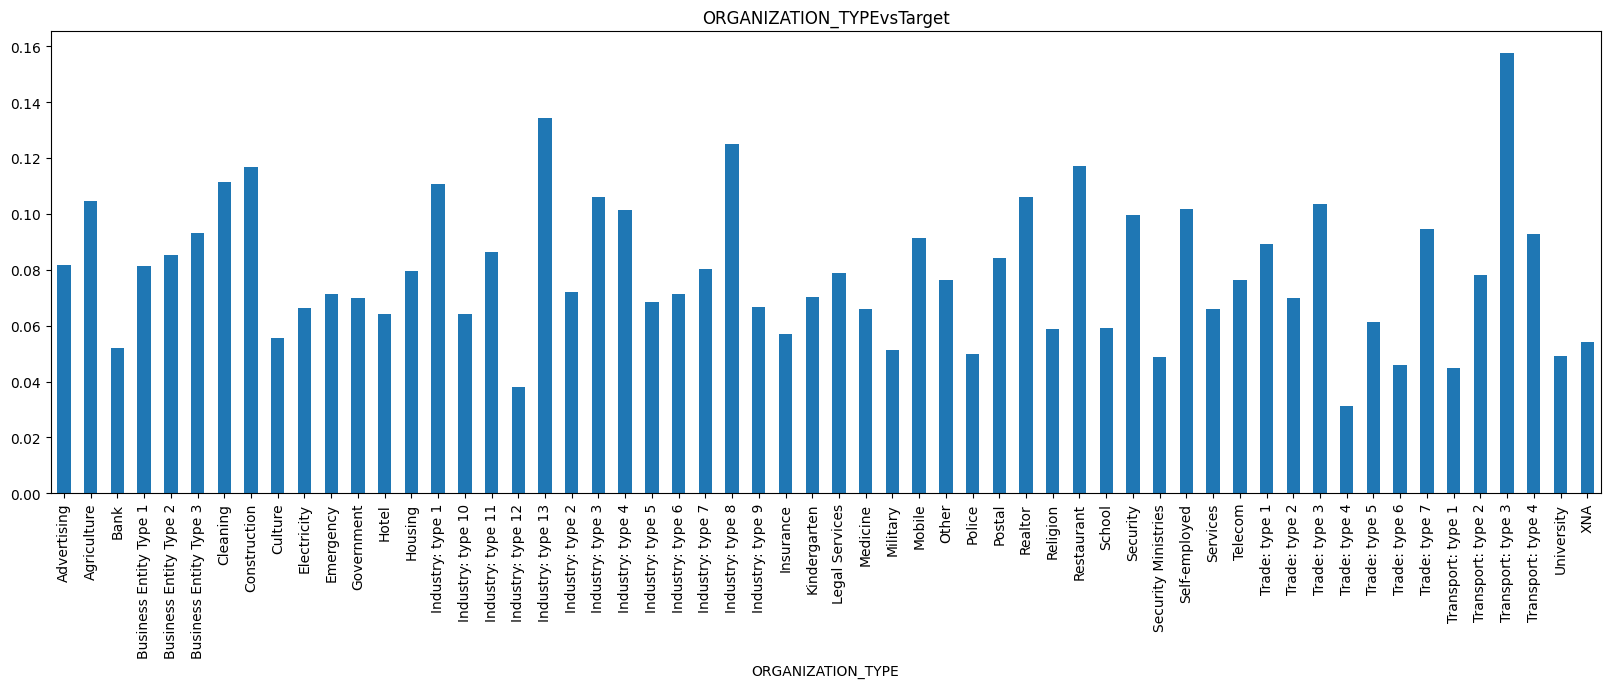

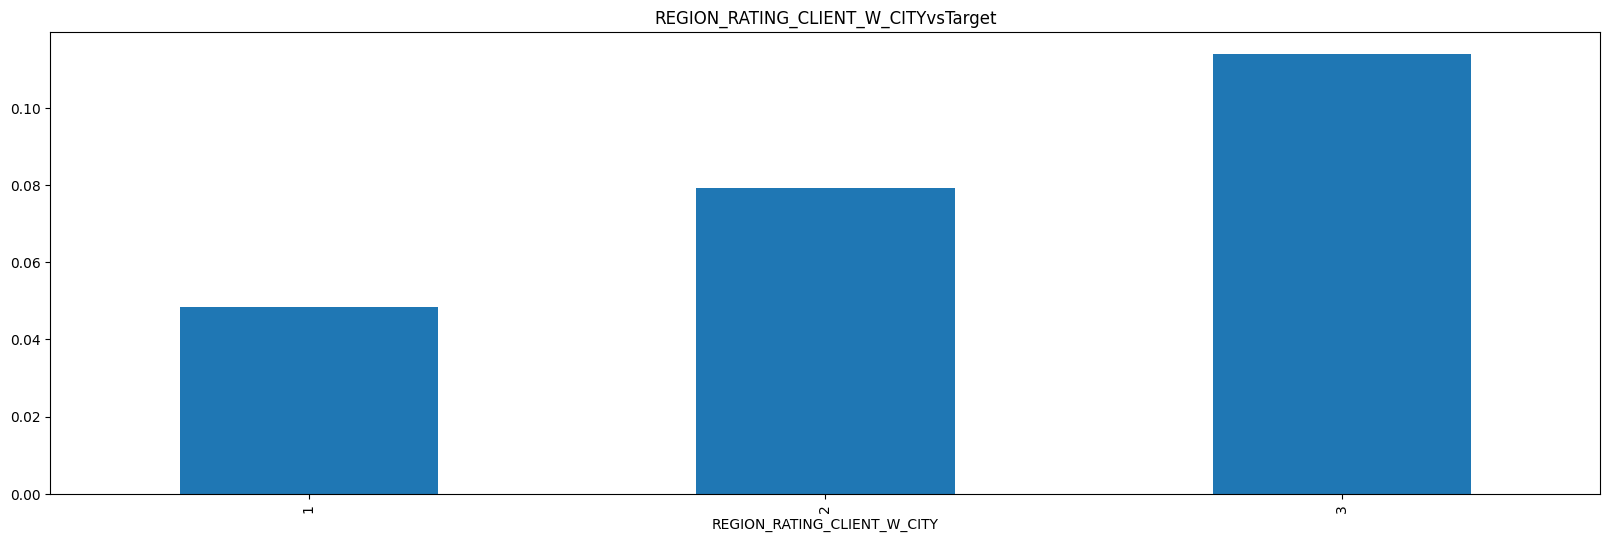

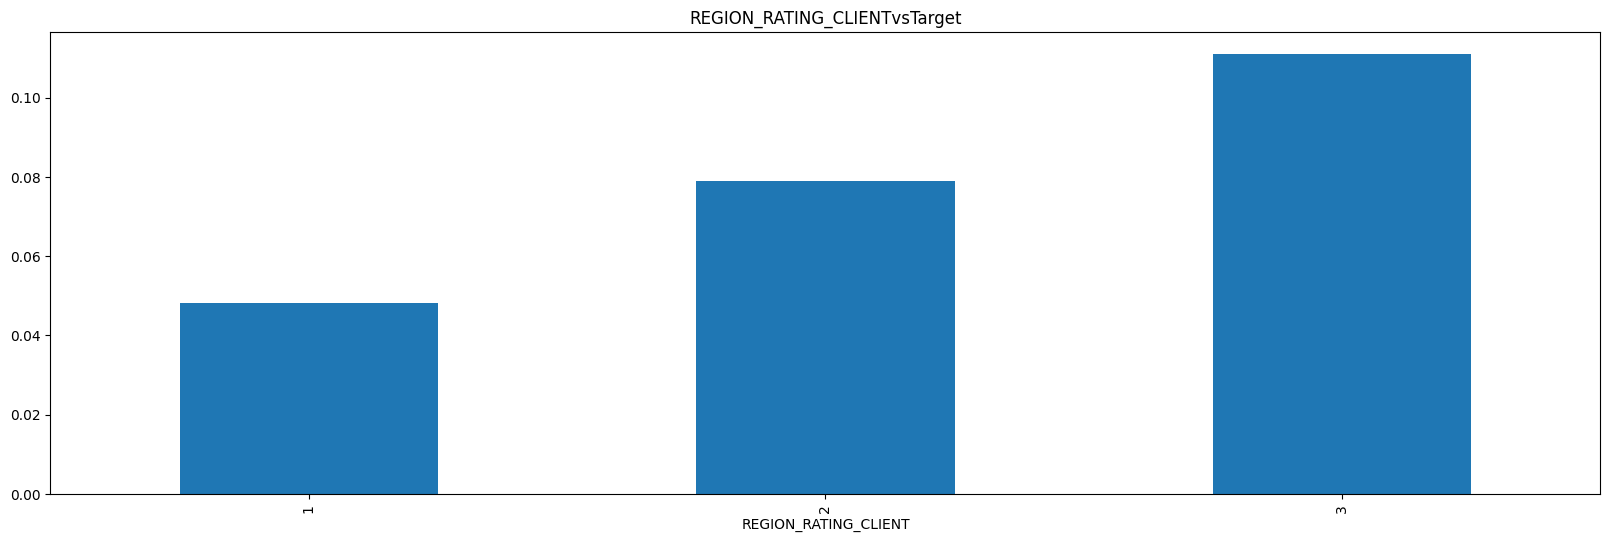

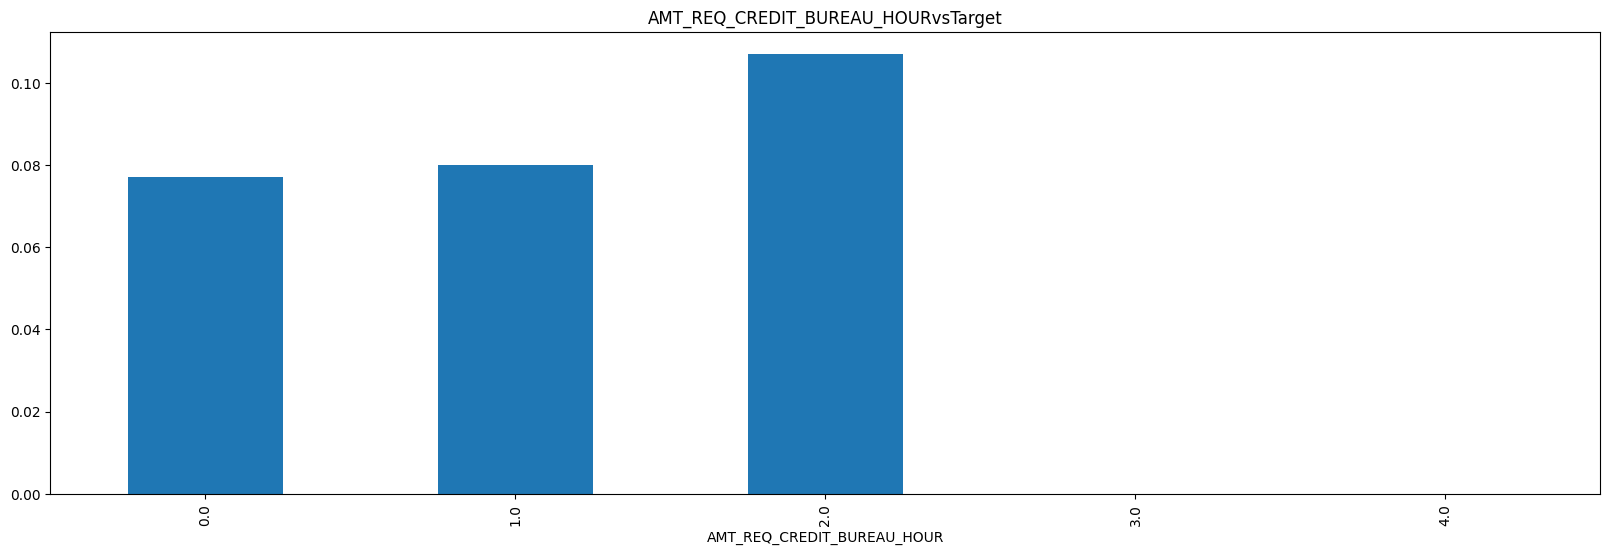

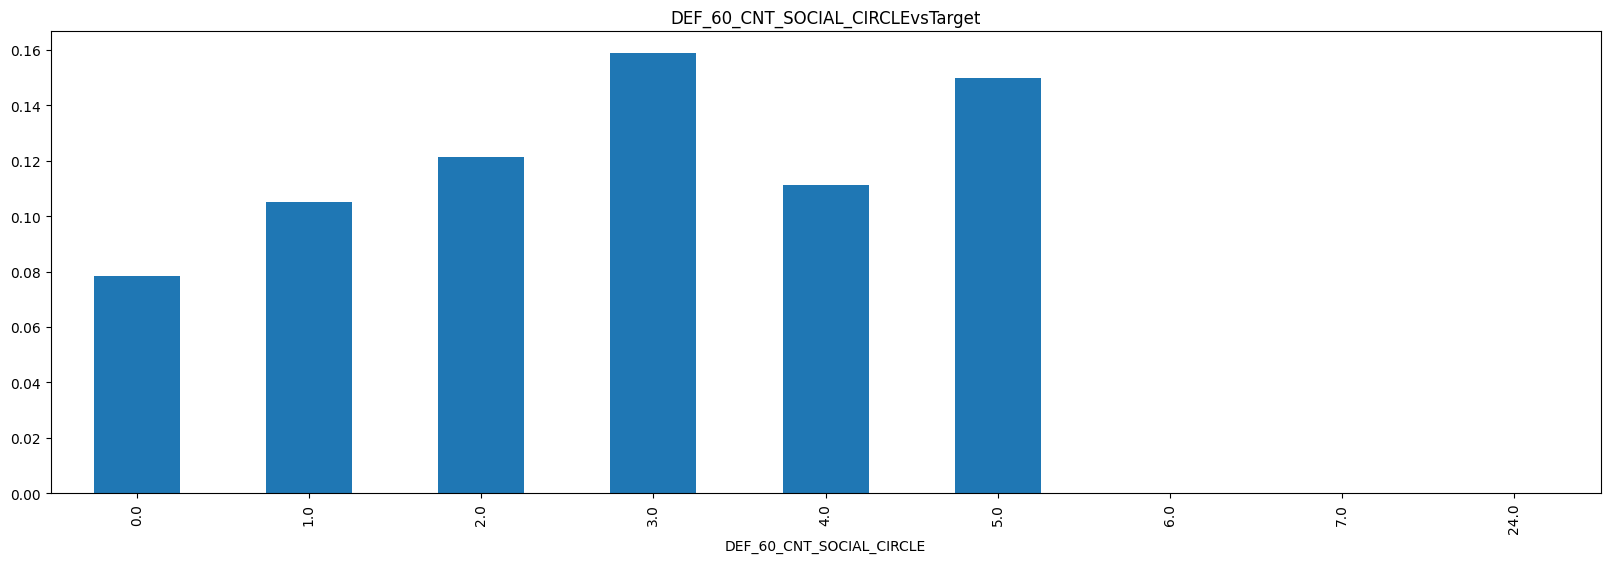

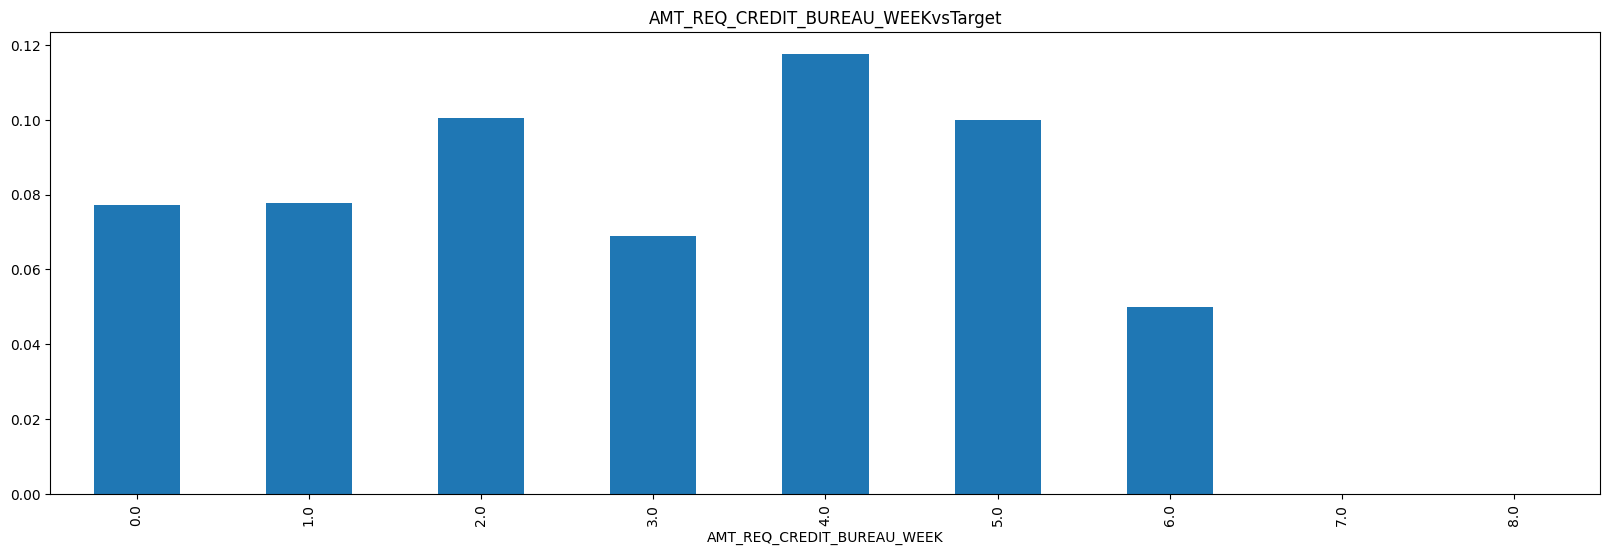

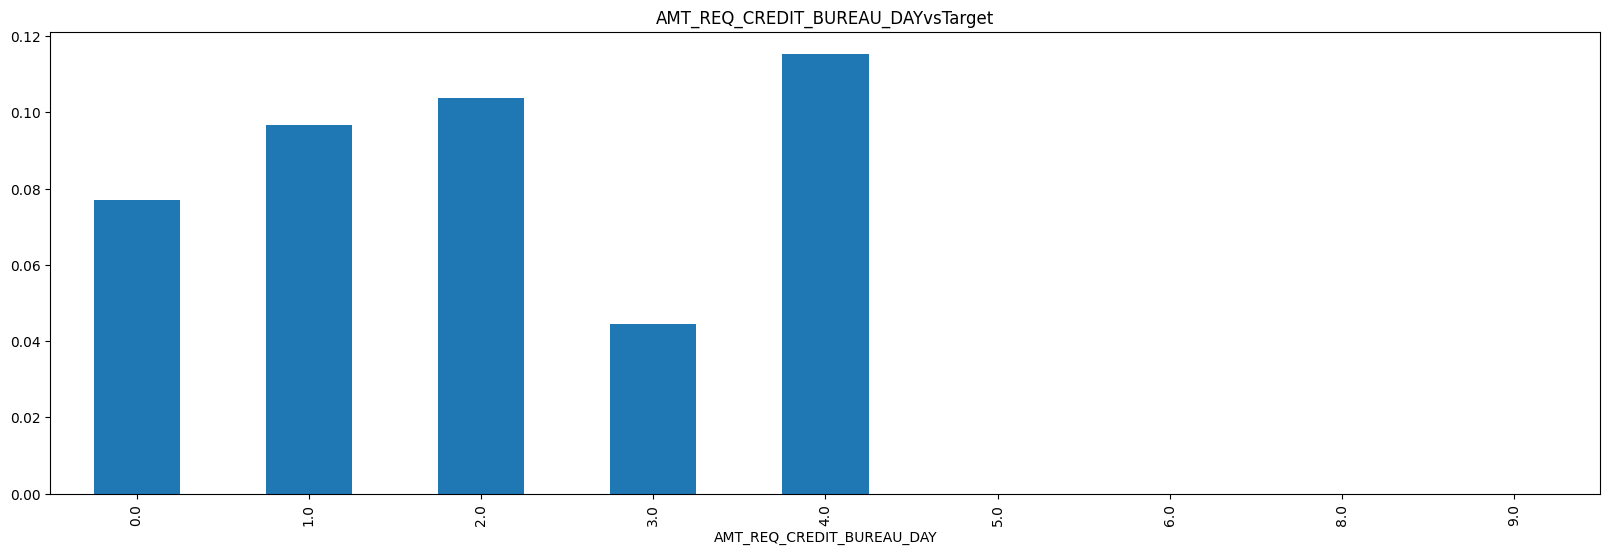

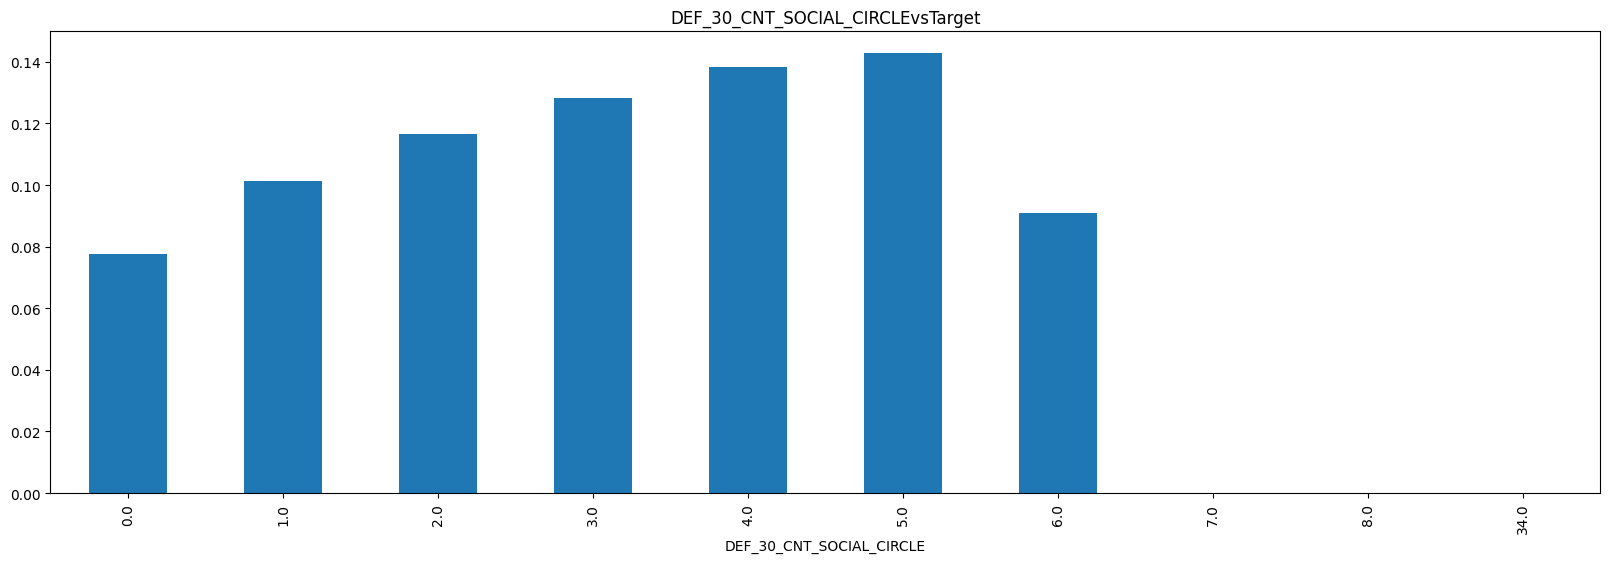

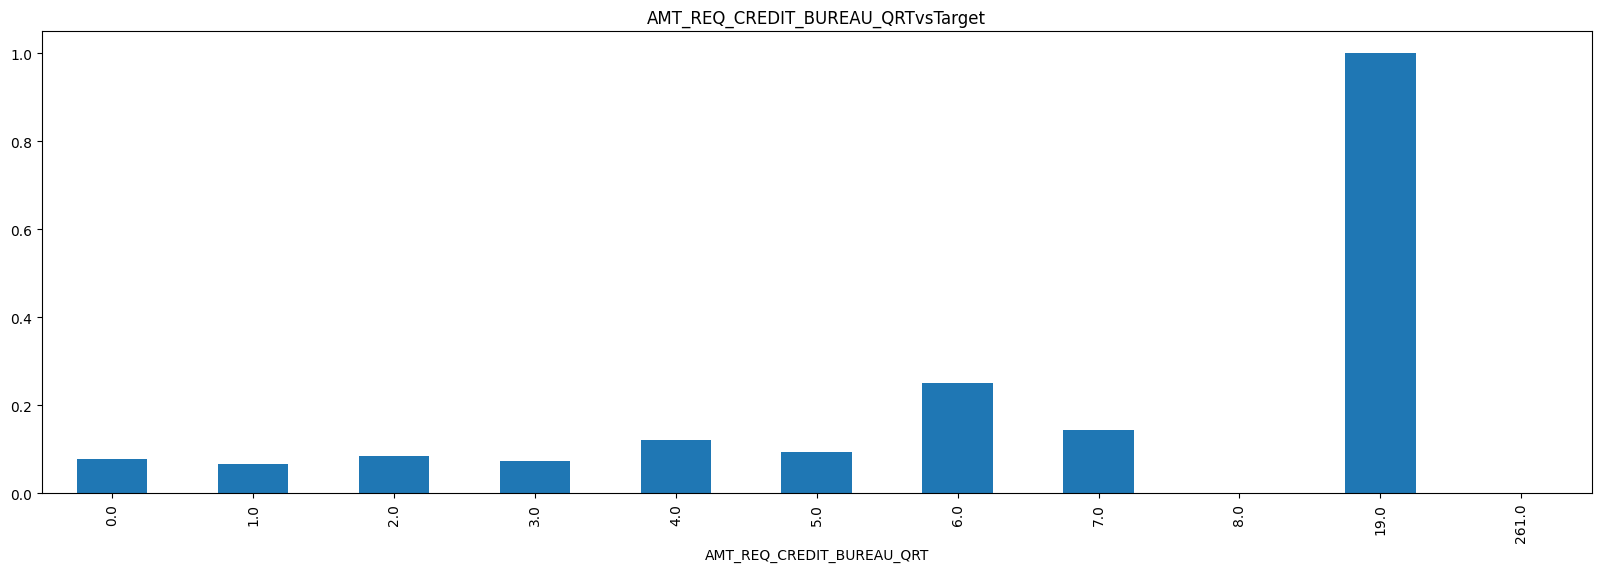

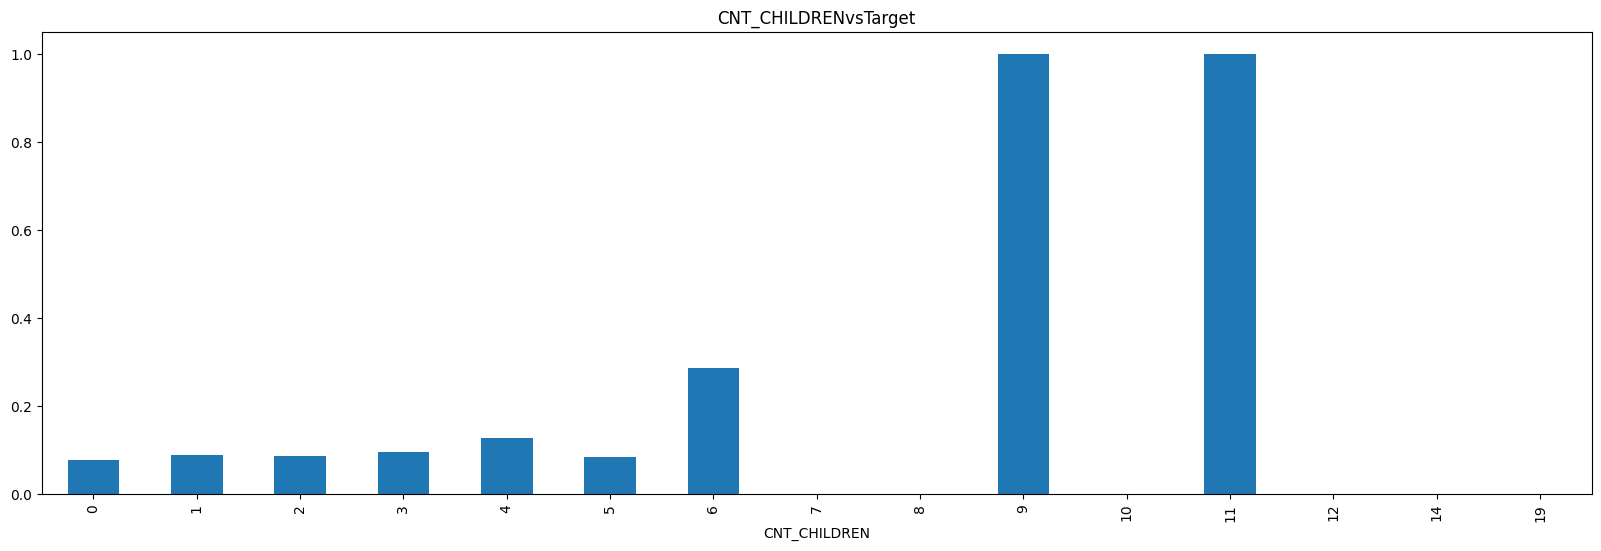

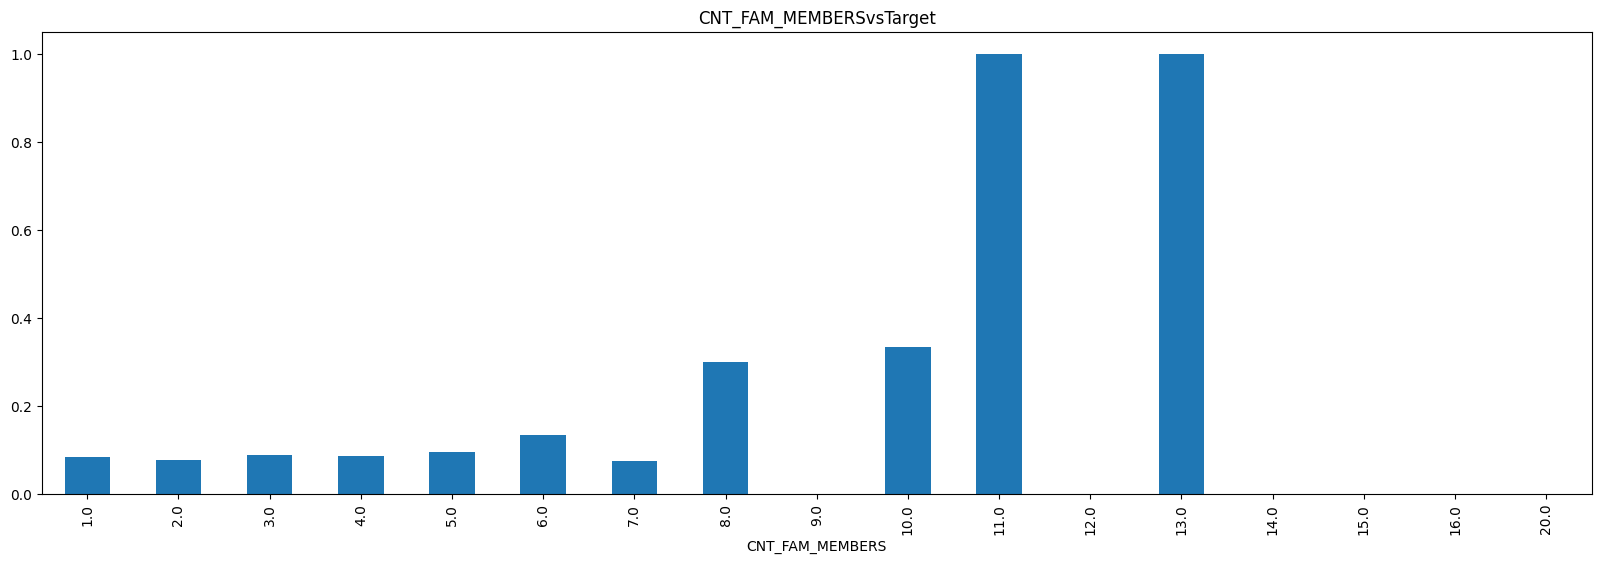

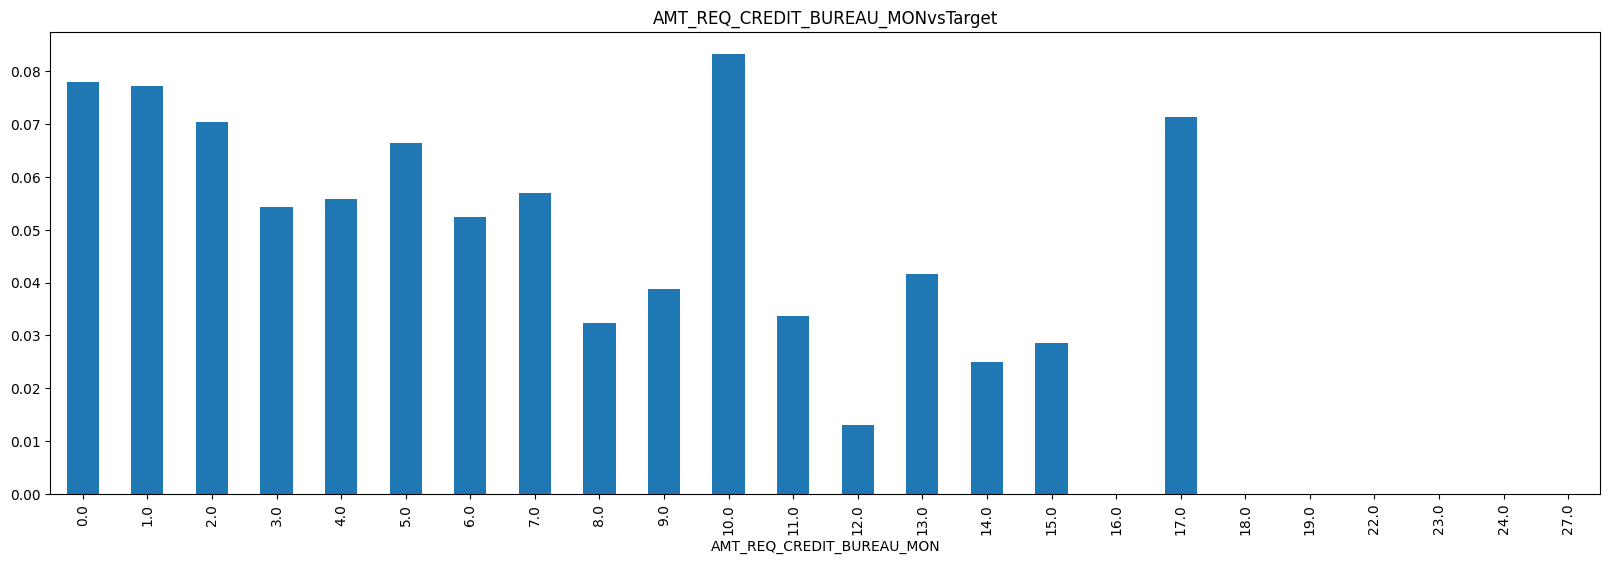

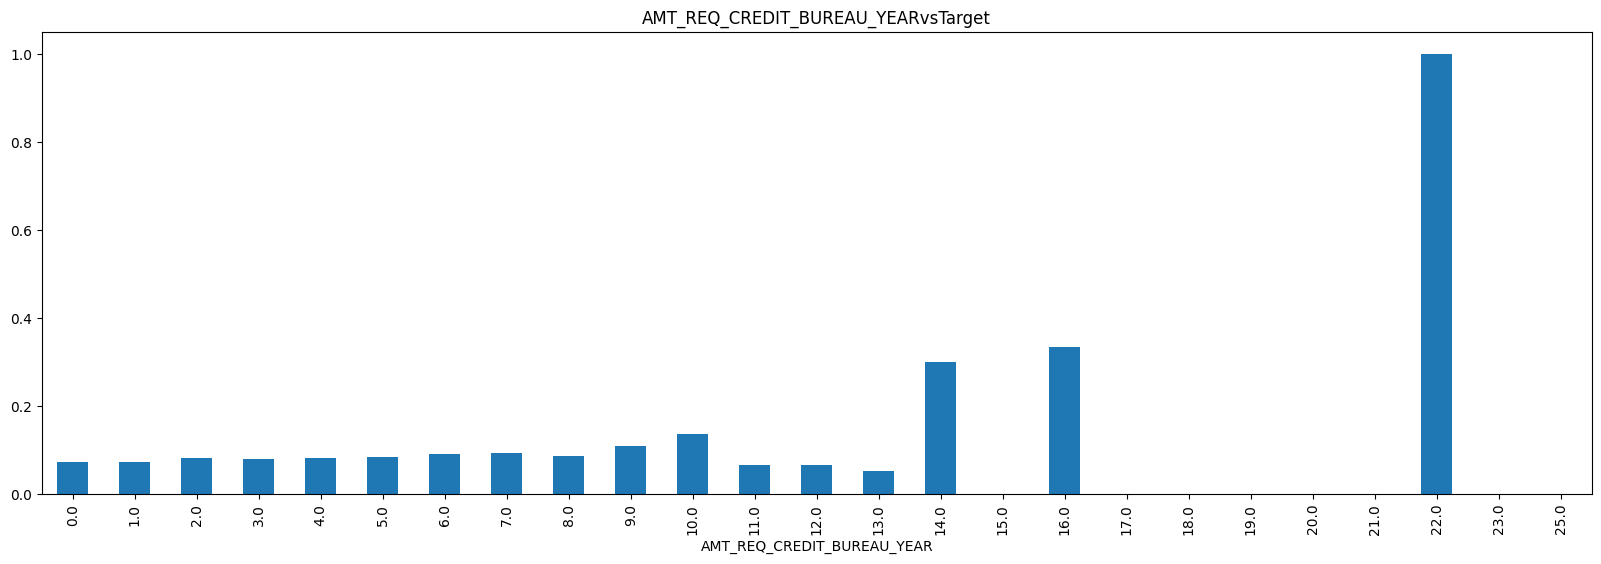

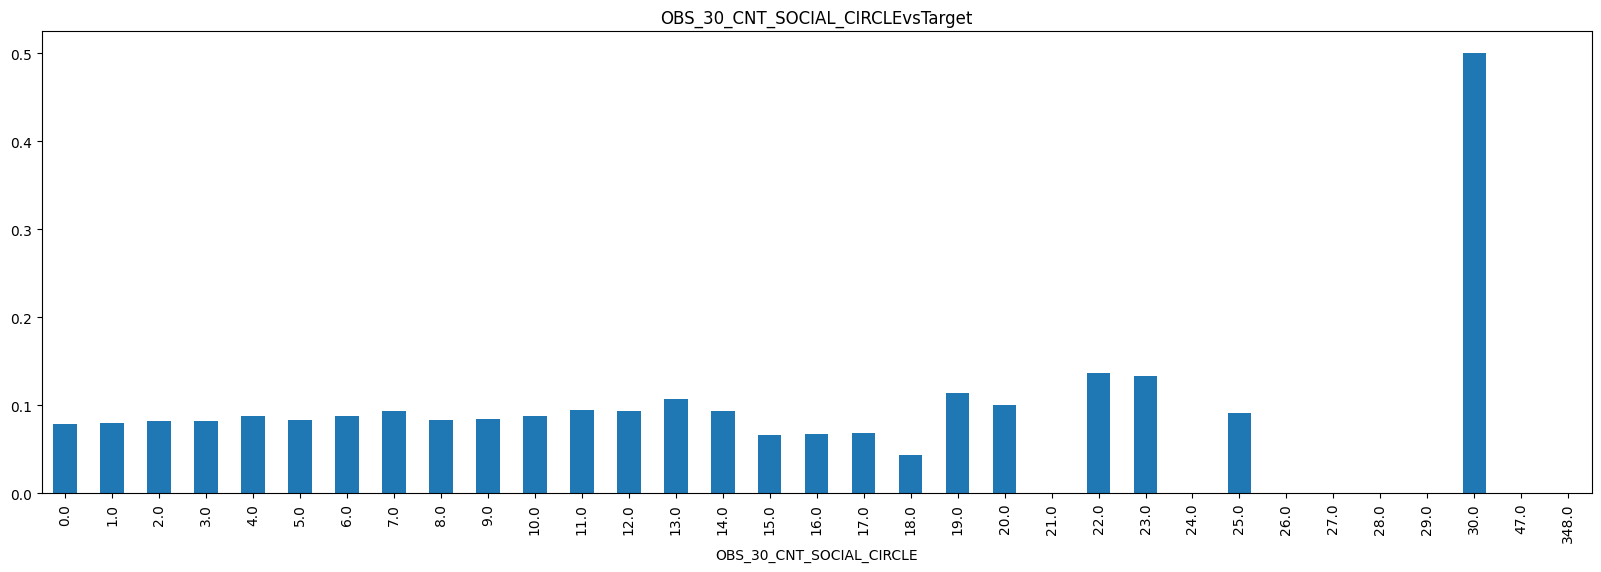

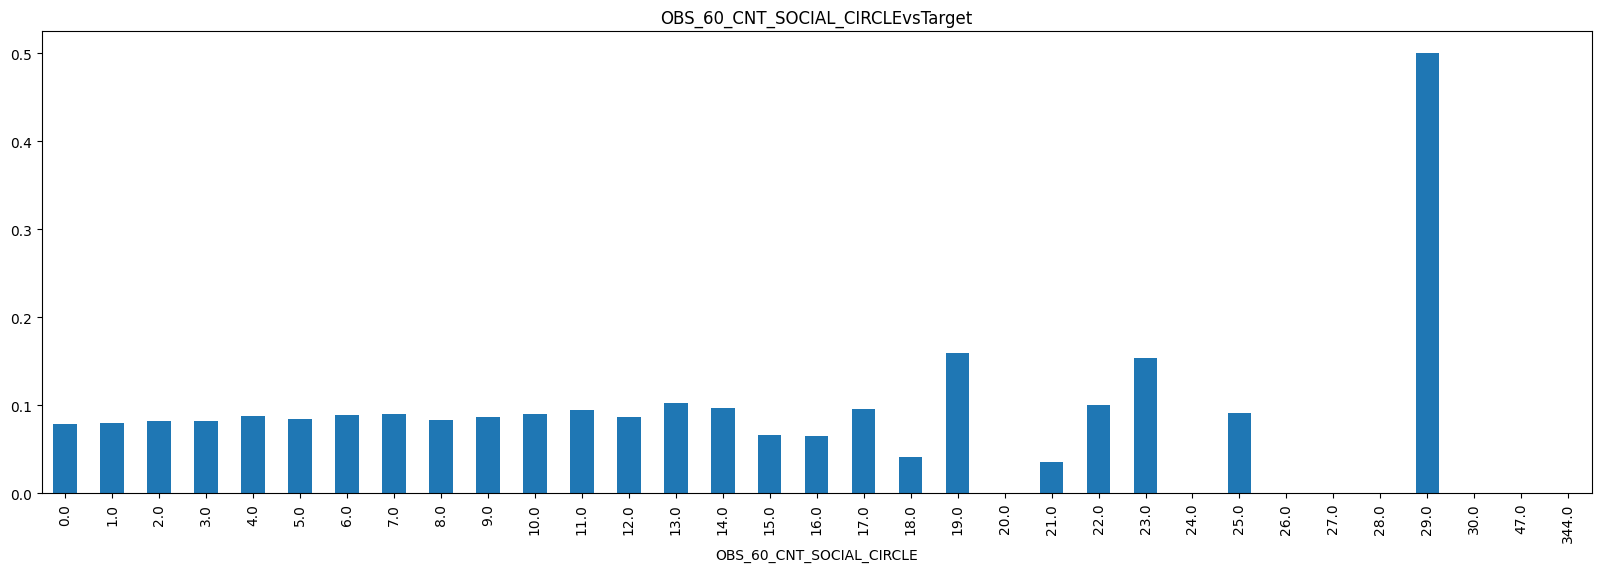

In [ ]:
for i in categorical_columns:
    (df_2.groupby(i)['TARGET'].mean()).plot.bar()
    plt.title(i+ 'vs' +'Target')
    plt.show()

#### Key interpretation from bivariate analysis of categorical variables

- **CODE_GENDER**: Male customers have a higher probability of defaulting
- **NAME_EDUCATION_TYPE**:Customers with lower secondary education have a higher risk of default
- **AGE_GROUP**- Customers in 20s and 30s have higher chances of deafaulting
- **NAME_HOUSING_TYPE**: Customers living in rented apartments and living with parents seem to default more
- **NAME_INCOME_TYPE**:Unemployed and Customers on maternity leave have higher
- **OCCUPATION_TYPE**:Low-skill laborers default more
- **REGION_RATING_CLIENT**&**REGION_RATING_CLIENT_W_CITY**: Customers with rating 3 have higher risk of defaulting    

### Perfoming multivariate Analysis

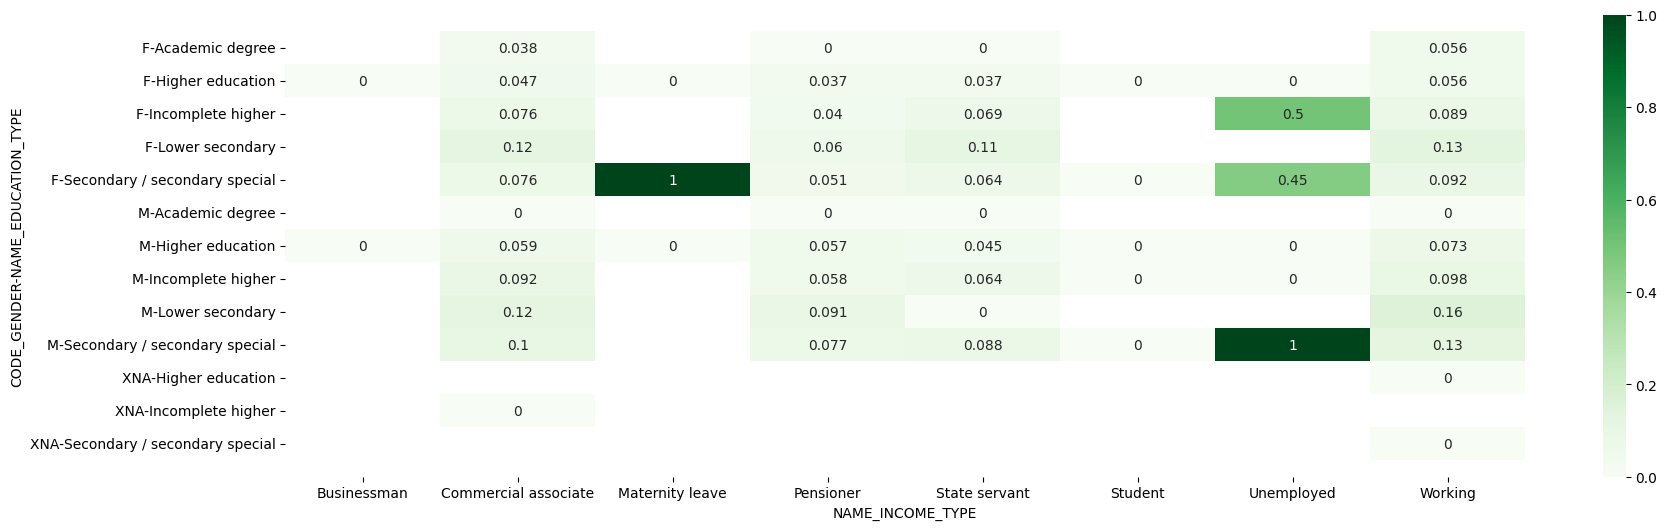

In [ ]:
#multivariate_analysis-1
pivot_data = pd.pivot_table(df_2, values ='TARGET',index=['CODE_GENDER','NAME_EDUCATION_TYPE'], columns='NAME_INCOME_TYPE')
sns.heatmap(pivot_data, annot=True,cmap="Greens")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

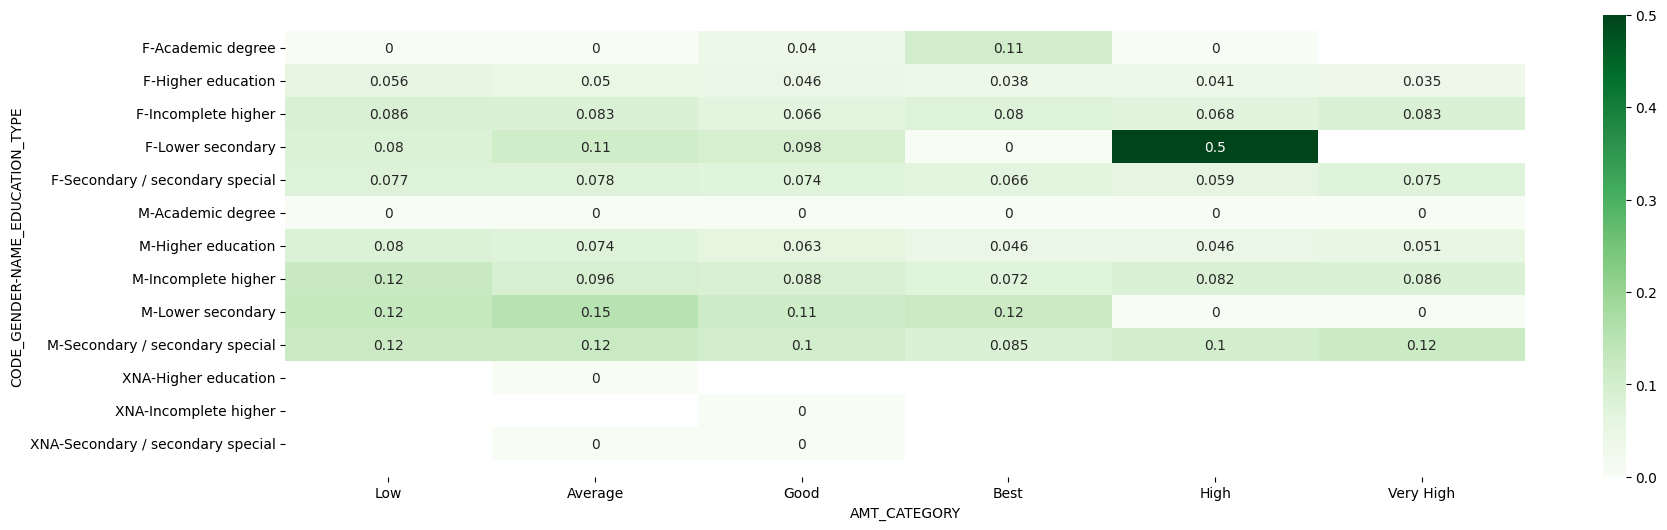

In [ ]:
#multi-variate analysis -2
pivot_data = pd.pivot_table(df_2, values ='TARGET',index=['CODE_GENDER','NAME_EDUCATION_TYPE'], columns='AMT_CATEGORY')
sns.heatmap(pivot_data, annot=True,cmap="Greens")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

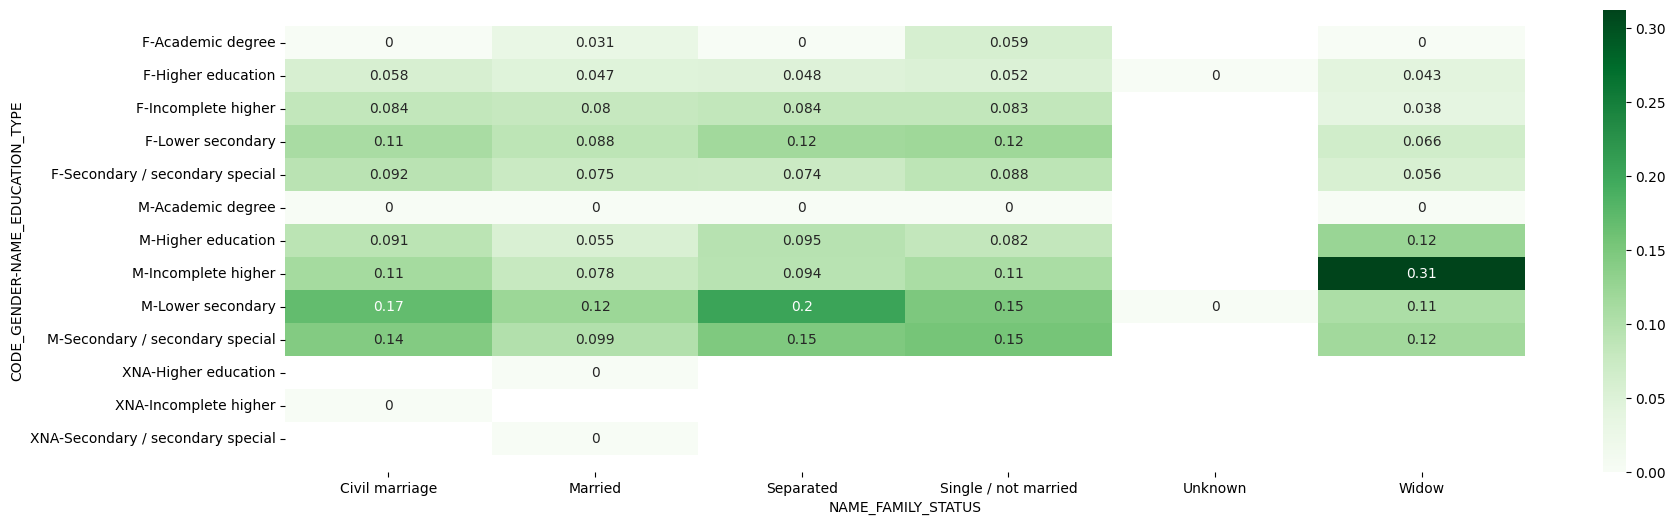

In [ ]:
#multi-variate analysis-3
pivot_data = pd.pivot_table(df_2, values ='TARGET',index=['CODE_GENDER','NAME_EDUCATION_TYPE'], columns='NAME_FAMILY_STATUS')
sns.heatmap(pivot_data, annot=True,cmap="Greens")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

##  Bivariate Analsyis for Numerical columns

#### The objective of this analysis is to find pattern in defaulter vs non-defaulter customers with respect to target

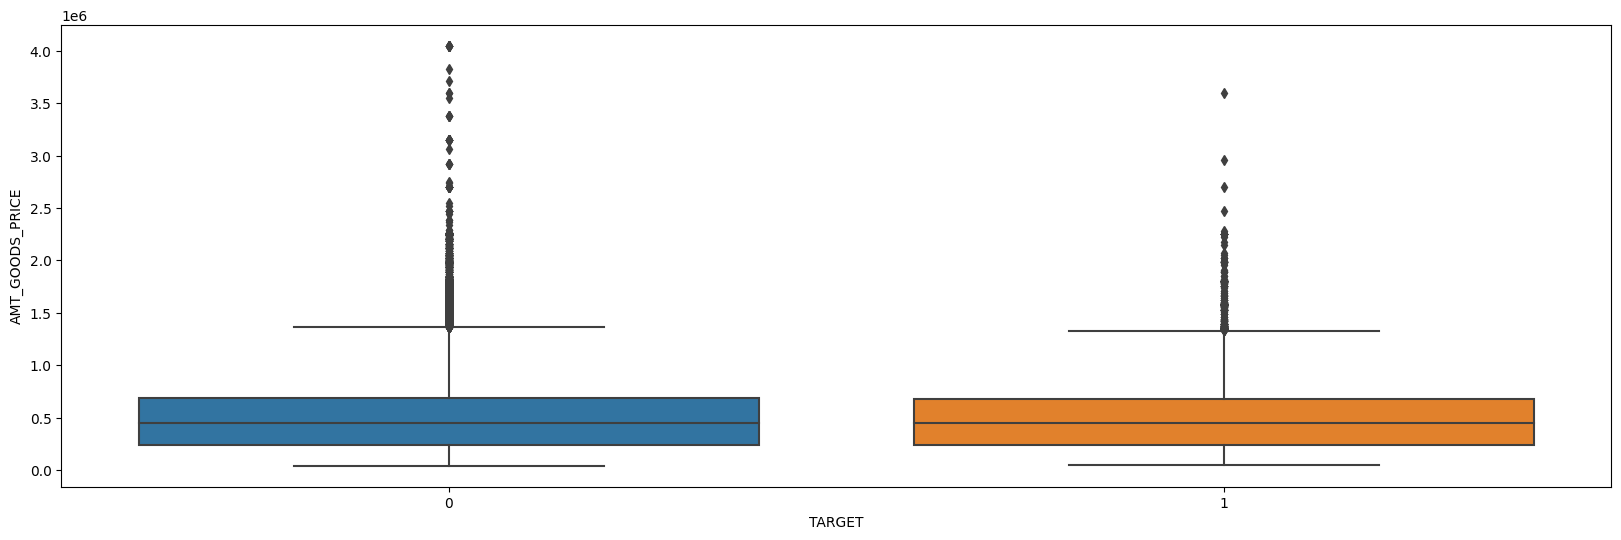

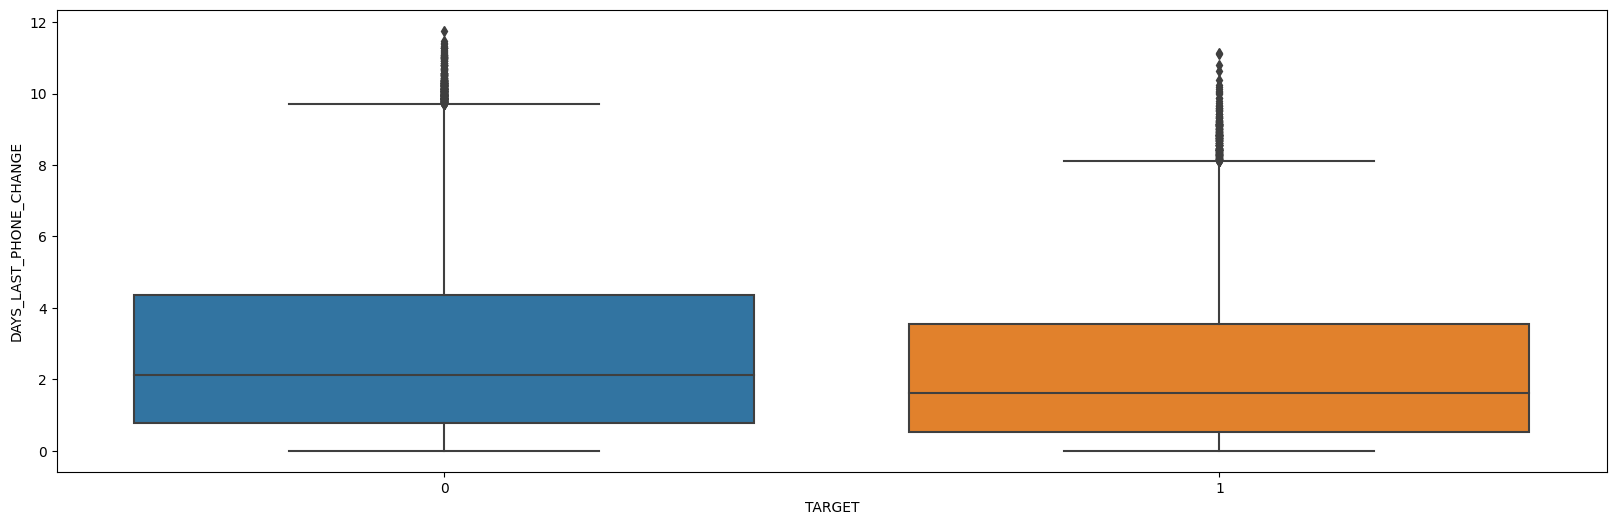

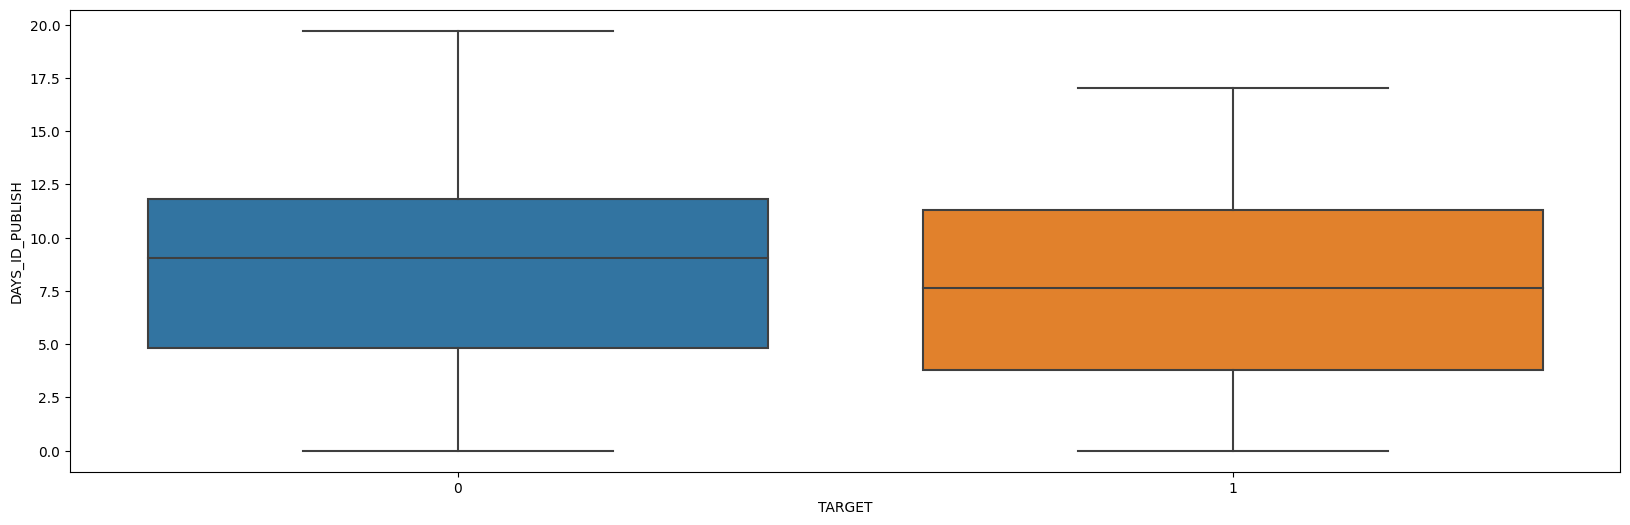

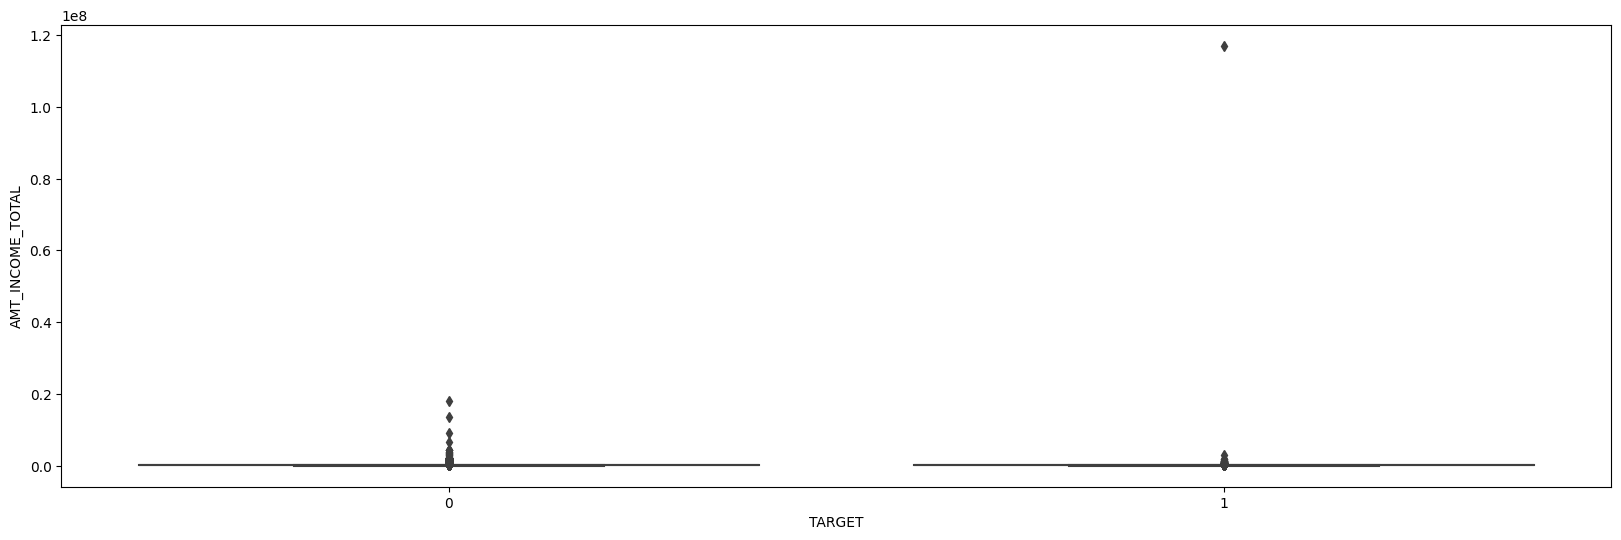

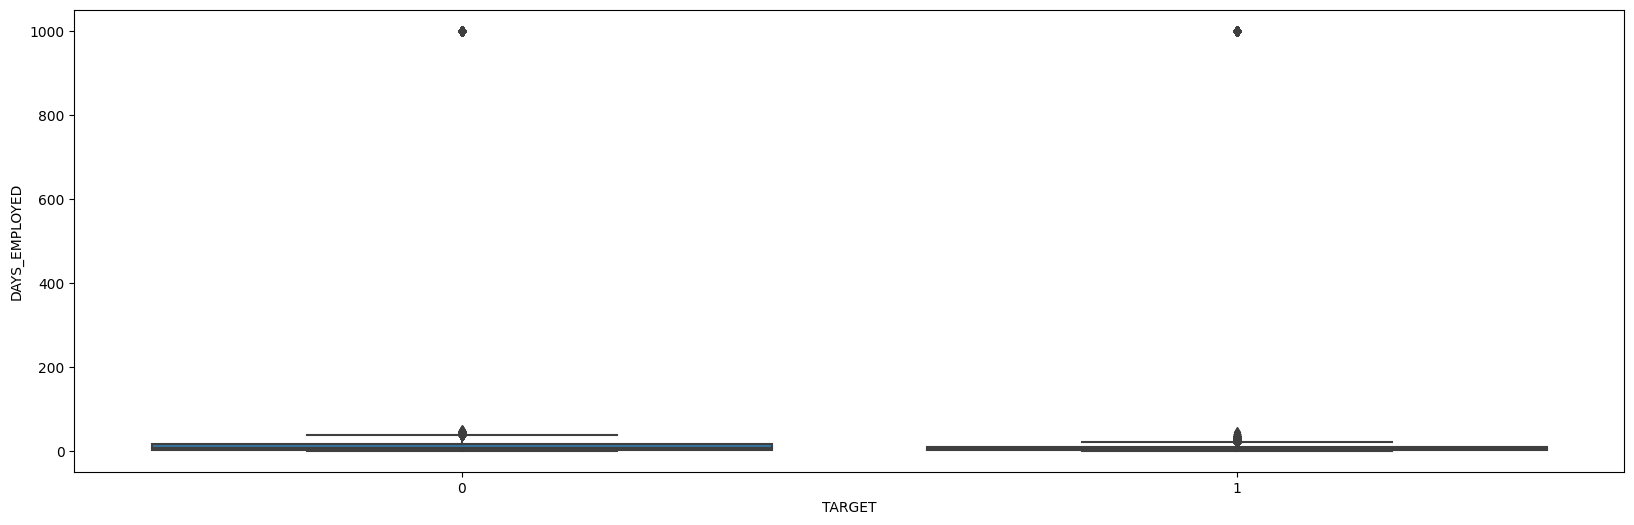

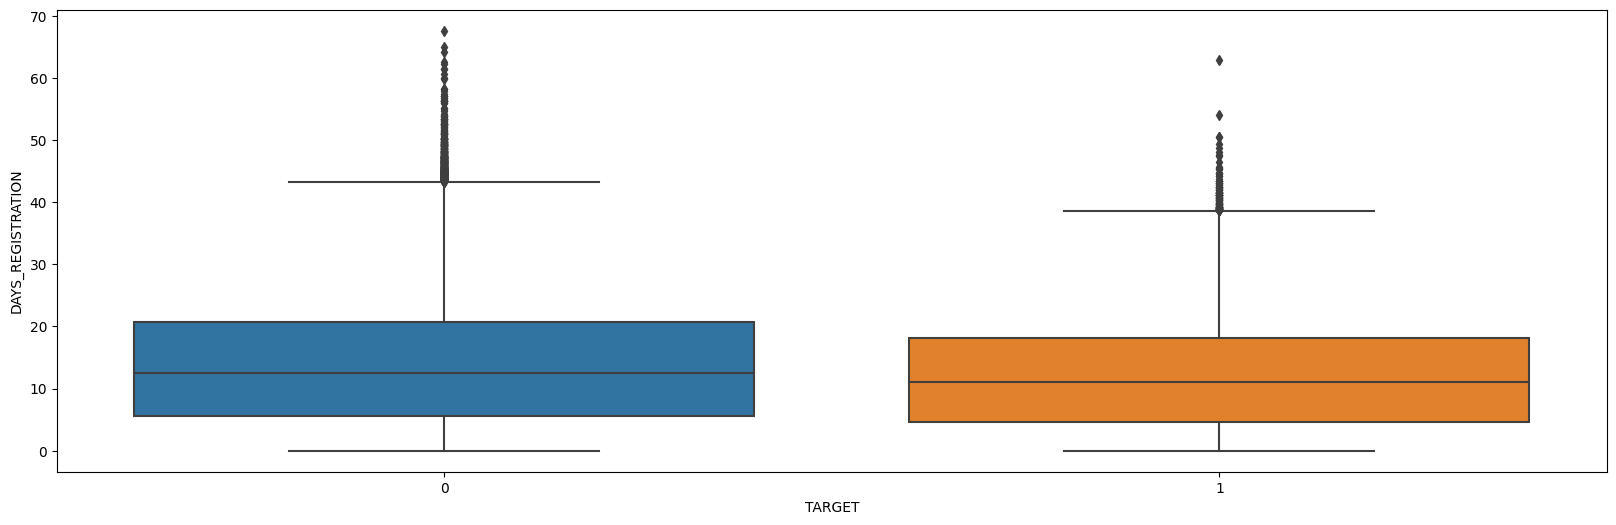

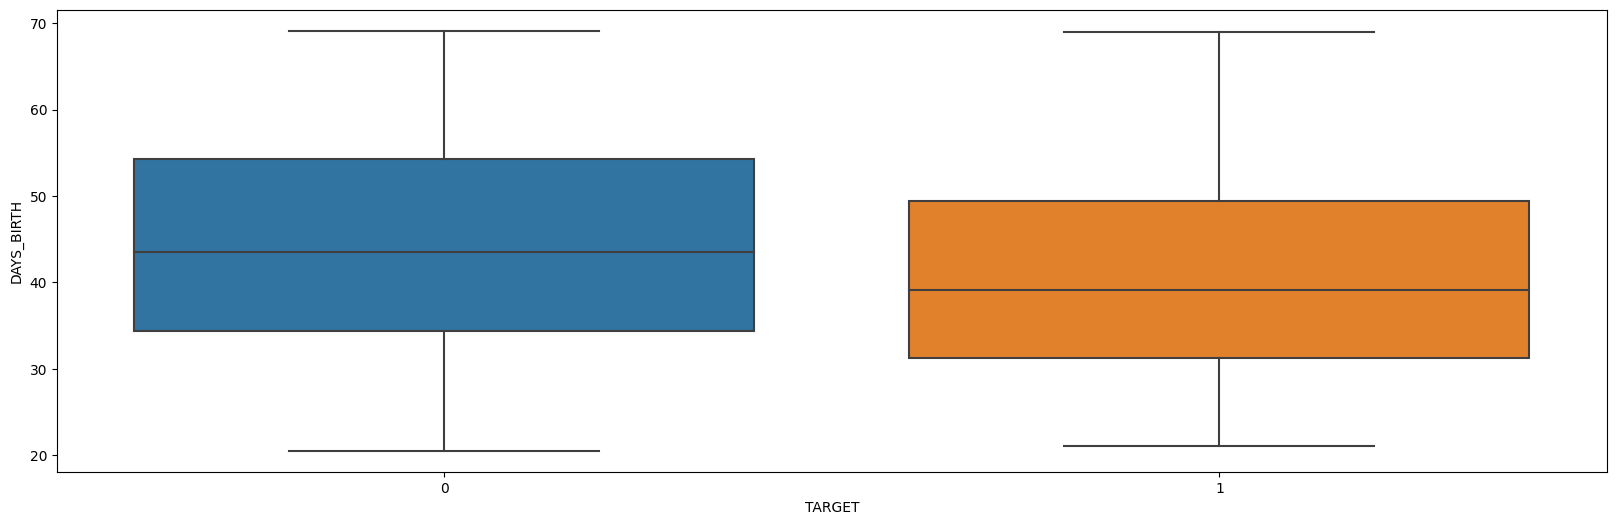

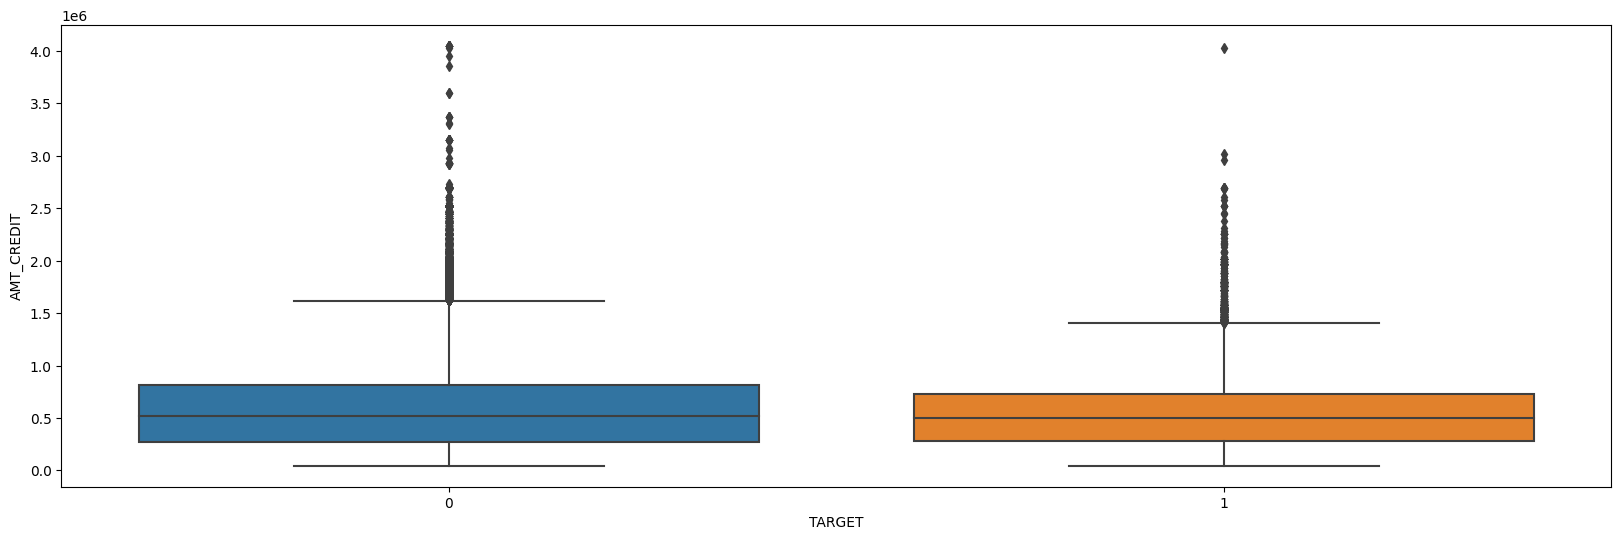

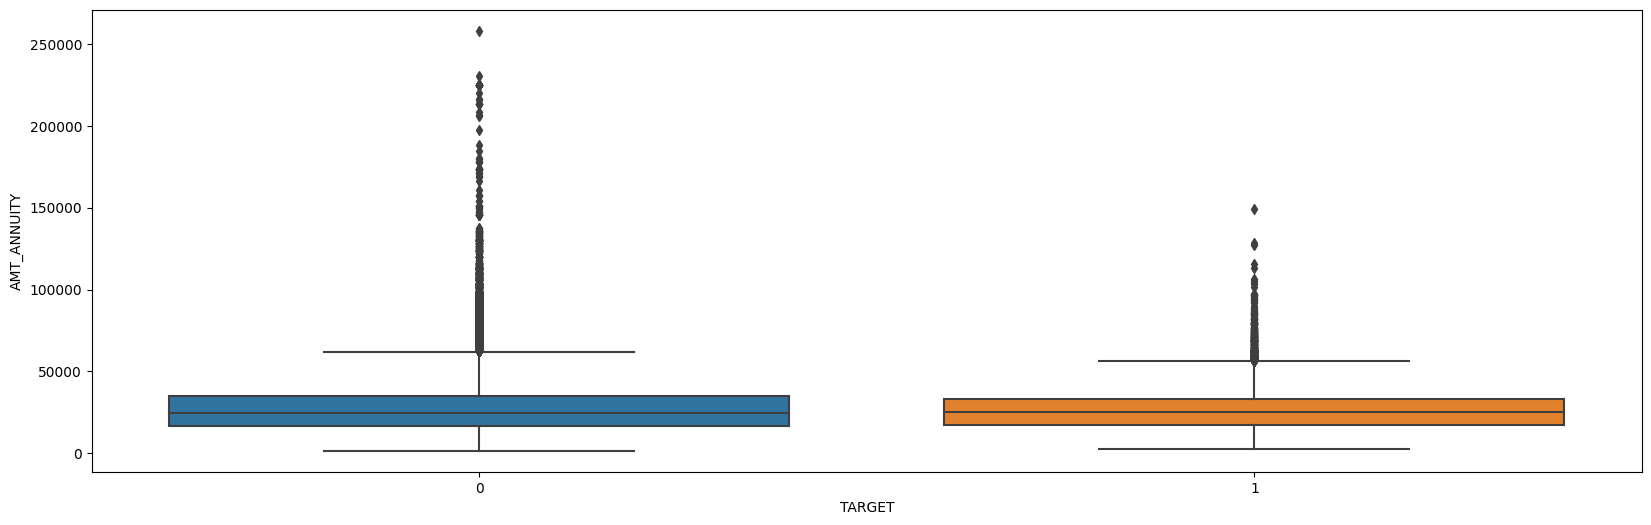

In [ ]:
# loop for bivariate analysis for numerical variables
for i in numerical_columns:
    sns.boxplot(data = df_2, x='TARGET',y= i)
    plt.show()

#### Key interpretation from bivariate analysis of categorical variables
##### In this section, we will only highlight key outcomes from Bivariate analysis
- **DAYS_LAST_PHONE_CHANGE**:Defaulter customers change phone closer to the submission of application
- **DAYSID_PUBLISH**:Defaulter customers changes id closer to submission of application
- **DAYS_REGISTRATION**: Defaulter customers changes registration on a date closer to submission of application
- **DAYS_BIRTH**: Defaulter customers are relatively younger than non-defaulters